Data analysis for the pilot participants in PLEARN

# Load Libraries and Resources

In [461]:
library('readr')
library('blabr')
library('plyr')
library('dplyr')
library('ggplot2')
library('rjson')
library('parallel')
library("readxl")
source('PLEARN_analysis_helper.R')

In [462]:
item_properties = read.csv('../PLEARN_experiments/csv/plearn_receptiveTask_datasource.csv')
item_properties$AudioTarget = sapply(item_properties$AudioTarget, trimws)
length(unique(item_properties$AudioTarget))
item_properties$AudioTarget[duplicated(item_properties$AudioTarget)] #64 test items + 4 practice

[1] 68

[1] "65.wav" "71.wav" "66.wav" "72.wav"

In [463]:
# audio timings for the version with the background ("bg_")
bg_audio_timings = getAudioTimingsFromGlob("../PLEARN_experiments/stimuli/raw_audio2/*.cut")
bg_audio_timings_with_metadata = merge(item_properties, bg_audio_timings, by.x='AudioTarget', 
    by.y='audiotarget')
bg_audio_timings_with_metadata$plural_duration = (bg_audio_timings_with_metadata$target_noun_end_time -
    bg_audio_timings_with_metadata$begin_disambig_region) * 1000 
print(nrow(bg_audio_timings_with_metadata))

[1] 72


In [464]:
print(bg_audio_timings_with_metadata[1,])

  AudioTarget s_form novel_id background_context vowel_carrier
1      10.wav    tep 2005-600              house  in the house
               full_carrier    s_carrier s_punct s_wav_index
1 Look at the  in the house Look at the        !           2
                               s_sentence pl_form   pl_carrier pl_punct
1 2. tep... Look at the tep in the house!    teps Look at the         !
  pl_wav_index                                pl_sentence novelty   voicing
1           10 10. teps... Look at the teps in the house!   novel voiceless
      simple_pl_stim     simple_s_stim animacyStatus Trial target Practice
1 Look at the  teps! Look at the  tep!     inanimate    30     pl        n
  test_index TargetSide trial_index NovelColor order expt_index TargetLoc
1         32          r          32        red     2         34 (960,512)
  DistractorLoc           TargetImage          DistractorImage start_time
1     (320,512) 2_tep_plural_left.png 2_tep_singular_right.png      8.548
  stop_tim

In [465]:
# audio timings for the red/blue version ("rb_")
rb_audio_timings = getAudioTimingsFromGlob("../PLEARN_experiments/stimuli/raw_audio_simplified/*.cut")
rb_audio_timings_with_metadata = merge(item_properties, rb_audio_timings, by.x='AudioTarget', 
    by.y='audiotarget')
# we don't have duration information until Chompsky is up again 
rb_audio_timings_with_metadata$plural_duration = (rb_audio_timings_with_metadata$target_noun_end_time -
    rb_audio_timings_with_metadata$begin_disambig_region) * 1000 
print(nrow(rb_audio_timings_with_metadata))

[1] 72


In [466]:
subject_info = read.csv('subject_info.csv', stringsAsFactors=F) #No PII
subject_info$participant_name = sapply(strsplit(subject_info$filename,'_' ), function(x){x[1]})
subject_info$age_in_months = subject_info$age_in_days / 30.5
subject_info

id        include filename                  age_in_days gender type 
1  plsm      1       smflip3_fixreport.txt       NA        M      adult
2  pl00      1       pl00_fixations.txt         769        F      child
3  pl01      1       pl01_fixations.txt         788        F      child
4  pl03      1       pl03_fixations.txt         810        F      child
5  pl04      1                                  858        F      child
6  pl05      1                                  862        F      child
7  pl06      1       pl06_fixations.txt          NA               adult
8  pl07      1       pl07_fixations.txt          NA               adult
9  pl08      1       pl08_fixations.txt          NA               adult
10 pl09      1       pl09_fixations.txt         796        F      child
11 pl10      1       pl10_fixations.txt         897        M      child
12 adultpl12 1       adultpl12_fixations.txt     NA               adult
13 adultpl13 1       adultpl13_fixations.txt     NA               adult
14 adultpl14 1       adultpl14_fixations.txt     NA               adult
15 adultpl15 1       adultpl15_fixations.txt     NA               adult
16 adultpl16 1       adultpl16_fixations.txt     NA               adult
17 pl11      1       pl11_fixations.txt         792        M      child
18 pl13      1       pl13_fixations.xlsx       1450        M      child
19 pl14      1       pl14_fixations.xlsx       1057        M      child
20 pl15      1       pl15_fixations.xlsx        876        F      child
21 pl16      1       pl16_fixations.xlsx       1049        M      child
22 pl17      1       pl17_fixations.xlsx        926        F      child
23 pl18      1       pl18_fixations.xlsx       1034        F      child
24 pl19      1       pl19_fixations.xlsx        947        M      child
25 pl20      1       pl20_fixations.xlsx       1008        F      child
26 pl21      0       pl21_fixations.xlsx       1100        F      child
27 pl22      1       pl22_fixations.xlsx       1408        M      child
28 pl23      1       pl23_fixations.xlsx        850        M      child
29 pl24      1       pl24_fixations.xlsx       1091        M      child
30 pl25      1       pl25_fixations.xlsx       1091        M      child
⋮  ⋮         ⋮       ⋮                         ⋮           ⋮      ⋮    
45 pl43      1       pl43_fixations.xlsx       1008               child
46 pl44      1       pl44_fixations.xlsx         17               child
47 pl45      1       pl45_fixations.xlsx        933               child
48 plad01    1       plearn_adults_plad01.xlsx   NA               adult
49 plad02    1       plearn_adults_plad02.xlsx   NA               adult
50 plad03    1       plearn_adults_plad03.xlsx   NA               adult
51 plad04    1       plearn_adults_plad04.xlsx   NA               adult
52 plad05    1       plearn_adults_plad05.xlsx   NA               adult
53 plad06    1       plearn_adults_plad06.xlsx   NA               adult
54 plad07    1       plearn_adults_plad07.xlsx   NA               adult
55 plad08    1       plearn_adults_plad08.xlsx   NA               adult
56 plad09    1       plearn_adults_plad09.xlsx   NA               adult
57 plad10    1       plearn_adults_plad10.xlsx   NA               adult
58 plad11    1       plearn_adults_plad11.xlsx   NA               adult
59 plad12    1       plearn_adults_plad12.xlsx   NA               adult
60 plad13    1       plearn_adults_plad13.xlsx   NA               adult
61 plad14    1       plearn_adults_plad14.xlsx   NA               adult
62 plad15    1       plearn_adults_plad15.xlsx   NA               adult
63 pl46      1       pl46_fixations.xlsx       1093               child
64 pl47      1       pl47_fixations.xlsx       1093               child
65 pl48      1       pl48_fixations.xlsx       1019               child
66 pl49      1       pl49_fixations.xlsx        792               child
67 pl50      1       pl50_fixations.xlsx        988               child
68 pl51      1       pl51_fixations.xlsx   

# Audio Stimuli Properties

## Plural  Segment Duration (Background version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


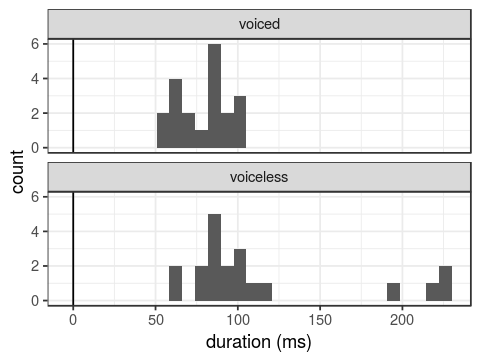

In [467]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(subset(bg_audio_timings_with_metadata, plural_duration != 0)) + geom_histogram(aes(x=plural_duration)
) + facet_wrap(~voicing, ncol=1) + theme_bw() + geom_vline(xintercept=0) +xlab('duration (ms)')

## Prepositional Phrase Duration (Background version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


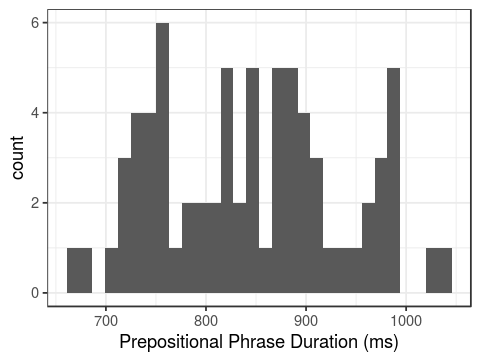

In [468]:
mean_pp_duration= mean(bg_audio_timings$pp_duration, na.rm=T) * 1000
options(repr.plot.width=4, repr.plot.height=3)
ggplot(bg_audio_timings) + geom_histogram(aes(x=pp_duration * 1000)) + theme_bw() + xlab('Prepositional Phrase Duration (ms)')

In [469]:
### Intro Phrase Durations (Background Version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


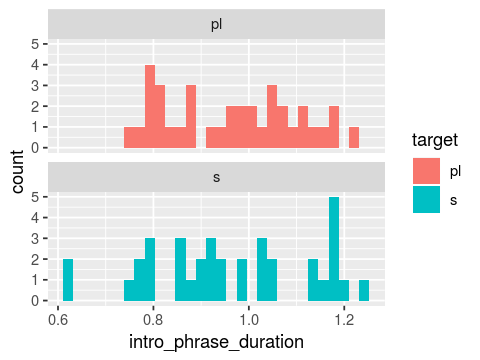

In [470]:
bg_audio_timings_with_metadata$intro_phrase_duration = bg_audio_timings_with_metadata$begin_disambig_region- bg_audio_timings_with_metadata$start_time
ggplot(bg_audio_timings_with_metadata) + geom_histogram(
    aes(x=intro_phrase_duration, fill=target)) + facet_wrap(~target, ncol=1)

In [471]:
subset(bg_audio_timings_with_metadata, intro_phrase_duration < .7)

AudioTarget s_form novel_id background_context vowel_carrier
65 6.wav       dup    2028-600 hill                on the hill 
70 7.wav       fip    2030-600 couch               on the couch
   full_carrier              s_carrier    s_punct s_wav_index
65 Look at the  on the hill  Look at the  !       6          
70 Look at the  on the couch Look at the  !       7          
   s_sentence                              ⋯ start_time stop_time
65 6. dup... Look at the dup on the hill!  ⋯ 30.937     32.578   
70 7. fip... Look at the fip on the couch! ⋯ 36.590     38.367   
   target_noun_start_time begin_disambig_region target_noun_end_time filename
65 31.565                 31.565                31.791               6.wav   
70 37.204                 37.204                37.400               7.wav   
   disambig_time pp_duration plural_duration intro_phrase_duration
65 2628          0.787       226             0.628                
70 2614          0.967       196             0.614

In [472]:
wilcox.test(subset(bg_audio_timings_with_metadata, target == 's')$intro_phrase_duration,
                 subset(bg_audio_timings_with_metadata, target == 'pl')$intro_phrase_duration)

Warning message in wilcox.test.default(subset(bg_audio_timings_with_metadata, target == :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  subset(bg_audio_timings_with_metadata, target == "s")$intro_phrase_duration and subset(bg_audio_timings_with_metadata, target == "pl")$intro_phrase_duration
W = 655.5, p-value = 0.9372
alternative hypothesis: true location shift is not equal to 0


## Plural  Segment Duration (Simplified version)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


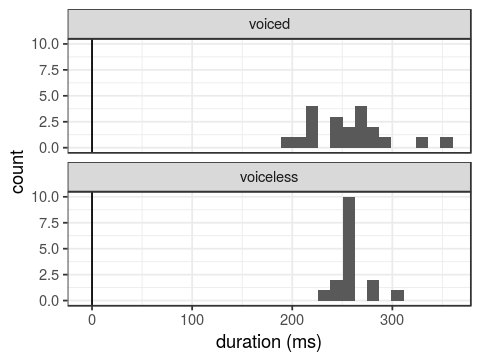

In [473]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(subset(rb_audio_timings_with_metadata, plural_duration > 0)) + geom_histogram(aes(x=plural_duration)
) + facet_wrap(~voicing, ncol=1) + theme_bw() + geom_vline(xintercept=0) +xlab('duration (ms)')

### Intro Phrase Durations (Simplified Version)

In [477]:
rb_audio_timings_with_metadata$intro_phrase_duration = rb_audio_timings_with_metadata$begin_disambig_region- rb_audio_timings_with_metadata$start_time

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


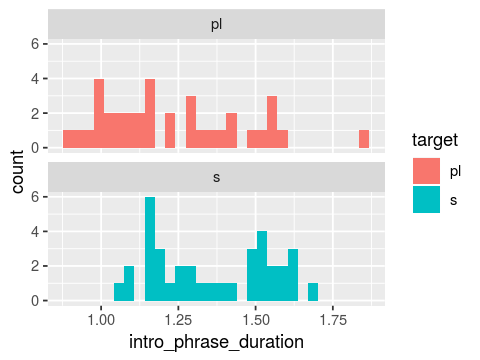

In [478]:
ggplot(rb_audio_timings_with_metadata) + geom_histogram(
    aes(x=intro_phrase_duration, fill=target)) + facet_wrap(~target, ncol=1)

In [480]:
wilcox.test(subset(rb_audio_timings_with_metadata, target == 's')$intro_phrase_duration,
                 subset(rb_audio_timings_with_metadata, target == 'pl')$intro_phrase_duration)

Warning message in wilcox.test.default(subset(rb_audio_timings_with_metadata, target == :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  subset(rb_audio_timings_with_metadata, target == "s")$intro_phrase_duration and subset(rb_audio_timings_with_metadata, target == "pl")$intro_phrase_duration
W = 890.5, p-value = 0.006419
alternative hypothesis: true location shift is not equal to 0


# Preprocess Eyetracking Data

In [583]:
# plz parallelize me
source('PLEARN_analysis_helper.R')
ed = list()
for (i in 1:nrow(subject_info)){
#pl07_ind = which(subject_info$participant_name =="pl07")    
#for (i in pl07_ind){ # easy test subject
    participant = subject_info[i,]
    print(participant)
    if (participant$filename == '' | is.null(participant$filename) |
        is.na(participant$filename) | participant$include == 0){
        print(paste0('No eyetracking data for ', participant$id,' (or excluded), skipping...'))
    } else {
        if (participant$expt_version == 'scene'){
            audio_timings = bg_audio_timings
        } else if (participant$expt_version == 'redblue') {
            audio_timings = rb_audio_timings
        } else {
            stop('expt_version not recognized')
        }        
        ed[[participant$id]] = analyzeEyetrackingParticipant(
            'results/', 
            participant$filename, 
            audio_timings, 
            participant$type)
    }
}

  participant_name        id include                filename age_in_days gender
1        adultpl12 adultpl12       1 adultpl12_fixations.txt          NA       
   type expt_version comment age_in_months narrow_score broad_score
1 adult        scene                    NA           NA          NA
[1] "processing results/adultpl12_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14246, not 14245”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name        id include                filename age_in_days gender
2        adultpl13 adultpl13       1 adultpl13_fixations.txt          NA       
   type expt_version comment age_in_months narrow_score broad_score
2 adult        scene                    NA           NA          NA
[1] "processing results/adultpl13_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15302, not 15301”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name        id include                filename age_in_days gender
3        adultpl14 adultpl14       1 adultpl14_fixations.txt          NA       
   type expt_version comment age_in_months narrow_score broad_score
3 adult        scene                    NA           NA          NA
[1] "processing results/adultpl14_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14431, not 14430”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name        id include                filename age_in_days gender
4        adultpl15 adultpl15       1 adultpl15_fixations.txt          NA       
   type expt_version comment age_in_months narrow_score broad_score
4 adult        scene                    NA           NA          NA
[1] "processing results/adultpl15_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15050, not 15049”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name        id include                filename age_in_days gender
5        adultpl16 adultpl16       1 adultpl16_fixations.txt          NA       
   type expt_version comment age_in_months narrow_score broad_score
5 adult        scene                    NA           NA          NA
[1] "processing results/adultpl16_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14415, not 14414”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name   id include           filename age_in_days gender  type
6             pl00 pl00       1 pl00_fixations.txt         769      F child
  expt_version comment age_in_months narrow_score broad_score
6        scene              25.21311           NA          NA
[1] "processing results/pl00_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15018, not 15017”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name   id include           filename age_in_days gender  type
7             pl01 pl01       1 pl01_fixations.txt         788      F child
  expt_version comment age_in_months narrow_score broad_score
7        scene              25.83607            1   0.1666667
[1] "processing results/pl01_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14335, not 14334”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name   id include           filename age_in_days gender  type
8             pl03 pl03       1 pl03_fixations.txt         810      F child
  expt_version comment age_in_months narrow_score broad_score
8        scene              26.55738            1         0.1
[1] "processing results/pl03_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double()
)
See spec(...) for full column specifications.


[1] "Missing trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 6064, not 6063”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
  participant_name   id include filename age_in_days gender type expt_version
9             pl04 <NA>      NA     <NA>          NA   <NA> <NA>         <NA>
  comment age_in_months narrow_score broad_score
9    <NA>            NA   0.08333333  0.06666667
[1] "No eyetracking data for NA (or excluded), skipping..."
   participant_name   id include filename age_in_days gender type expt_version
10             pl05 <NA>      NA     <NA>          NA   <NA> <NA>         <NA>
   comment age_in_months narrow_score broad_score
10    <NA>            NA          NaN           0
[1] "No eyetracking data for NA (or excluded), skipping..."
   participant_name   id include           filename age_in_days gender  type
11             pl06 pl06       1 pl06_fixations.txt          NA        adult
   expt_version          comment age_in_months narrow_score broad_score
11        scene eyetracking only     

Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13842, not 13841”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include           filename age_in_days gender  type
12             pl07 pl07       1 pl07_fixations.txt          NA        adult
   expt_version          comment age_in_months narrow_score broad_score
12        scene eyetracking only            NA           NA          NA
[1] "processing results/pl07_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15062, not 15061”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include           filename age_in_days gender  type
13             pl08 pl08       1 pl08_fixations.txt          NA        adult
   expt_version          comment age_in_months narrow_score broad_score
13        scene eyetracking only            NA           NA          NA
[1] "processing results/pl08_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15062, not 15061”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include           filename age_in_days gender  type
14             pl09 pl09       1 pl09_fixations.txt         796      F child
   expt_version comment age_in_months narrow_score broad_score
14        scene              26.09836          NaN           0
[1] "processing results/pl09_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15543, not 15542”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include           filename age_in_days gender  type
15             pl10 pl10       1 pl10_fixations.txt         897      M child
   expt_version comment age_in_months narrow_score broad_score
15        scene              29.40984    0.1333333   0.1333333
[1] "processing results/pl10_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 7542, not 7541”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include           filename age_in_days gender  type
16             pl11 pl11       1 pl11_fixations.txt         792      M child
   expt_version comment age_in_months narrow_score broad_score
16        scene              25.96721           NA          NA
[1] "processing results/pl11_fixations.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Missing trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10897, not 10896”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
17             pl13 pl13       1 pl13_fixations.xlsx        1450      M child
   expt_version comment age_in_months narrow_score broad_score
17        scene              47.54098    0.9333333       0.875
[1] "processing results/pl13_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 608
[1] "will write to:"
[1] "results/pl13_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10705, not 10704”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
18             pl14 pl14       1 pl14_fixations.xlsx        1057      M child
   expt_version comment age_in_months narrow_score broad_score
18        scene              34.65574            1         0.5
[1] "processing results/pl14_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 520
[1] "will write to:"
[1] "results/pl14_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 12993, not 12992”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
19             pl15 pl15       1 pl15_fixations.xlsx         876      F child
   expt_version comment age_in_months narrow_score broad_score
19        scene              28.72131            1   0.1538462
[1] "processing results/pl15_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 725
[1] "will write to:"
[1] "results/pl15_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 11974, not 11973”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
20             pl16 pl16       1 pl16_fixations.xlsx        1049      M child
   expt_version comment age_in_months narrow_score broad_score
20        scene              34.39344           NA          NA
[1] "processing results/pl16_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 681
[1] "will write to:"
[1] "results/pl16_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14993, not 14992”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include filename age_in_days gender type expt_version
21            pl16  <NA>      NA     <NA>          NA   <NA> <NA>         <NA>
   comment age_in_months narrow_score broad_score
21    <NA>            NA          0.9   0.6428571
[1] "No eyetracking data for NA (or excluded), skipping..."
   participant_name   id include            filename age_in_days gender  type
22             pl17 pl17       1 pl17_fixations.xlsx         926      F child
   expt_version comment age_in_months narrow_score broad_score
22        scene              30.36066            1         0.5
[1] "processing results/pl17_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 599
[1] "will write to:"
[1] "results/pl17_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10580, not 10579”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
23             pl18 pl18       1 pl18_fixations.xlsx        1034      F child
   expt_version comment age_in_months narrow_score broad_score
23        scene              33.90164          NaN           0
[1] "processing results/pl18_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 748
[1] "will write to:"
[1] "results/pl18_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14385, not 14384”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
24             pl19 pl19       1 pl19_fixations.xlsx         947      M child
   expt_version comment age_in_months narrow_score broad_score
24        scene              31.04918            1   0.5384615
[1] "processing results/pl19_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 546
[1] "will write to:"
[1] "results/pl19_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13635, not 13634”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
25             pl20 pl20       1 pl20_fixations.xlsx        1008      F child
   expt_version comment age_in_months narrow_score broad_score
25        scene              33.04918            1   0.6666667
[1] "processing results/pl20_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 735
[1] "will write to:"
[1] "results/pl20_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14247, not 14246”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
26             pl21 pl21       0 pl21_fixations.xlsx        1100      F child
   expt_version                 comment age_in_months narrow_score broad_score
26      redblue out of order reschedule      36.06557           NA          NA
[1] "No eyetracking data for pl21 (or excluded), skipping..."
   participant_name   id include            filename age_in_days gender  type
27             pl22 pl22       1 pl22_fixations.xlsx        1408      M child
   expt_version comment age_in_months narrow_score broad_score
27        scene              46.16393            1      0.9375
[1] "processing results/pl22_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 805
[1] "will write to:"
[1] "results/pl22_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14177, not 14176”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
28             pl23 pl23       1 pl23_fixations.xlsx         850      M child
   expt_version comment age_in_months narrow_score broad_score
28        scene              27.86885            1   0.4666667
[1] "processing results/pl23_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 591
[1] "will write to:"
[1] "results/pl23_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 8662, not 8661”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
29             pl24 pl24       1 pl24_fixations.xlsx        1091      M child
   expt_version comment age_in_months narrow_score broad_score
29        scene              35.77049            1  0.06666667
[1] "processing results/pl24_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 703
[1] "will write to:"
[1] "results/pl24_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 12881, not 12880”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
30             pl25 pl25       1 pl25_fixations.xlsx        1091      M child
   expt_version comment age_in_months narrow_score broad_score
30        scene              35.77049          NaN           0
[1] "processing results/pl25_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 545
[1] "will write to:"
[1] "results/pl25_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 9177, not 9176”

[1] "Lost trials in binning procedure"
[1] "Lost trials in augmentation"
   participant_name   id include            filename age_in_days gender  type
31             pl26 pl26       0 pl26_fixations.xlsx          NA        child
   expt_version      comment age_in_months narrow_score broad_score
31        scene rescheduling            NA           NA          NA
[1] "No eyetracking data for pl26 (or excluded), skipping..."
   participant_name   id include            filename age_in_days gender  type
32             pl27 pl27       1 pl27_fixations.xlsx        1107      F child
   expt_version comment age_in_months narrow_score broad_score
32        scene              36.29508            1       0.875
[1] "processing results/pl27_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 617
[1] "will write to:"
[1] "results/pl27_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14804, not 14803”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
33             pl28 pl28       1 pl28_fixations.xlsx         951      F child
   expt_version comment age_in_months narrow_score broad_score
33        scene              31.18033            1   0.1333333
[1] "processing results/pl28_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 604
[1] "will write to:"
[1] "results/pl28_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13372, not 13371”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
34             pl29 pl29       1 pl29_fixations.xlsx         931      F child
   expt_version comment age_in_months narrow_score broad_score
34        scene              30.52459            1        0.25
[1] "processing results/pl29_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 700
[1] "will write to:"
[1] "results/pl29_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13464, not 13463”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
35             pl30 pl30       1 pl30_fixations.xlsx         931        child
   expt_version       comment age_in_months narrow_score broad_score
35      redblue first redblue      30.52459            0           0
[1] "processing results/pl30_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 664
[1] "will write to:"
[1] "results/pl30_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Missing trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10928, not 10927”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
36             pl31 pl31       1 pl31_fixations.xlsx         740        child
   expt_version comment age_in_months narrow_score broad_score
36      redblue               24.2623          NaN           0
[1] "processing results/pl31_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 489
[1] "will write to:"
[1] "results/pl31_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13774, not 13773”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
37             pl33 pl33       1 pl33_fixations.xlsx         725        child
   expt_version comment age_in_months narrow_score broad_score
37      redblue              23.77049          NaN         NaN
[1] "processing results/pl33_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 665
[1] "will write to:"
[1] "results/pl33_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14084, not 14083”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include filename age_in_days gender type expt_version
38             pl35 <NA>      NA     <NA>          NA   <NA> <NA>         <NA>
   comment age_in_months narrow_score broad_score
38    <NA>            NA          NaN           0
[1] "No eyetracking data for NA (or excluded), skipping..."
   participant_name   id include            filename age_in_days gender  type
39             pl36 pl36       1 pl36_fixations.xlsx        1079        child
   expt_version comment age_in_months narrow_score broad_score
39      redblue              35.37705            1           1
[1] "processing results/pl36_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 722
[1] "will write to:"
[1] "results/pl36_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14722, not 14721”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
40             pl37 pl37       1 pl37_fixations.xlsx        1086        child
   expt_version comment age_in_months narrow_score broad_score
40      redblue              35.60656            1   0.4285714
[1] "processing results/pl37_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 758
[1] "will write to:"
[1] "results/pl37_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13708, not 13707”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
41             pl38 pl38       1 pl38_fixations.xlsx         747        child
   expt_version comment age_in_months narrow_score broad_score
41      redblue               24.4918           NA          NA
[1] "processing results/pl38_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 697
[1] "will write to:"
[1] "results/pl38_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 12399, not 12398”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
42             pl39 pl39       1 pl39_fixations.xlsx         740        child
   expt_version comment age_in_months narrow_score broad_score
42      redblue               24.2623          NaN           0
[1] "processing results/pl39_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 681
[1] "will write to:"
[1] "results/pl39_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14672, not 14671”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
43             pl40 pl40       0 pl40_fixations.xlsx         725        child
   expt_version                        comment age_in_months narrow_score
43      redblue something wrong with this file      23.77049          NaN
   broad_score
43           0
[1] "No eyetracking data for pl40 (or excluded), skipping..."
   participant_name   id include            filename age_in_days gender  type
44             pl41 pl41       1 pl41_fixations.xlsx         866        child
   expt_version comment age_in_months narrow_score broad_score
44      redblue              28.39344          NaN           0
[1] "processing results/pl41_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 552
[1] "will write to:"
[1] "results/pl41_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 12417, not 12416”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
45             pl42 pl42       1 pl42_fixations.xlsx        1026        child
   expt_version comment age_in_months narrow_score broad_score
45      redblue              33.63934            1   0.3333333
[1] "processing results/pl42_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 504
[1] "will write to:"
[1] "results/pl42_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Missing trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10746, not 10745”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
46             pl43 pl43       1 pl43_fixations.xlsx        1008        child
   expt_version comment age_in_months narrow_score broad_score
46      redblue              33.04918            1   0.5333333
[1] "processing results/pl43_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 618
[1] "will write to:"
[1] "results/pl43_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10437, not 10436”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
47             pl44 pl44       1 pl44_fixations.xlsx          17        child
   expt_version comment age_in_months narrow_score broad_score
47      redblue              0.557377            1  0.07692308
[1] "processing results/pl44_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 562
[1] "will write to:"
[1] "results/pl44_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 12321, not 12320”

[1] "Lost trials in binning procedure"
[1] "Lost trials in augmentation"
   participant_name   id include            filename age_in_days gender  type
48             pl45 pl45       1 pl45_fixations.xlsx         933        child
   expt_version comment age_in_months narrow_score broad_score
48      redblue              30.59016           NA          NA
[1] "processing results/pl45_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 679
[1] "will write to:"
[1] "results/pl45_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10753, not 10752”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
49             pl46 pl46       1 pl46_fixations.xlsx        1093        child
   expt_version comment age_in_months narrow_score broad_score
49      redblue              35.83607          NaN           0
[1] "processing results/pl46_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 597
[1] "will write to:"
[1] "results/pl46_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10630, not 10629”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
50             pl47 pl47       1 pl47_fixations.xlsx        1093        child
   expt_version comment age_in_months narrow_score broad_score
50      redblue              35.83607            1      0.6875
[1] "processing results/pl47_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 721
[1] "will write to:"
[1] "results/pl47_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14473, not 14472”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
51             pl48 pl48       1 pl48_fixations.xlsx        1019        child
   expt_version comment age_in_months narrow_score broad_score
51      redblue              33.40984          NaN           0
[1] "processing results/pl48_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 619
[1] "will write to:"
[1] "results/pl48_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13111, not 13110”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
52             pl49 pl49       1 pl49_fixations.xlsx         792        child
   expt_version comment age_in_months narrow_score broad_score
52      redblue              25.96721          NaN           0
[1] "processing results/pl49_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 514
[1] "will write to:"
[1] "results/pl49_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Missing trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 8288, not 8287”

[1] "Lost trials in binning procedure"
[1] "Lost trials in augmentation"
   participant_name   id include            filename age_in_days gender  type
53             pl50 pl50       1 pl50_fixations.xlsx         988        child
   expt_version comment age_in_months narrow_score broad_score
53      redblue              32.39344            0           0
[1] "processing results/pl50_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 569
[1] "will write to:"
[1] "results/pl50_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 9605, not 9604”

[1] "Lost trials in binning procedure"
[1] "Lost trials in augmentation"
   participant_name   id include            filename age_in_days gender  type
54             pl51 pl51       1 pl51_fixations.xlsx         917        child
   expt_version comment age_in_months narrow_score broad_score
54      redblue              30.06557            1   0.1428571
[1] "processing results/pl51_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 718
[1] "will write to:"
[1] "results/pl51_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 12666, not 12665”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
55             pl52 pl52       1 pl52_fixations.xlsx         774        child
   expt_version comment age_in_months narrow_score broad_score
55      redblue              25.37705          NaN           0
[1] "processing results/pl52_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 579
[1] "will write to:"
[1] "results/pl52_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 9955, not 9954”

[1] "Lost trials in binning procedure"
[1] "Lost trials in augmentation"
   participant_name   id include            filename age_in_days gender  type
56             pl53 pl53       0 pl53_fixations.xlsx         836        child
   expt_version                             comment age_in_months narrow_score
56      redblue failed to pass calib and validation      27.40984           NA
   broad_score
56          NA
[1] "No eyetracking data for pl53 (or excluded), skipping..."
   participant_name   id include            filename age_in_days gender  type
57             pl54 pl54       1 pl54_fixations.xlsx         976        child
   expt_version comment age_in_months narrow_score broad_score
57      redblue                    32            0           0
[1] "processing results/pl54_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 593
[1] "will write to:"
[1] "results/pl54_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Missing trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 5428, not 5427”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
58             pl55 pl55       1 pl55_fixations.xlsx         932        child
   expt_version comment age_in_months narrow_score broad_score
58      redblue              30.55738           NA          NA
[1] "processing results/pl55_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 671
[1] "will write to:"
[1] "results/pl55_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13761, not 13760”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include            filename age_in_days gender  type
59             pl57 pl57       1 pl57_fixations.xlsx         973        child
   expt_version comment age_in_months narrow_score broad_score
59      redblue              31.90164           NA          NA
[1] "processing results/pl57_fixations.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 515
[1] "will write to:"
[1] "results/pl57_fixations.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 10903, not 10902”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
60           plearn plad02       1 plearn_adults_plad02.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
60 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad02.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 591
[1] "will write to:"
[1] "results/plearn_adults_plad02.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14061, not 14060”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
61           plearn plad08       1 plearn_adults_plad08.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
61 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad08.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 302
[1] "will write to:"
[1] "results/plearn_adults_plad08.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15094, not 15093”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
62           plearn plad01       1 plearn_adults_plad01.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
62 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad01.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 451
[1] "will write to:"
[1] "results/plearn_adults_plad01.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15651, not 15650”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
63           plearn plad05       1 plearn_adults_plad05.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
63 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad05.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 837
[1] "will write to:"
[1] "results/plearn_adults_plad05.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14959, not 14958”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
64           plearn plad03       1 plearn_adults_plad03.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
64 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad03.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 647
[1] "will write to:"
[1] "results/plearn_adults_plad03.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14232, not 14231”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
65           plearn plad09       1 plearn_adults_plad09.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
65 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad09.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 588
[1] "will write to:"
[1] "results/plearn_adults_plad09.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15186, not 15185”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
66           plearn plad11       1 plearn_adults_plad11.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
66 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad11.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 468
[1] "will write to:"
[1] "results/plearn_adults_plad11.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15187, not 15186”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
67           plearn plad06       1 plearn_adults_plad06.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
67 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad06.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 388
[1] "will write to:"
[1] "results/plearn_adults_plad06.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 15043, not 15042”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
68           plearn plad15       1 plearn_adults_plad15.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
68 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad15.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 624
[1] "will write to:"
[1] "results/plearn_adults_plad15.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14619, not 14618”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
69           plearn plad07       1 plearn_adults_plad07.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
69 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad07.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 729
[1] "will write to:"
[1] "results/plearn_adults_plad07.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14566, not 14565”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
70           plearn plad04       1 plearn_adults_plad04.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
70 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad04.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 723
[1] "will write to:"
[1] "results/plearn_adults_plad04.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 12717, not 12716”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
71           plearn plad13       1 plearn_adults_plad13.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
71 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad13.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 617
[1] "will write to:"
[1] "results/plearn_adults_plad13.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14725, not 14724”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
72           plearn plad10       1 plearn_adults_plad10.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
72 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad10.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 595
[1] "will write to:"
[1] "results/plearn_adults_plad10.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13732, not 13731”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
73           plearn plad14       1 plearn_adults_plad14.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
73 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad14.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 743
[1] "will write to:"
[1] "results/plearn_adults_plad14.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13923, not 13922”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name     id include                  filename age_in_days gender
74           plearn plad12       1 plearn_adults_plad12.xlsx          NA       
    type expt_version comment age_in_months narrow_score broad_score
74 adult      redblue                    NA           NA          NA
[1] "processing results/plearn_adults_plad12.xlsx..."
[1] "Dimensions of excel file read in:"
[1] 567
[1] "will write to:"
[1] "results/plearn_adults_plad12.txt"


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 14599, not 14598”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include              filename age_in_days gender  type
75          smflip3 plsm       1 smflip3_fixreport.txt          NA      M adult
   expt_version          comment age_in_months narrow_score broad_score
75        scene eyetracking only            NA           NA          NA
[1] "processing results/smflip3_fixreport.txt..."


Parsed with column specification:
cols(
  .default = col_character(),
  TRIAL_INDEX = col_double(),
  CURRENT_FIX_ADJUSTED = col_logical(),
  CURRENT_FIX_DURATION = col_double(),
  CURRENT_FIX_END = col_double(),
  CURRENT_FIX_INDEX = col_double(),
  CURRENT_FIX_IS_RT_END = col_logical(),
  CURRENT_FIX_MSG_COUNT = col_double(),
  CURRENT_FIX_PUPIL = col_double(),
  CURRENT_FIX_START = col_double(),
  CURRENT_FIX_X = col_double(),
  CURRENT_FIX_X_RESOLUTION = col_double(),
  CURRENT_FIX_Y = col_double(),
  CURRENT_FIX_Y_RESOLUTION = col_double(),
  IP_END_EVENT_MATCHED = col_logical(),
  IP_END_TIME = col_double(),
  IP_START_EVENT_MATCHED = col_logical(),
  IP_START_TIME = col_double(),
  TRIAL_FIXATION_TOTAL = col_double(),
  TRIAL_START_TIME = col_double(),
  RT = col_double()
  # ... with 8 more columns
)
See spec(...) for full column specifications.


[1] "Correct number of trials in the original data"
[1] "Correct number of trials in merging with audio timings"


Warning message:
“Length of logical index must be 1 or 13104, not 13103”

[1] "Correct number of trials after binning procedure"
[1] "Correct number of trials after augmentation"
   participant_name   id include filename age_in_days gender  type expt_version
76             <NA> pl05       1                  862      F child        scene
                                  comment age_in_months narrow_score
76 storybook only; need VNA id to get dob       28.2623           NA
   broad_score
76          NA
[1] "No eyetracking data for pl05 (or excluded), skipping..."
   participant_name   id include filename age_in_days gender  type expt_version
77             <NA> pl58       0                  909        child    agreement
   comment age_in_months narrow_score broad_score
77              29.80328           NA          NA
[1] "No eyetracking data for pl58 (or excluded), skipping..."
   participant_name   id include filename age_in_days gender  type expt_version
78             <NA> pl04       1                  858      F child        scene
                       

In [584]:
length(ed)

[1] 67

# Preprocess / Plot Production Data

We preprocess the production data at this point because we want to be able to use production scores as a grouping variable in the eyetracking analysis

In [839]:
p_coded = read.csv('productions_coded.csv', stringsAsFactors=F)
# itemId is not to be trusted
p_coded$itemId = as.numeric(as.factor(as.character(p_coded$Lemma)))
print(names(p_coded))
print(nrow(p_coded))

[1] "child"         "itemId"        "Lemma"         "Singular.IPA" 
[5] "Singular.Code" "Plural.IPA"    "Plural.Code"   "Comments"     
[1] 880


In [840]:
print(length(unique(p_coded$itemId))) #16 test x 2 + 4 shared practice

[1] 36


In [841]:
codebook = c(
    'No data (0)',
    'No verbal response (1)',
    'Not identifiable/babble (2)',
    'Other word (not noun) (3)',
    'Noun from context (4)',
    'Singular form (5)',
    'Non-conventional plural form (6)',
    'Plural form, approximate articulation (7)',
    'Plural form, adult-like articulation (8)' 
)

codes = data.frame(code = seq(0,8), description = codebook)
codes$description = factor(codes$description, levels = codebook)

In [842]:
# get the item properties into here
pt_ds = read.csv('../PLEARN_experiments/plearn_productiveTask_datasource.csv')
p_coded = merge(p_coded, pt_ds, by.x='Lemma', by.y='s_form')
nrow(p_coded) # the decrease is because the remainder are practice

[1] 704

In [843]:
s_codes = aggregate(itemId ~ Singular.Code + child, p_coded, length)
names(s_codes) = c('code', 'child', 'count')
s_codes = merge(s_codes, codes)
s_codes$s_pl ='singular'
head(s_codes)

code child count description            s_pl    
1 0    pl01   1    No data (0)            singular
2 0    pl18   4    No data (0)            singular
3 0    pl24   1    No data (0)            singular
4 0    pl20   5    No data (0)            singular
5 1    pl33  14    No verbal response (1) singular
6 1    pl01   3    No verbal response (1) singular

In [844]:
p_codes = aggregate(itemId ~ Plural.Code + child, p_coded, length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$s_pl = 'plural'
head(p_codes)

code child count description s_pl  
1 0    pl37  1     No data (0) plural
2 0    pl19  1     No data (0) plural
3 0    pl01  2     No data (0) plural
4 0    pl36  1     No data (0) plural
5 0    pl20  4     No data (0) plural
6 0    pl18  3     No data (0) plural

In [845]:
code_counts = rbind.fill(s_codes, p_codes)
code_counts$s_pl = factor(code_counts$s_pl, levels =c('singular','plural'))
head(code_counts)

code child count description            s_pl    
1 0    pl01   1    No data (0)            singular
2 0    pl18   4    No data (0)            singular
3 0    pl24   1    No data (0)            singular
4 0    pl20   5    No data (0)            singular
5 1    pl33  14    No verbal response (1) singular
6 1    pl01   3    No verbal response (1) singular

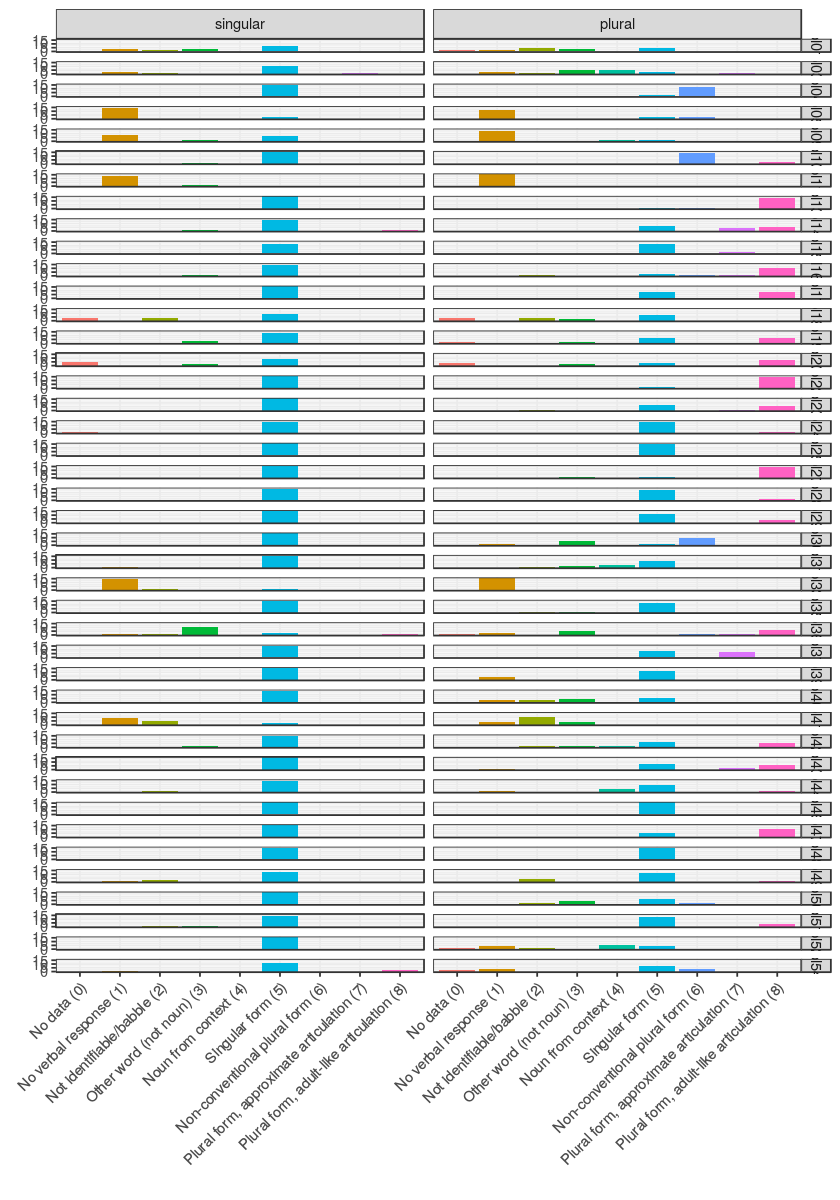

In [846]:
options(repr.plot.width=7, repr.plot.height=10)
ggplot(code_counts) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab('') + facet_grid(child~s_pl)

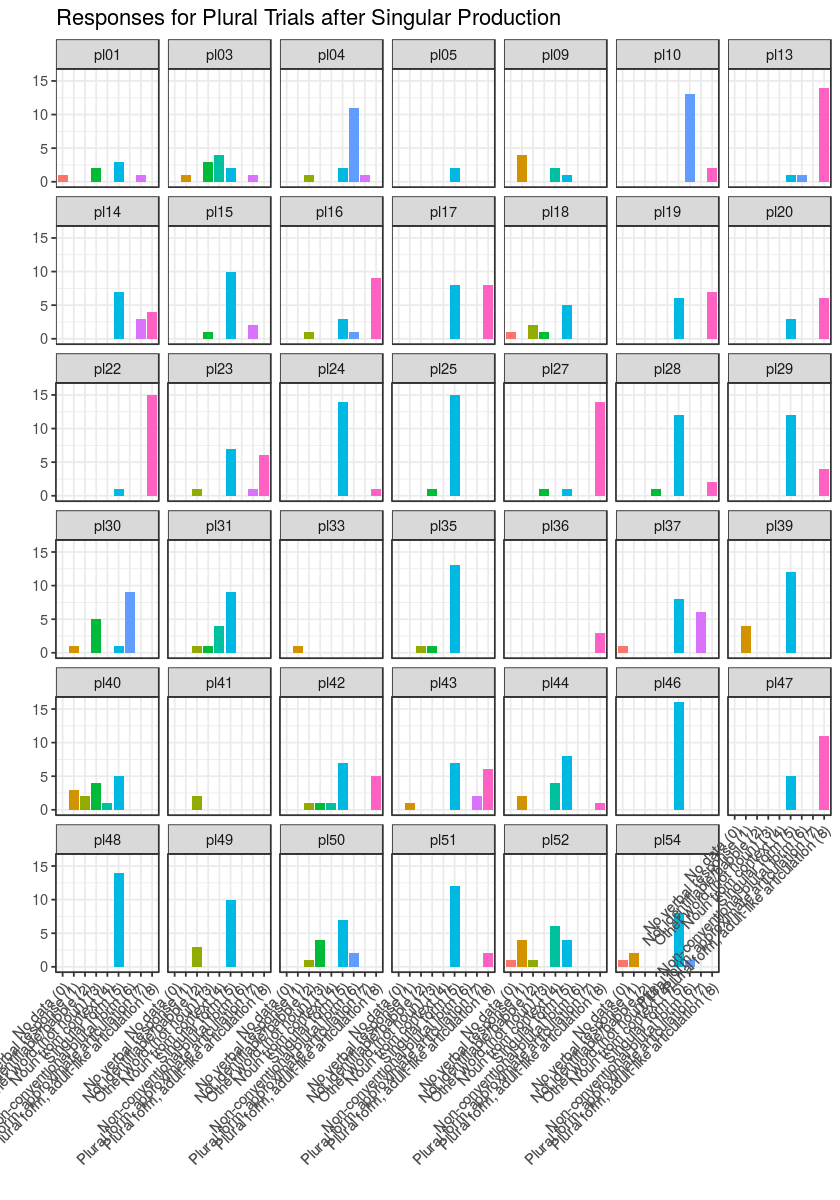

In [847]:
# coded trials after  singular productions, #5
p_codes = aggregate(itemId ~ Plural.Code + child, subset(p_coded, Singular.Code == 5), length)
names(p_codes) = c('code', 'child','count')
p_codes = merge(p_codes, codes)
p_codes$type = 'plural'
ggplot(p_codes) + geom_bar(aes(x=description, y=count, fill=description), stat='identity'
) + theme_bw() +theme(legend.position="none") + theme(axis.text.x = element_text(angle = 45, 
hjust = 1)) + xlab('') + ylab(''
) + ggtitle('Responses for Plural Trials after Singular Production') + facet_wrap(~child)

# Compute Production Scores

In [848]:
# note that both of these are subset to singular succeses
computeProductionScores = function(codes, method = 'narrow'){
    
    if (method == 'narrow'){
        # if they marked the plural in some way,was it adult-like?
        sum(codes %in% c(7,8)) / sum(codes %in% seq(6,8))
    } else if (method == 'broad') {
        # did they mark the plural?
        sum(codes %in% c(7,8)) / sum(codes %in% seq(2,8))
    }
}


In [849]:
narrow_production_scores = aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), computeProductionScores)
names(narrow_production_scores) = c('participant_name', 'narrow_score')
broad_production_scores = aggregate(Plural.Code ~ child, subset(p_coded, Singular.Code == 5), function(x){computeProductionScores(x,'broad')})
names(broad_production_scores) = c('participant_name','broad_score')

In [850]:
if (!("broad_score" %in% names(subject_info))){
    subject_info = merge(merge(subject_info, narrow_production_scores, by='participant_name', all=T),
    broad_production_scores, all=T, by='participant_name')
}

In [851]:
nrow(subset(subject_info, type == 'child'))

[1] 50

In [852]:
subset(subject_info, !is.na(narrow_score))

participant_name id   include filename            age_in_days gender type 
7  pl01             pl01  1      pl01_fixations.txt   788        F      child
8  pl03             pl03  1      pl03_fixations.txt   810        F      child
9  pl04             NA   NA      NA                    NA        NA     NA   
15 pl10             pl10  1      pl10_fixations.txt   897        M      child
17 pl13             pl13  1      pl13_fixations.xlsx 1450        M      child
18 pl14             pl14  1      pl14_fixations.xlsx 1057        M      child
19 pl15             pl15  1      pl15_fixations.xlsx  876        F      child
21 pl16             NA   NA      NA                    NA        NA     NA   
22 pl17             pl17  1      pl17_fixations.xlsx  926        F      child
24 pl19             pl19  1      pl19_fixations.xlsx  947        M      child
25 pl20             pl20  1      pl20_fixations.xlsx 1008        F      child
27 pl22             pl22  1      pl22_fixations.xlsx 1408        M      child
28 pl23             pl23  1      pl23_fixations.xlsx  850        M      child
29 pl24             pl24  1      pl24_fixations.xlsx 1091        M      child
32 pl27             pl27  1      pl27_fixations.xlsx 1107        F      child
33 pl28             pl28  1      pl28_fixations.xlsx  951        F      child
34 pl29             pl29  1      pl29_fixations.xlsx  931        F      child
35 pl30             pl30  1      pl30_fixations.xlsx  931               child
39 pl36             pl36  1      pl36_fixations.xlsx 1079               child
40 pl37             pl37  1      pl37_fixations.xlsx 1086               child
45 pl42             pl42  1      pl42_fixations.xlsx 1026               child
46 pl43             pl43  1      pl43_fixations.xlsx 1008               child
47 pl44             pl44  1      pl44_fixations.xlsx   17               child
50 pl47             pl47  1      pl47_fixations.xlsx 1093               child
53 pl50             pl50  1      pl50_fixations.xlsx  988               child
54 pl51             pl51  1      pl51_fixations.xlsx  917               child
57 pl54             pl54  1      pl54_fixations.xlsx  976               child
   expt_version comment       age_in_months narrow_score broad_score
7  scene                      25.836066     1.00000000   0.16666667 
8  scene                      26.557377     1.00000000   0.10000000 
9  NA           NA                   NA     0.08333333   0.06666667 
15 scene                      29.409836     0.13333333   0.13333333 
17 scene                      47.540984     0.93333333   0.87500000 
18 scene                      34.655738     1.00000000   0.50000000 
19 scene                      28.721311     1.00000000   0.15384615 
21 NA           NA                   NA     0.90000000   0.64285714 
22 scene                      30.360656     1.00000000   0.50000000 
24 scene                      31.049180     1.00000000   0.53846154 
25 scene                      33.049180     1.00000000   0.66666667 
27 scene                      46.163934     1.00000000   0.93750000 
28 scene                      27.868852     1.00000000   0.46666667 
29 scene                      35.770492     1.00000000   0.06666667 
32 scene                      36.295082     1.00000000   0.87500000 
33 scene                      31.180328     1.00000000   0.13333333 
34 scene                      30.524590     1.00000000   0.25000000 
35 redblue      first redblue 30.524590     0.00000000   0.00000000 
39 redblue                    35.377049     1.00000000   1.00000000 
40 redblue                    35.606557     1.00000000   0.42857143 
45 redblue                    33.639344     1.00000000   0.33333333 
46 redblue                    33.049180     1.00000000   0.53333333 
47 redblue                     0.557377     1.00000000   0.07692308 
50 redblue                    35.836066     1.00000000   0.68750000 
53 redblue                    32.393443     0.00000000   0.00000000 
54 redblue               

# Associate Participant Information With All Records

In [853]:
ed_df = do.call('rbind', ed)
#augment ed_df with the properties from subject info
ed_df = merge(ed_df, subject_info, by='filename')
nrow(ed_df)

[1] 863886

In [854]:
names(ed_df)

[1] "filename"                        "expt_index"                     
 [3] "timeBin"                         "FixationID"                     
 [5] "CURRENT_FIX_START"               "CURRENT_FIX_END"                
 [7] "TRIAL_INDEX"                     "CURRENT_FIX_INDEX"              
 [9] "RECORDING_SESSION_LABEL"         "CURRENT_FIX_INTEREST_AREA_LABEL"
[11] "RT"                              "target"                         
[13] "s_form"                          "novelty"                        
[15] "animacystatus"                   "voicing"                        
[17] "practice"                        "Time"                           
[19] "Nonset"                          "participant_type"               
[21] "participant_name.x"              "looks_to_t"                     
[23] "looks_to_d"                      "looks_to_td"                    
[25] "exclude_trial"                   "exclude_subject"                
[27] "label_at_onset"                  "time_to_last_nonna"             
[29] "track_loss_at_0"                 "participant_name.y"             
[31] "id"                              "include"                        
[33] "age_in_days"                     "gender"                         
[35] "type"                            "expt_version"                   
[37] "comment"                         "age_in_months"                  
[39] "narrow_score"                    "broad_score"

In [855]:
num_trials_per_subj = aggregate(TRIAL_INDEX ~ participant_name.x + exclude_trial, ed_df, function(x){length(unique(x))})

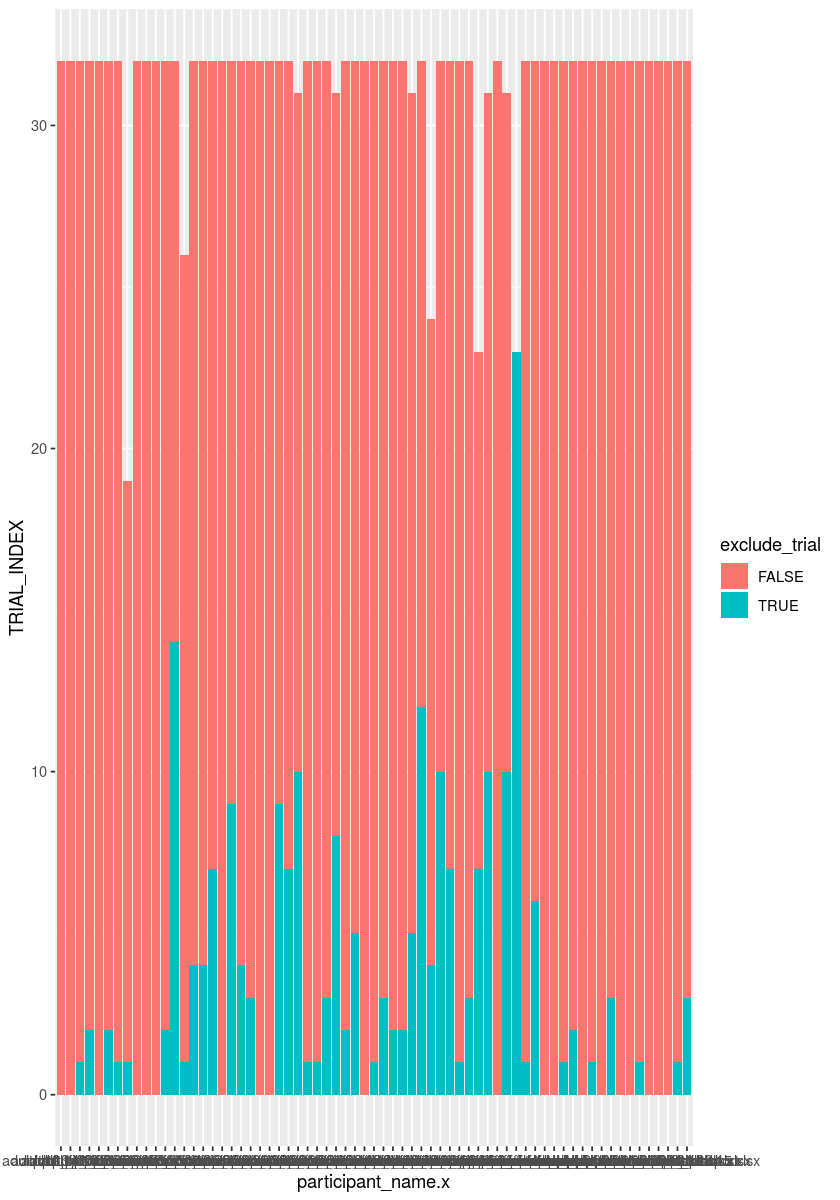

In [856]:
ggplot(num_trials_per_subj) + geom_bar(aes(x=participant_name.x, fill=exclude_trial, 
                                           y=TRIAL_INDEX), stat='identity', position="stack")

In [857]:
# whole participants who are excluded
unique(subset(ed_df, exclude_subject)$participant_name.x)

[1] "pl54_fixations.xlsx"

In [858]:
# add the trial order as a grouping variable
ed_df$first3 = 'remainder'
ed_df$first3[ed_df$TRIAL_INDEX <= 7] = 'first 3 test trials'

# Aggregate Eyetracking Timecourses

## Background / PP Version

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='adult'&expt_version=='scene'_target_.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='adult'&expt_version=='scene'_novelty_~target.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

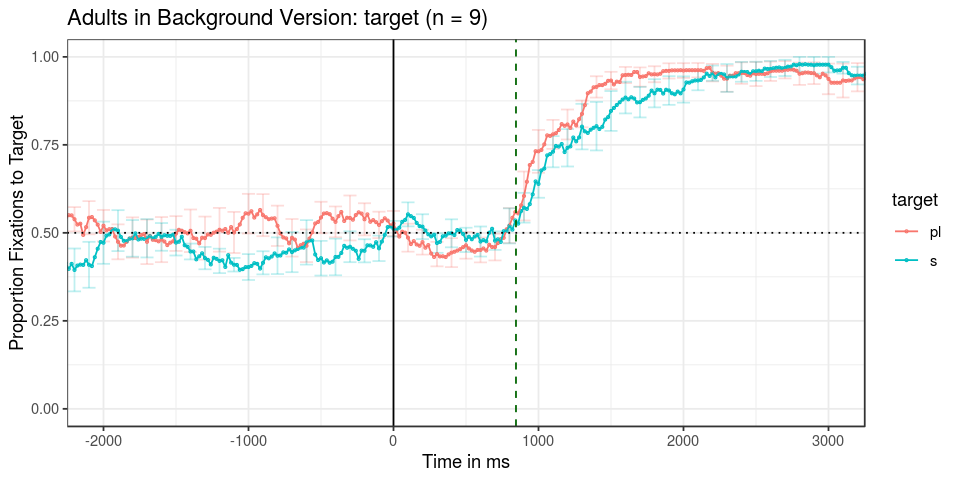

[1] "figures/type=='adult'&expt_version=='scene'_voicing_~target.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

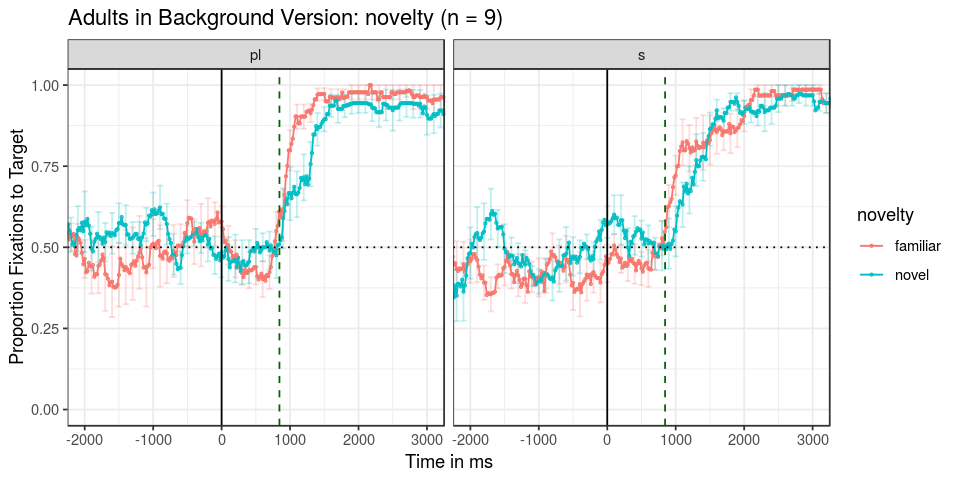

[1] "figures/type=='adult'&expt_version=='scene'_animacystatus_~target.pdf"


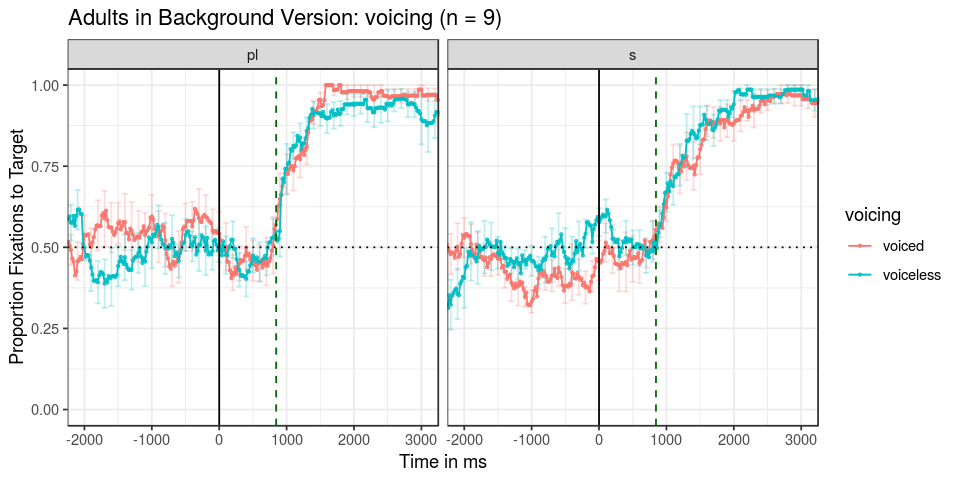

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"
[1] "figures/type=='adult'&expt_version=='scene'_nullgroup_~label_at_onset.pdf"


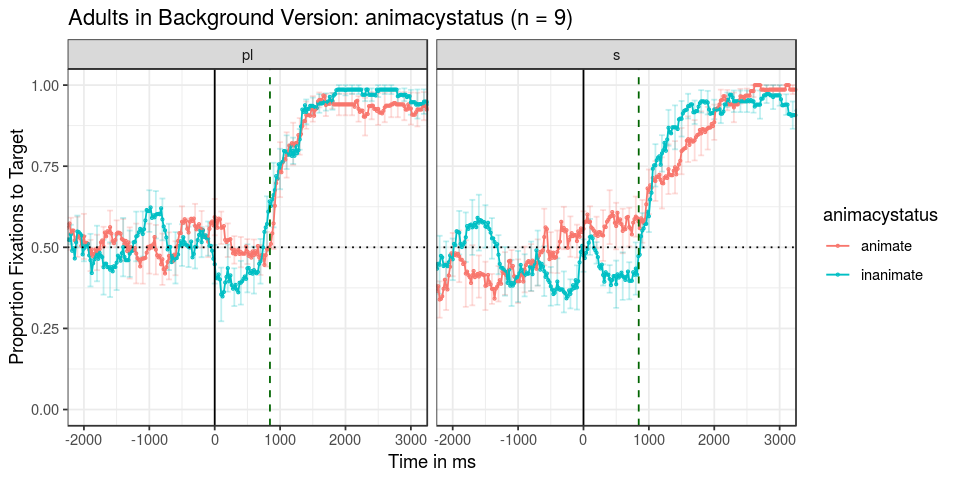

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"
[1] "figures/type=='adult'&expt_version=='scene'_nullgroup_~first3.pdf"


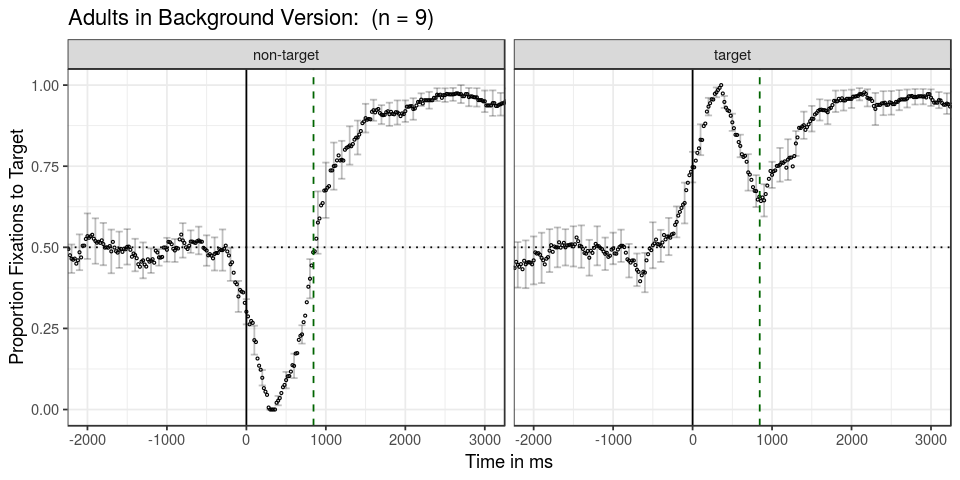

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "figures/type=='adult'&expt_version=='scene'_nullgroup_target~first3.pdf"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

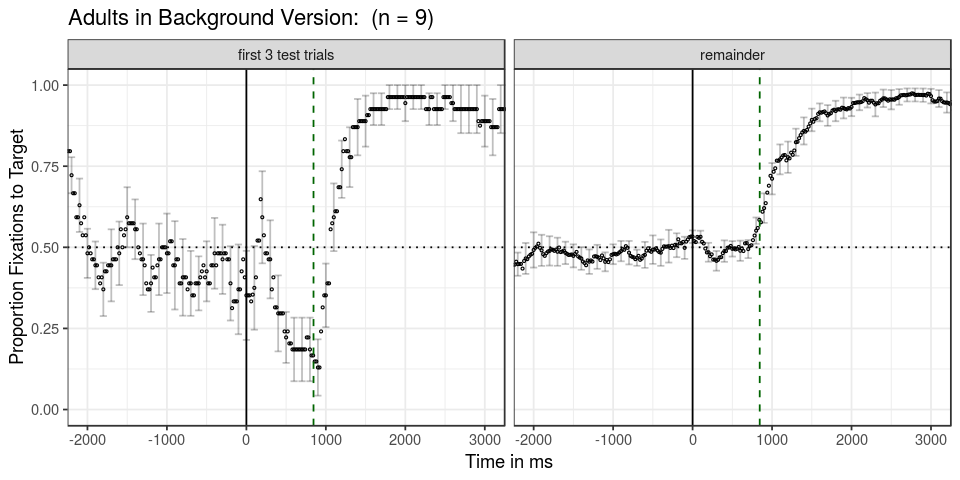

[1] "figures/type=='adult'&expt_version=='scene'_target_~novelty.pdf"


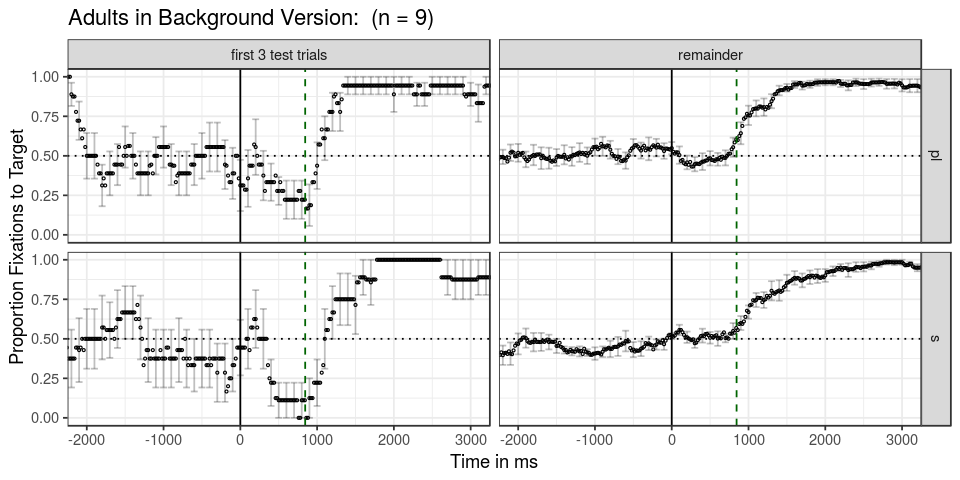

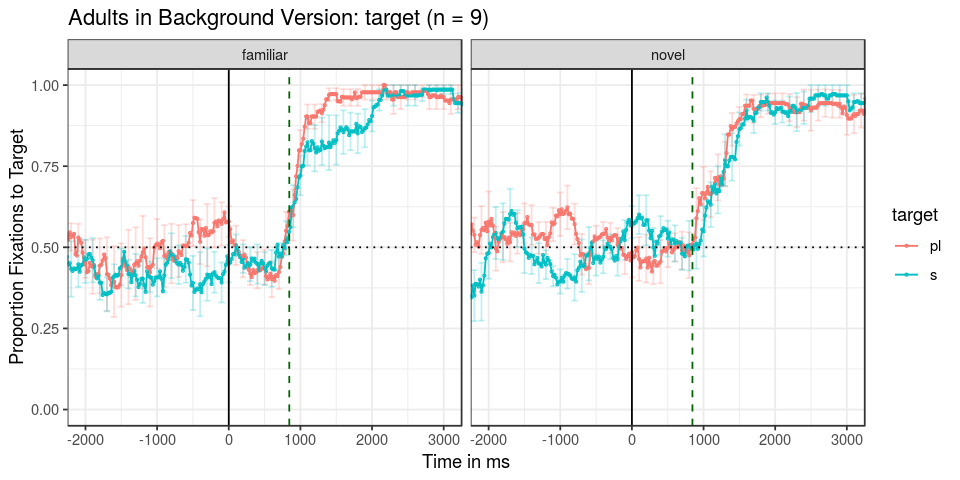

In [630]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'adult' & expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Adults in Background Version',
    save_plot=T)

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_target_.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_novelty_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

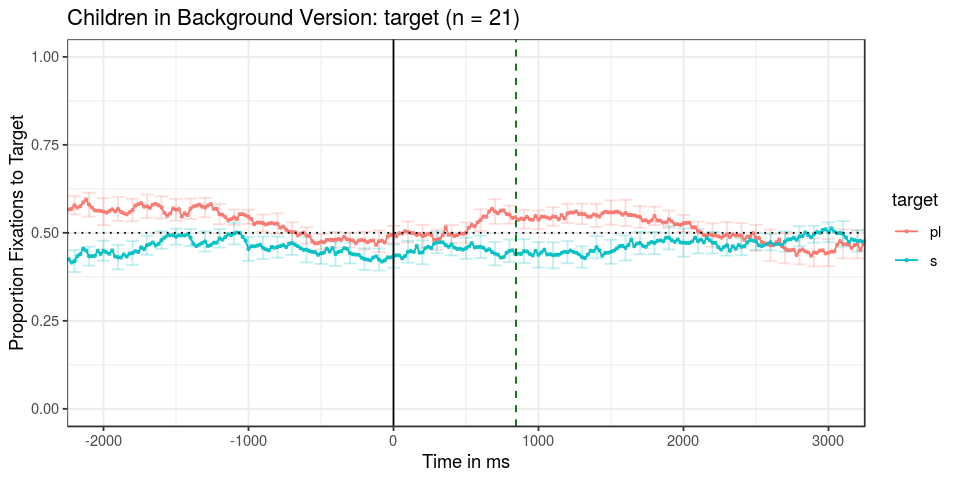

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_voicing_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

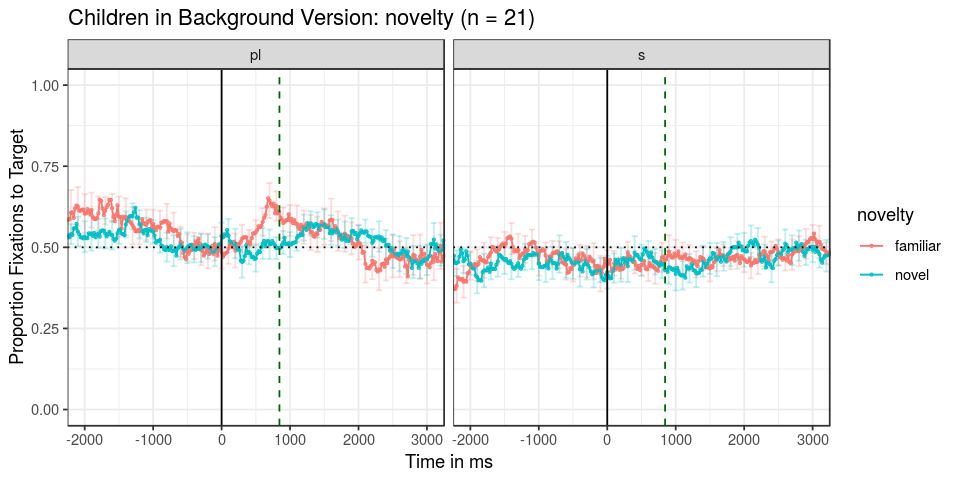

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_animacystatus_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

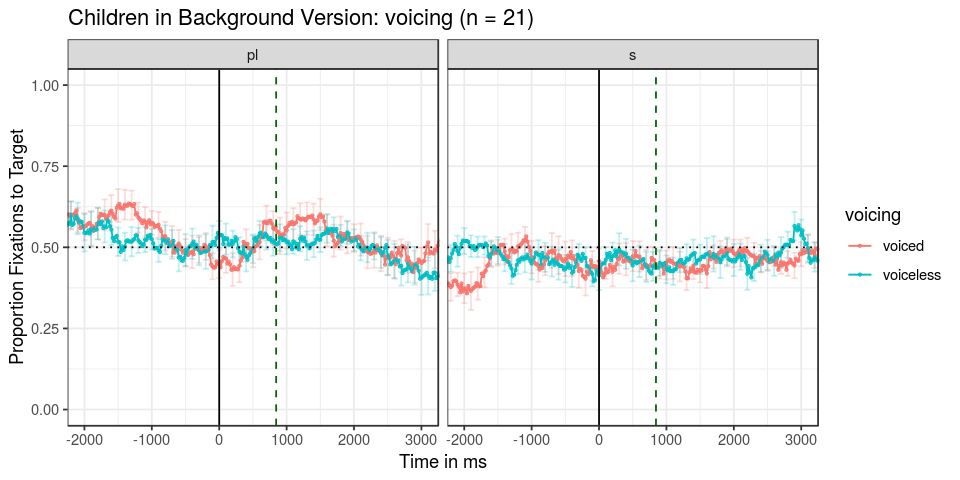

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_nullgroup_~label_at_onset.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

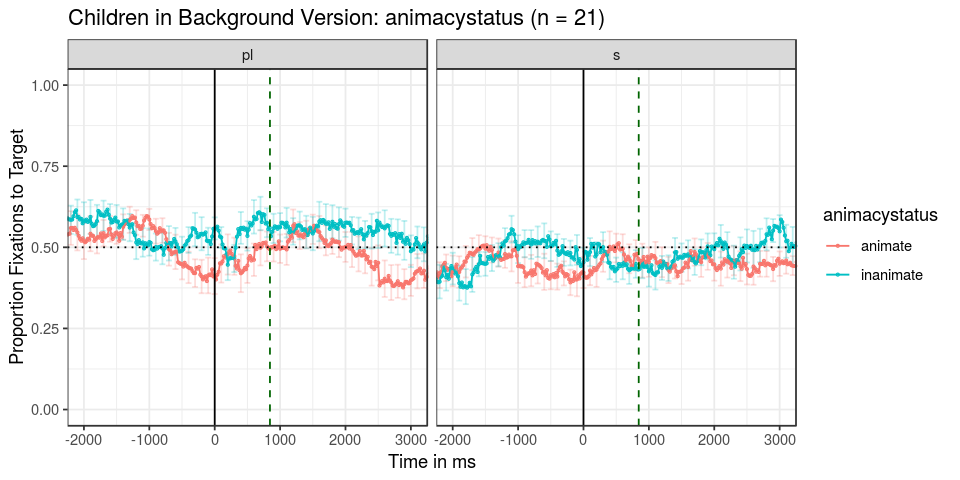

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_nullgroup_~first3.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

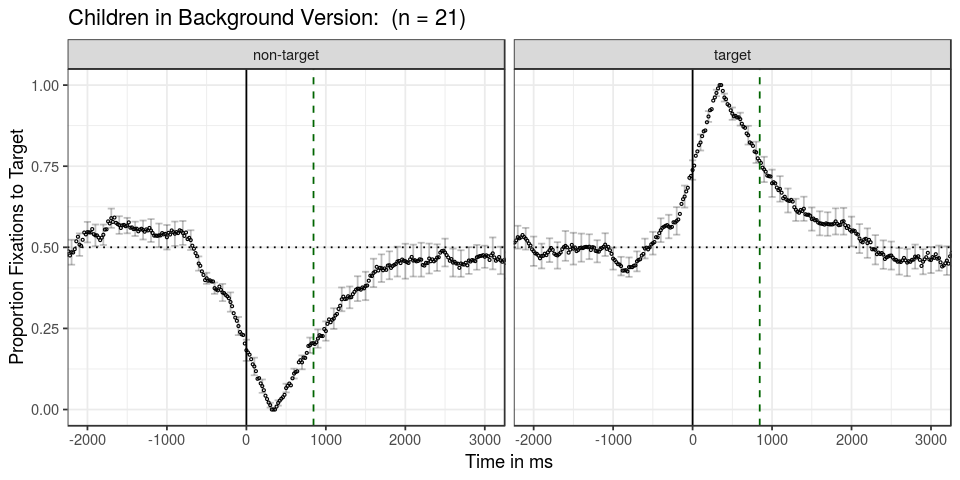

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_nullgroup_target~first3.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

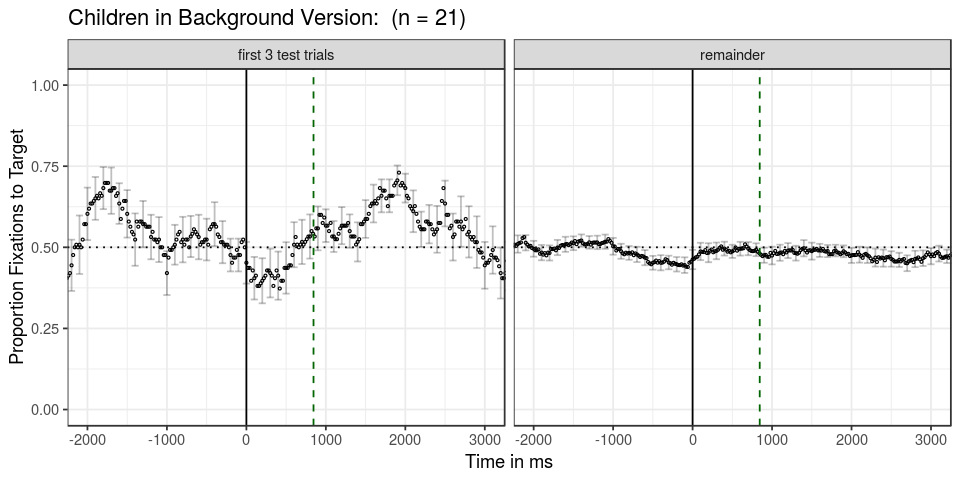

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='scene'_target_~novelty.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

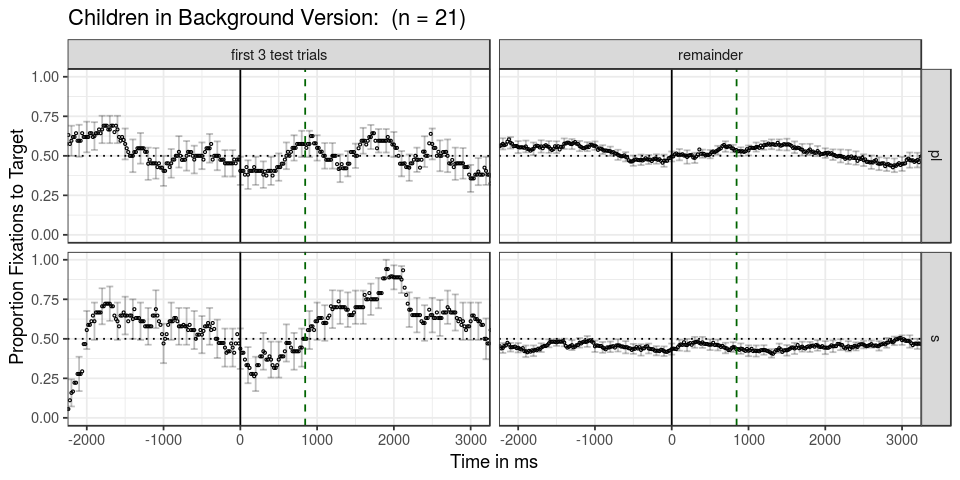

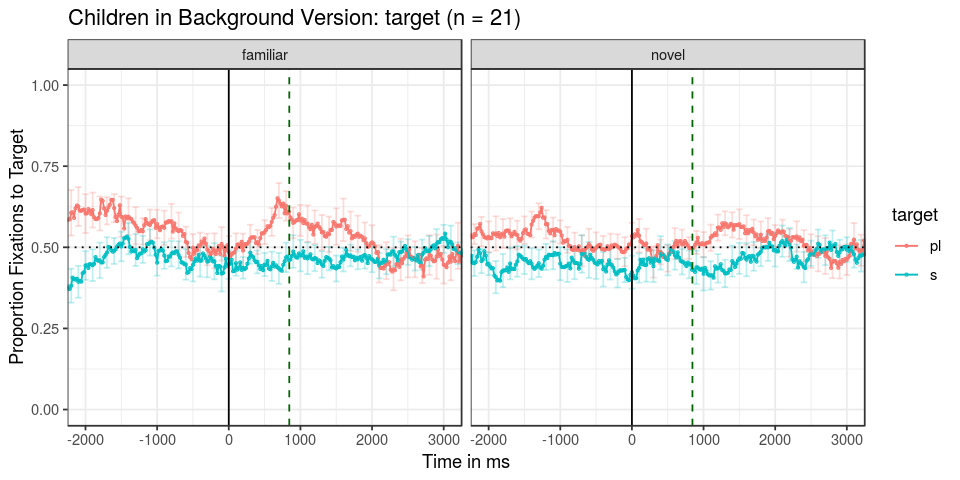

In [631]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child'& expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, group_title = 'Children in Background Version',
    save_plot=T)

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_target_.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_novelty_~target.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

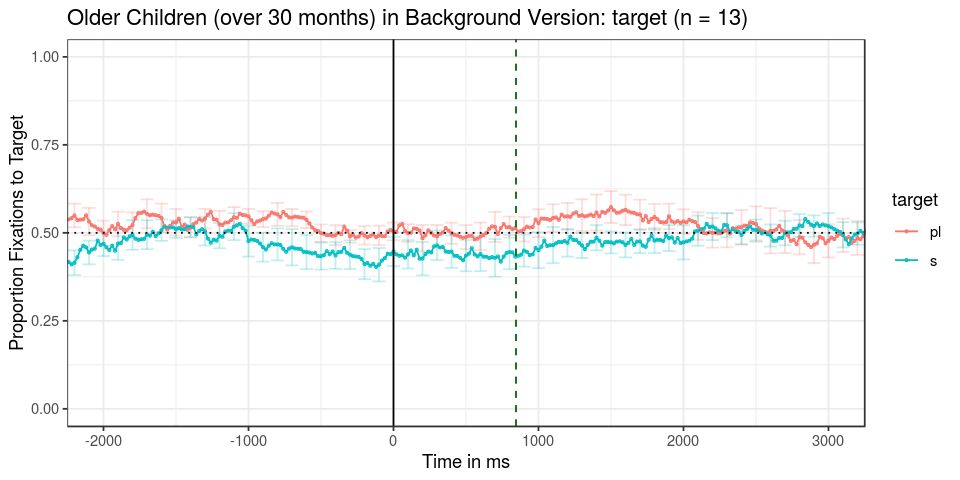

[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_voicing_~target.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

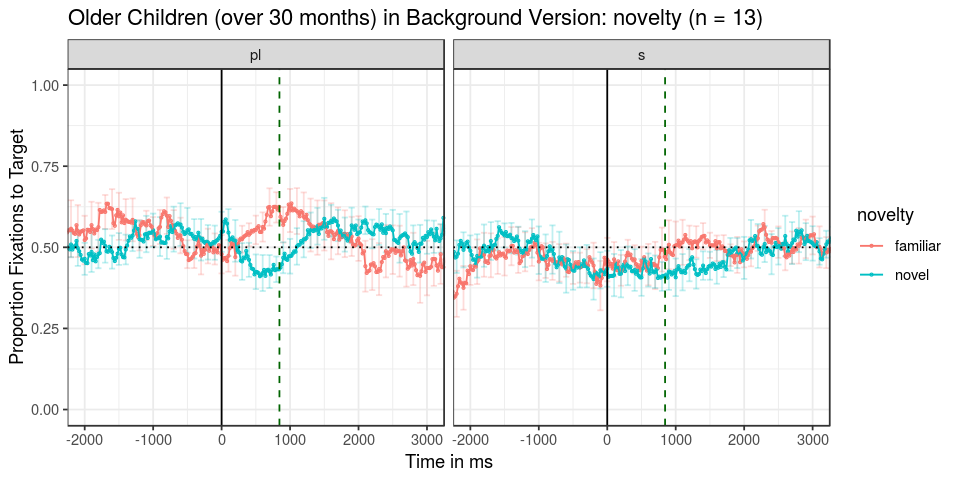

[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_animacystatus_~target.pdf"


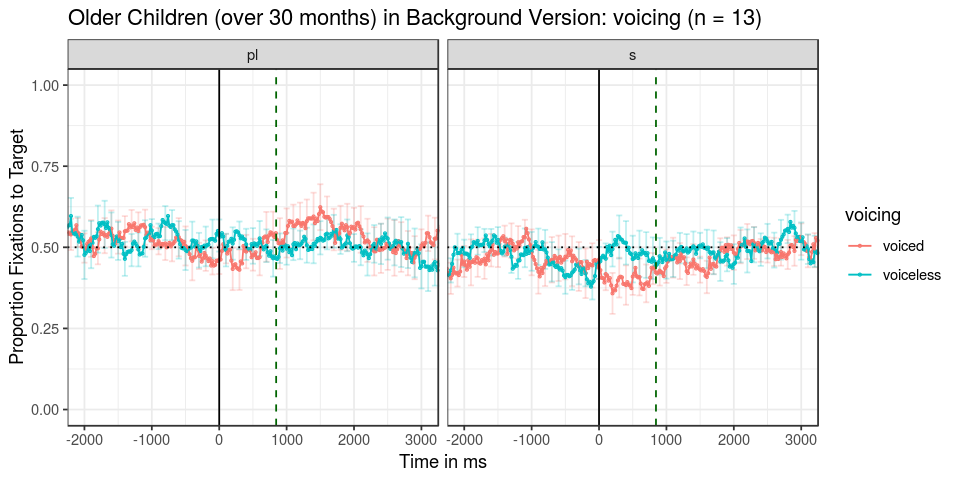

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"
[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_nullgroup_~label_at_onset.pdf"


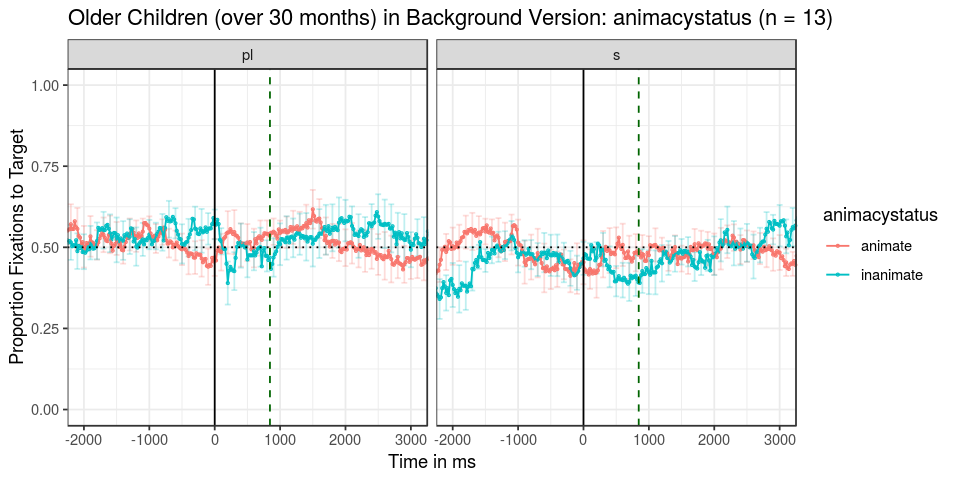

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"
[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_nullgroup_~first3.pdf"


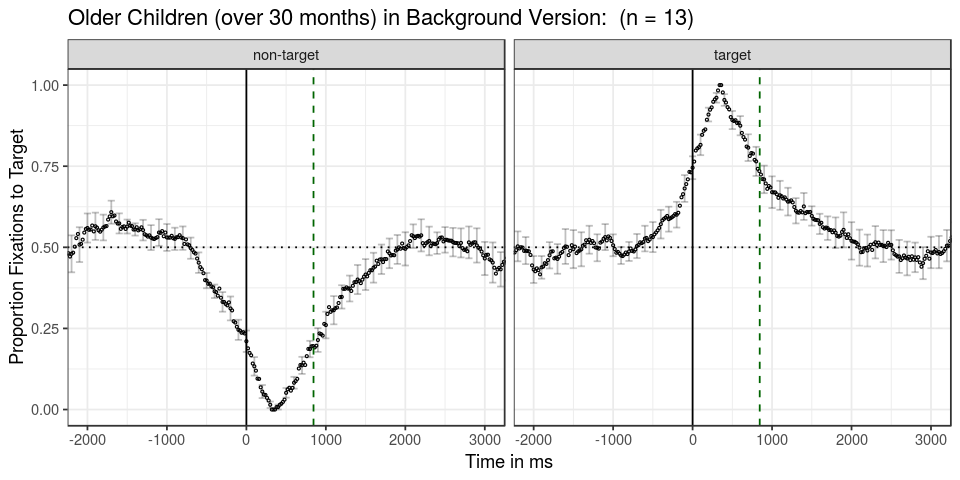

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_nullgroup_target~first3.pdf"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

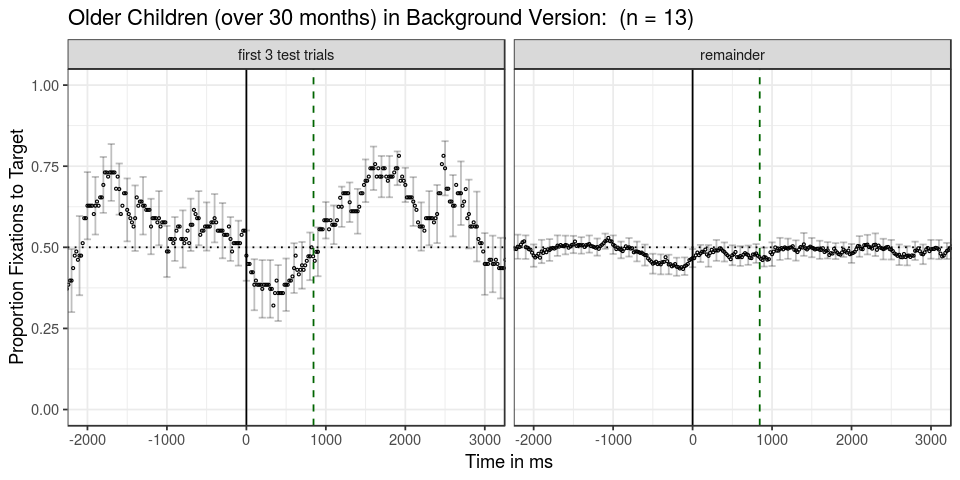

[1] "figures/type=='child'&age_in_days>=915&expt_version=='scene'_target_~novelty.pdf"


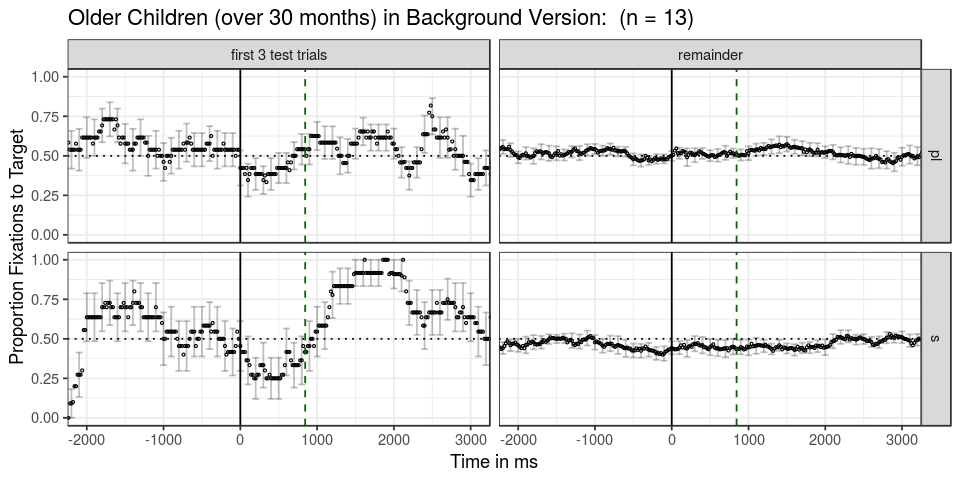

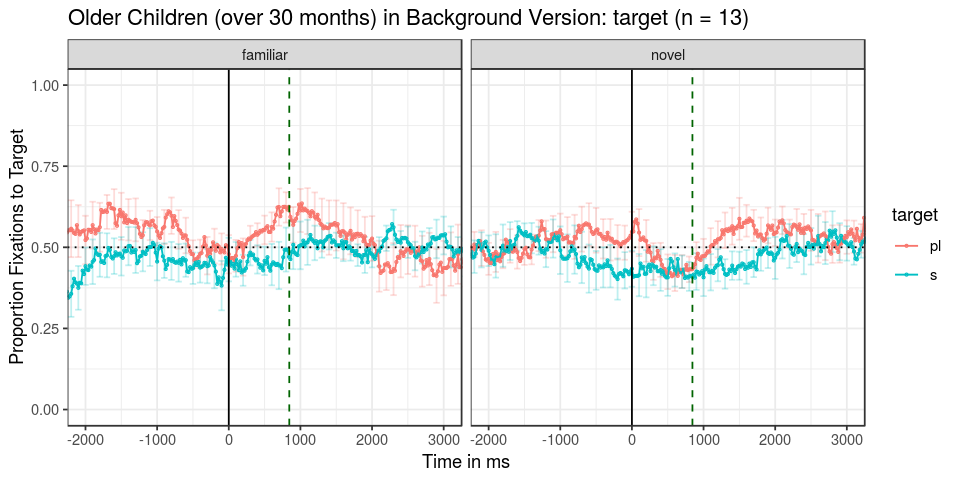

In [632]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & age_in_days >= 915 & expt_version == 'scene'",
    mean_pp_duration = mean_pp_duration, 
    group_title = 'Older Children (over 30 months) in Background Version', save_plot=T)

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_target_.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_novelty_~target.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

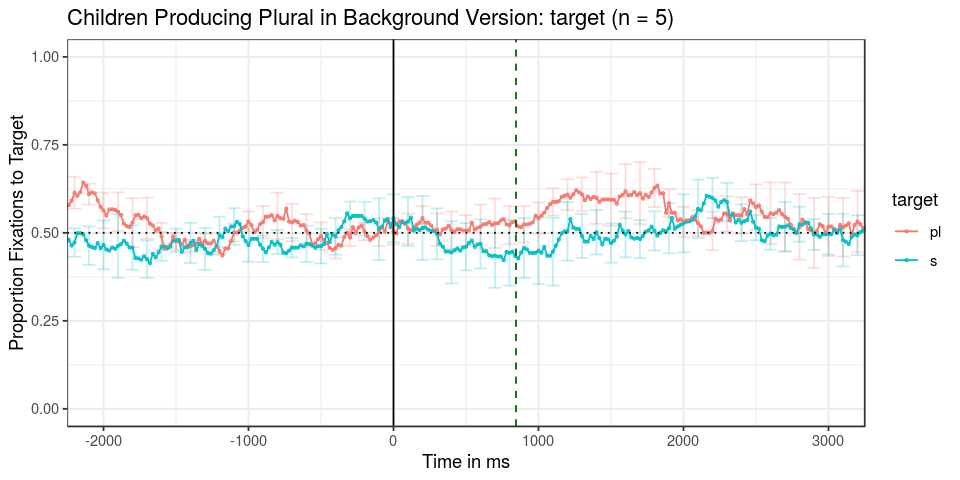

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_voicing_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

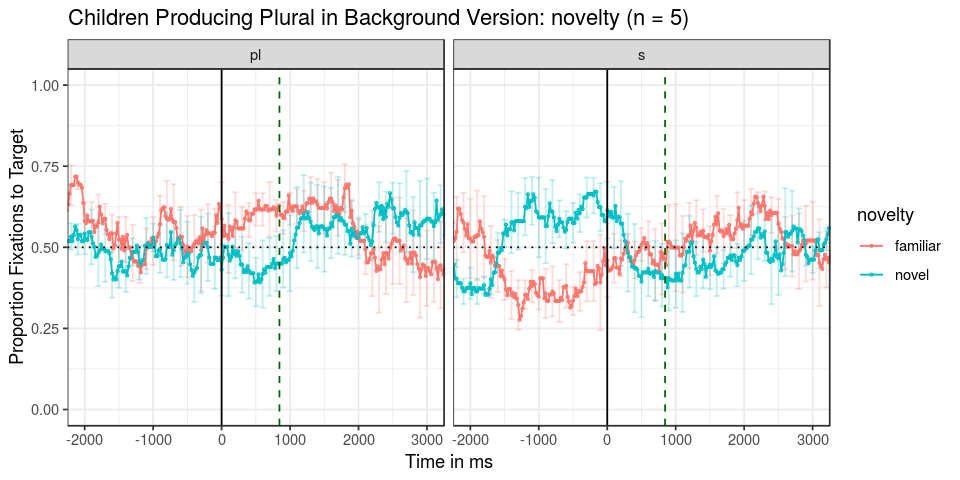

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_animacystatus_~target.pdf"


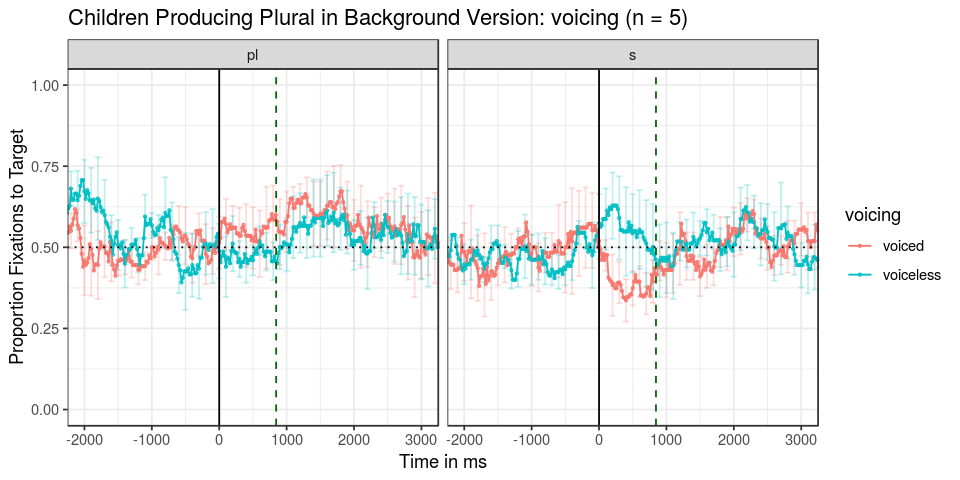

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_nullgroup_~label_at_onset.pdf"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

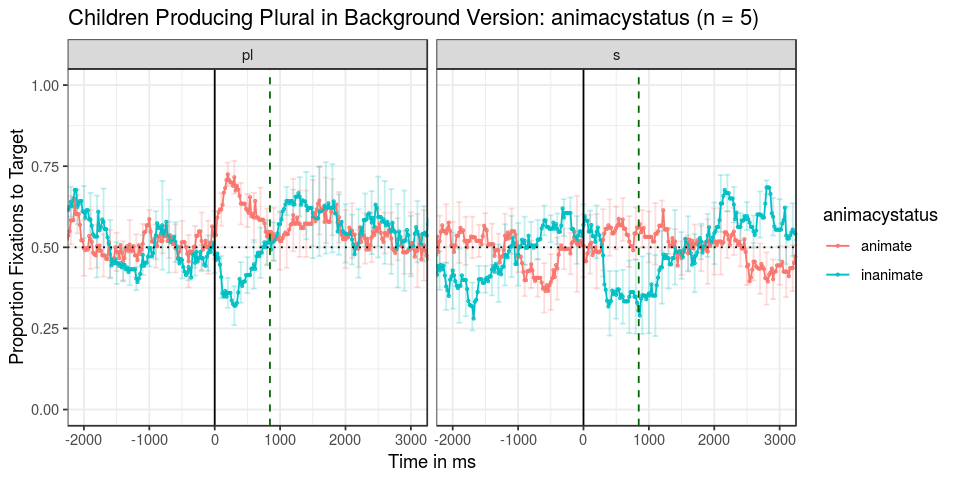

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_nullgroup_~first3.pdf"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

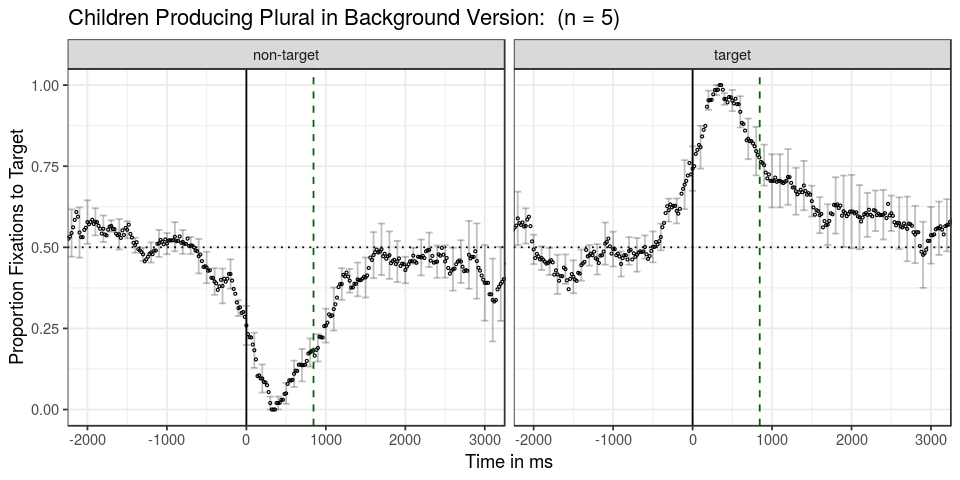

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_nullgroup_target~first3.pdf"


Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

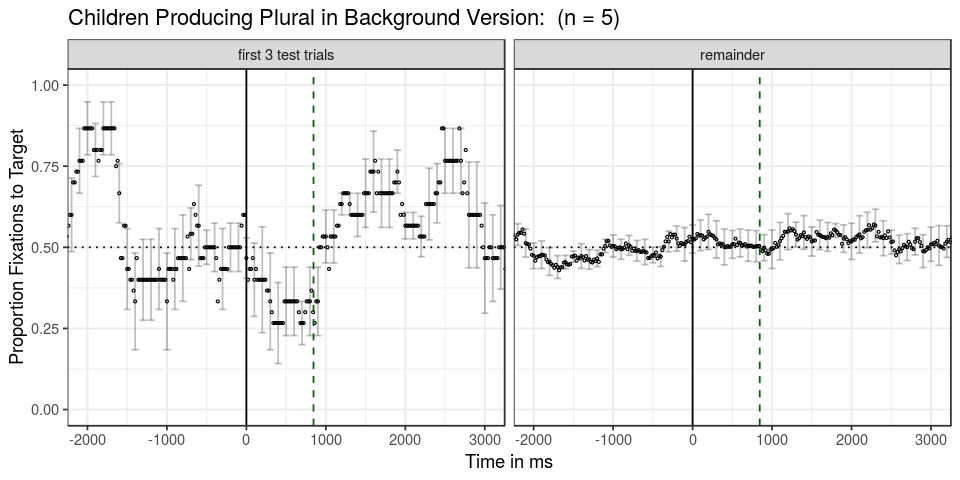

[1] "figures/type=='child'&broad_score>.5&expt_version=='scene'_target_~novelty.pdf"


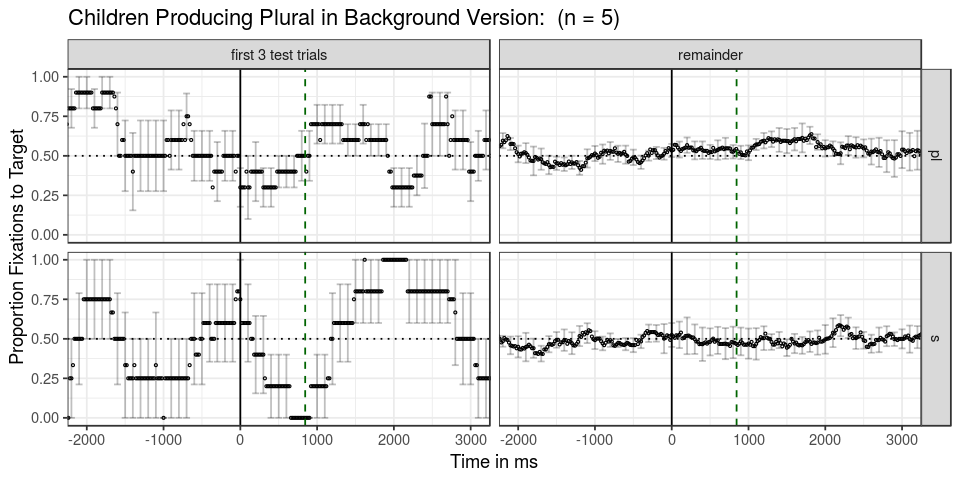

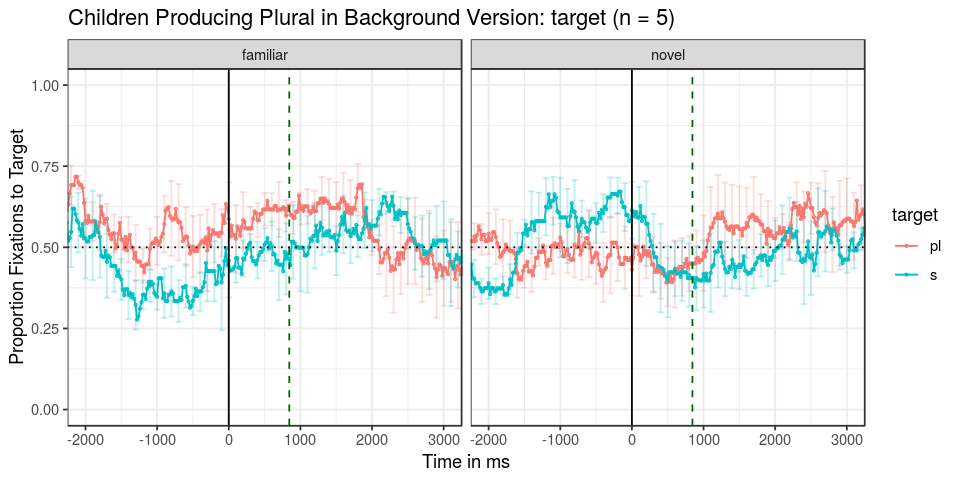

In [633]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & broad_score > .5 & expt_version == 'scene' ",
    mean_pp_duration = mean_pp_duration, 
    group_title = 'Children Producing Plural in Background Version', save_plot=T)

## Red/Blue (Simplified) Version

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='adult'&expt_version=='redblue'_target_.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='adult'&expt_version=='redblue'_novelty_~target.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

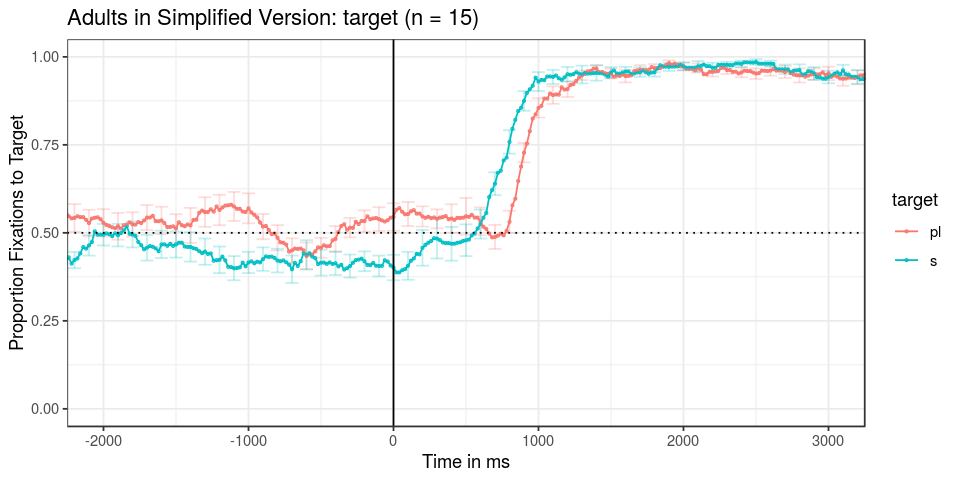

[1] "figures/type=='adult'&expt_version=='redblue'_voicing_~target.pdf"
[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

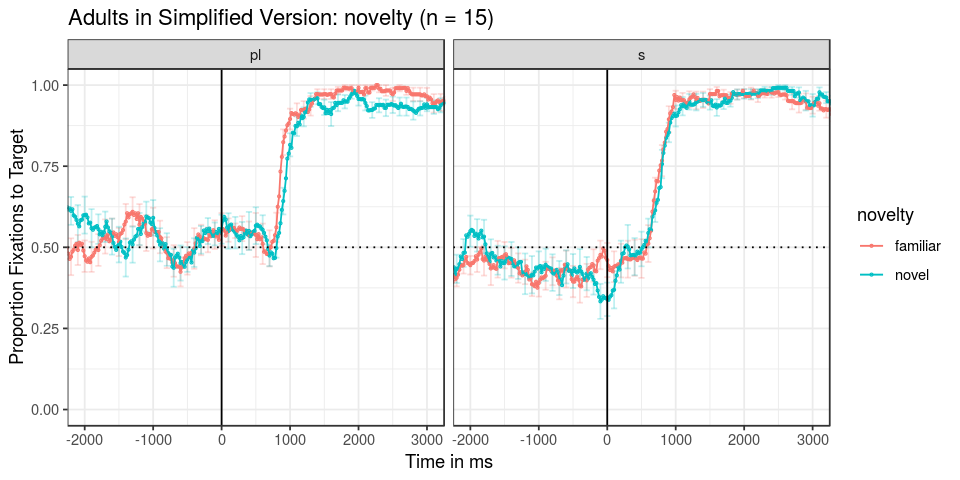

[1] "figures/type=='adult'&expt_version=='redblue'_animacystatus_~target.pdf"


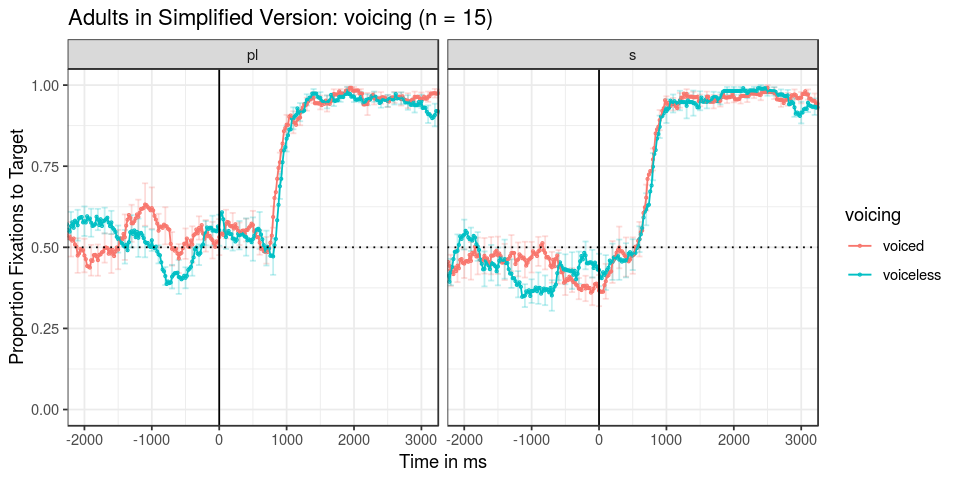

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

[1] "figures/type=='adult'&expt_version=='redblue'_nullgroup_~label_at_onset.pdf"


Warning message:
“Removed 2 rows containing missing values (geom_errorbar).”

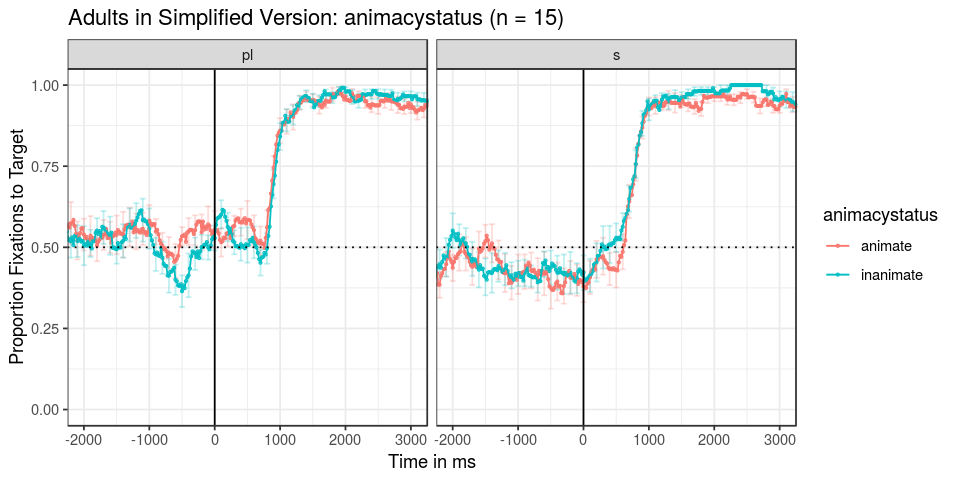

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"
[1] "figures/type=='adult'&expt_version=='redblue'_nullgroup_~first3.pdf"


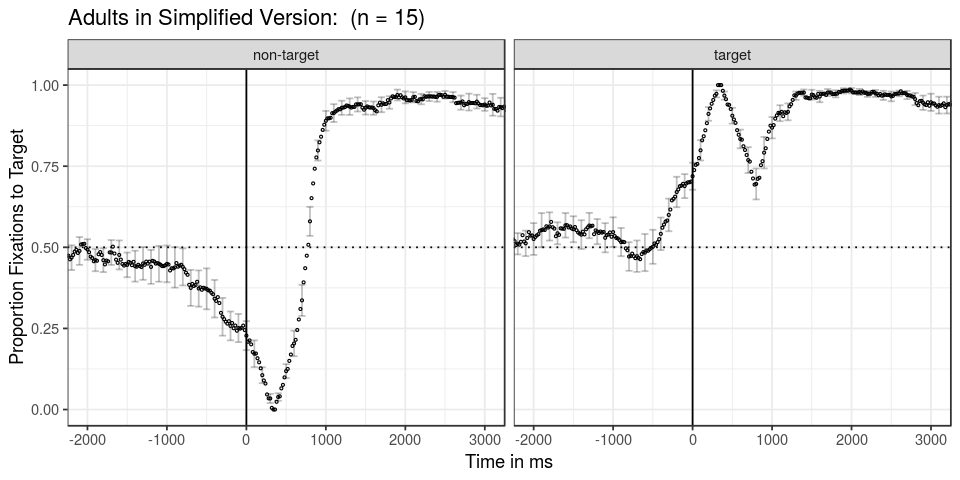

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"
[1] "figures/type=='adult'&expt_version=='redblue'_nullgroup_target~first3.pdf"
[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

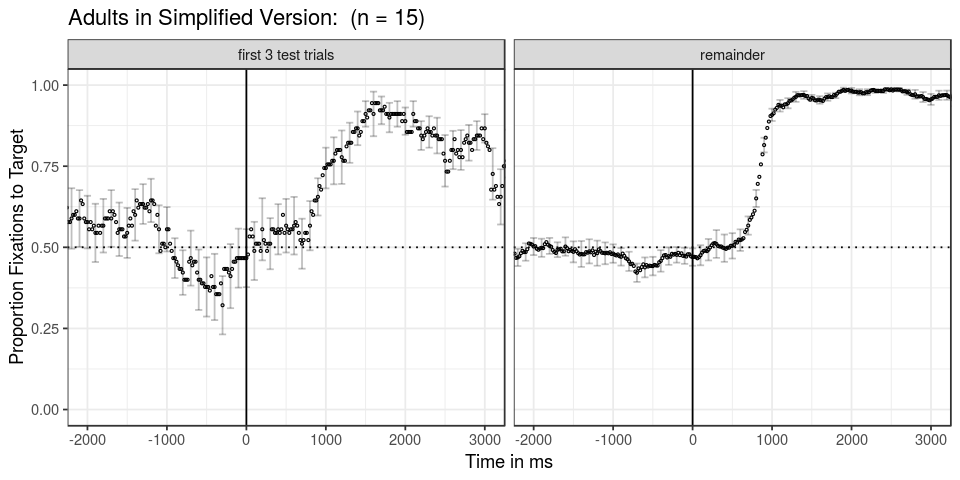

[1] "figures/type=='adult'&expt_version=='redblue'_target_~novelty.pdf"


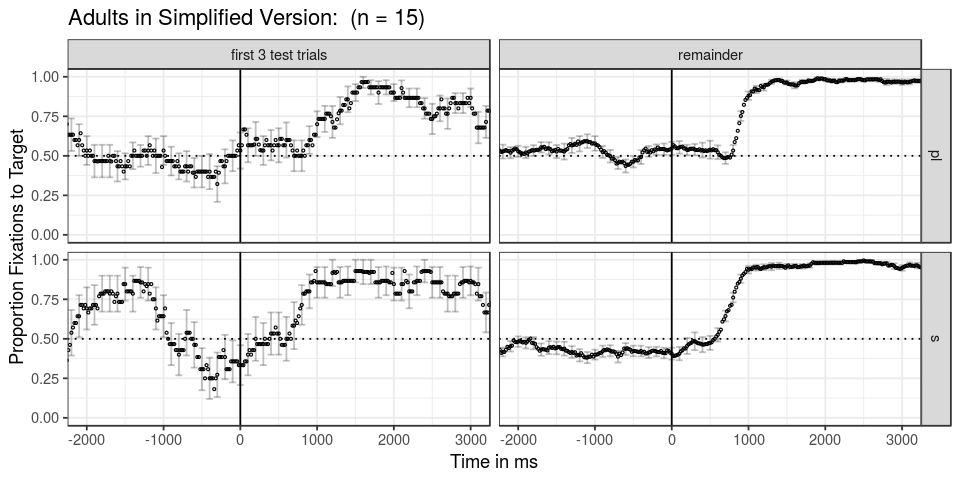

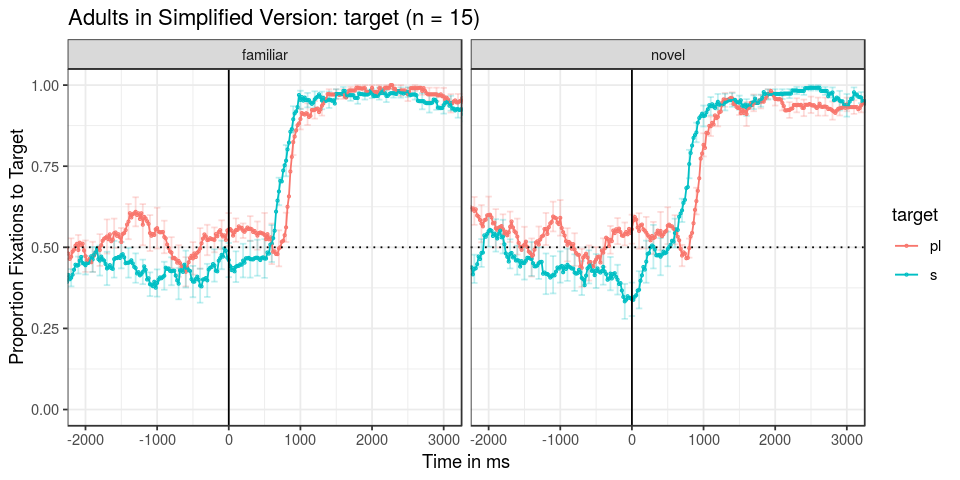

In [634]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'adult' & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Adults in Simplified Version', save_plot=T)

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_target_.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_novelty_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

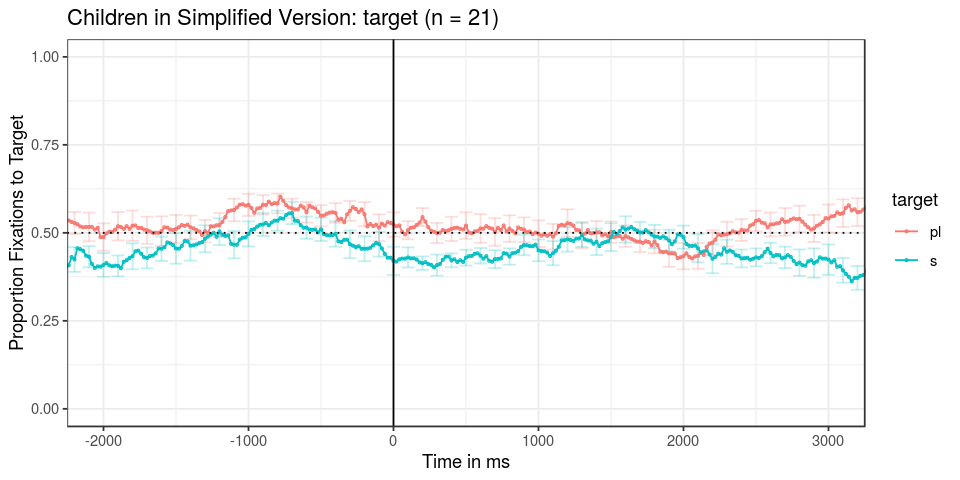

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_voicing_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

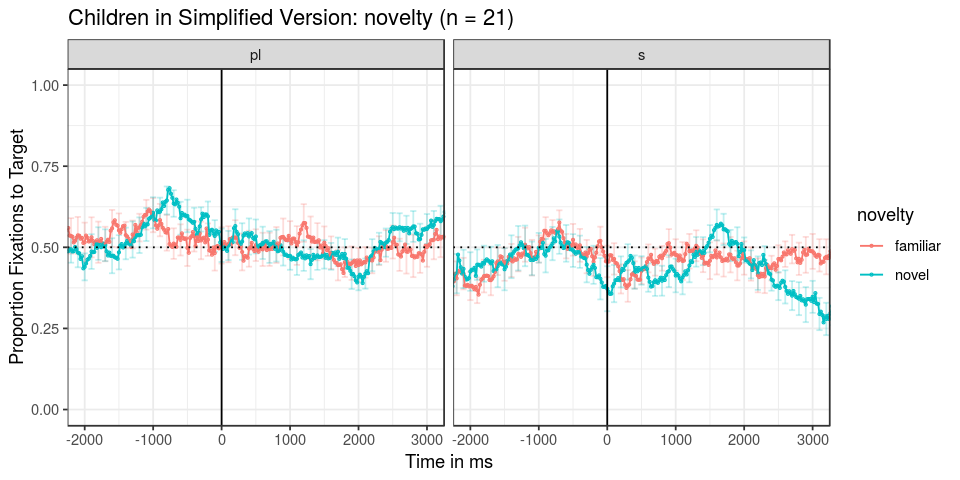

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_animacystatus_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

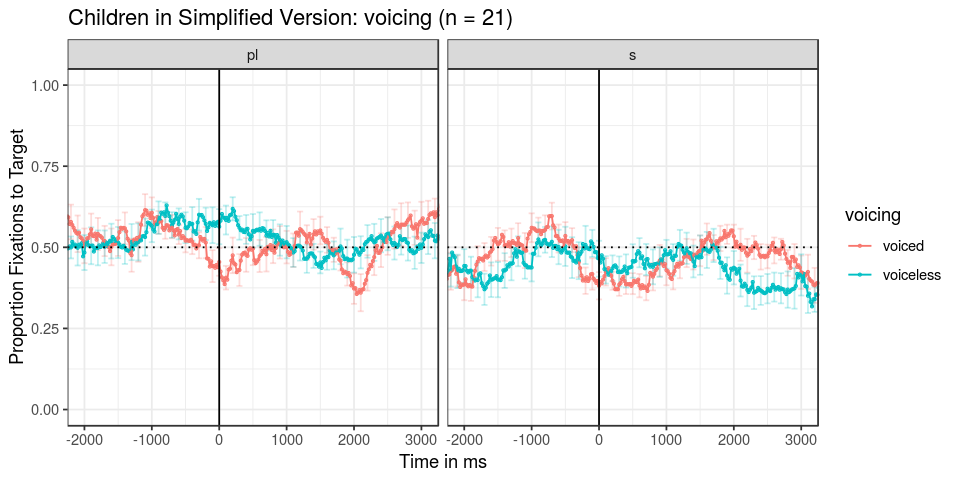

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_nullgroup_~label_at_onset.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

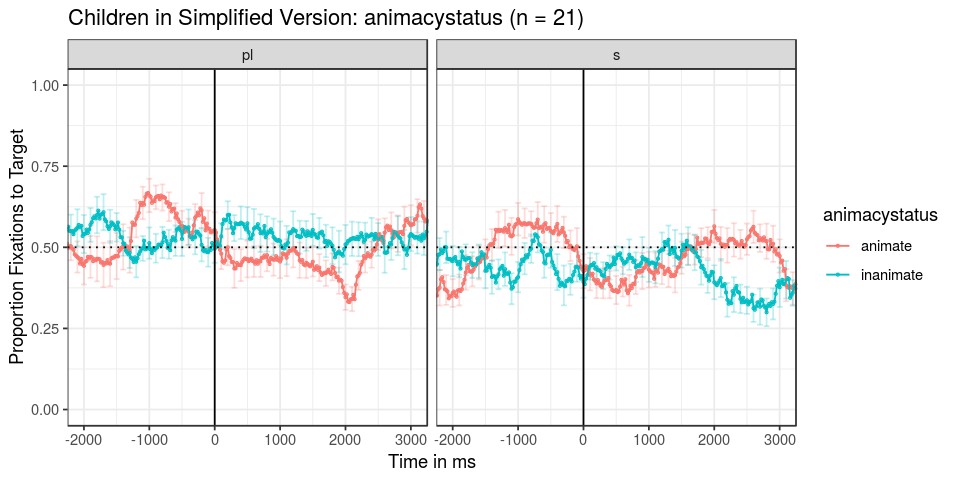

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_nullgroup_~first3.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

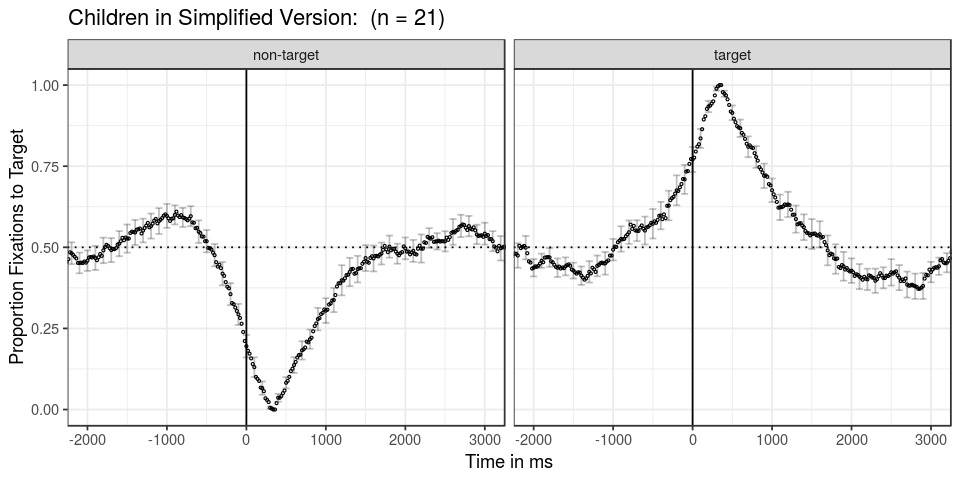

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_nullgroup_target~first3.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

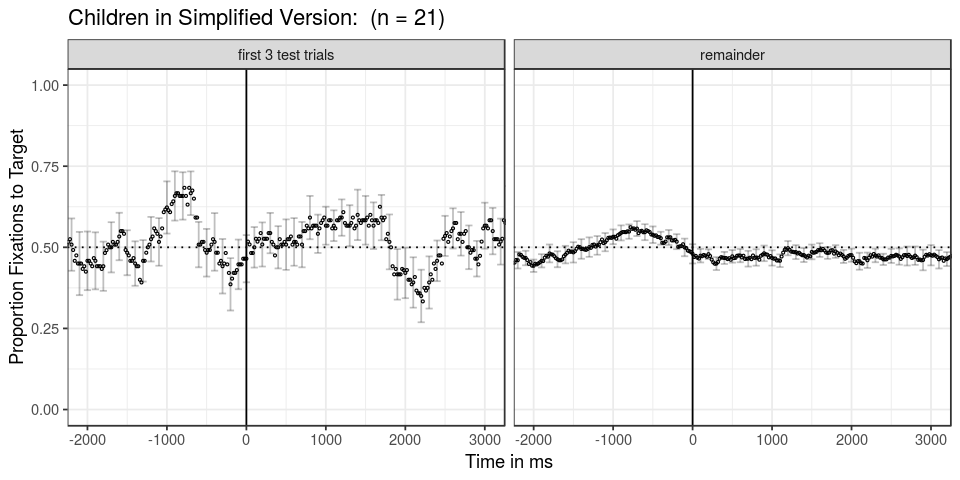

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'_target_~novelty.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

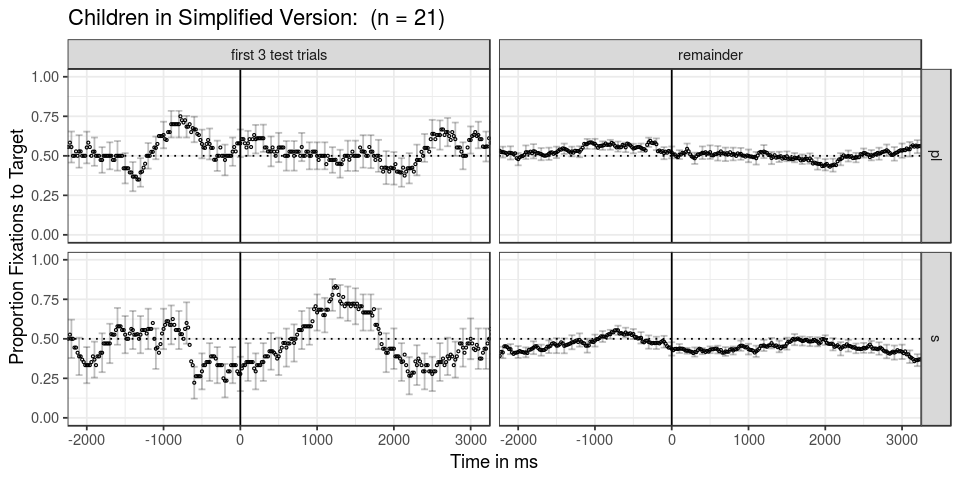

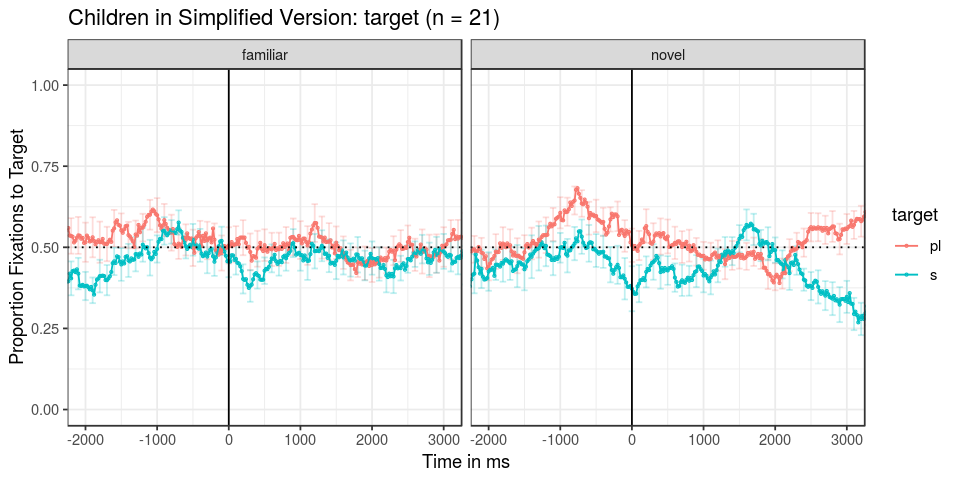

In [635]:
source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & expt_version == 'redblue'",
    mean_pp_duration = NULL, group_title = 'Children in Simplified Version', save_plot=T)

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_target_.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_novelty_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

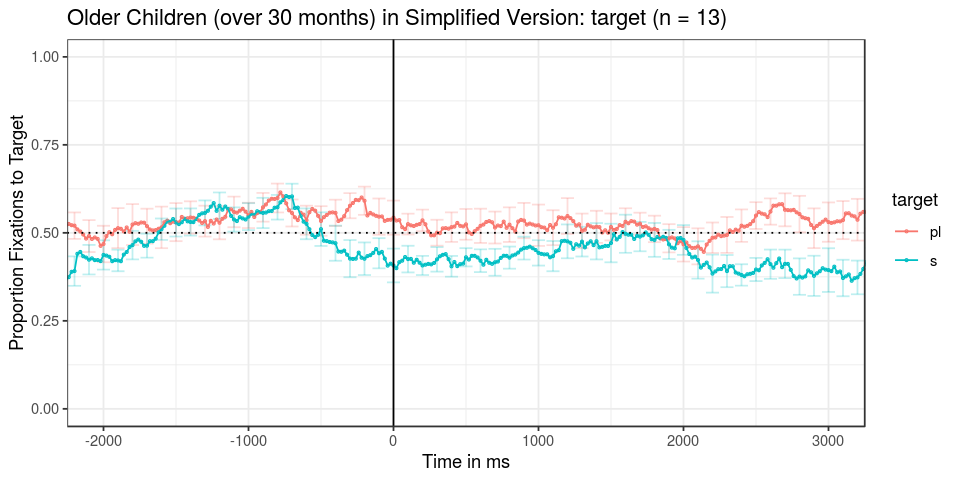

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_voicing_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

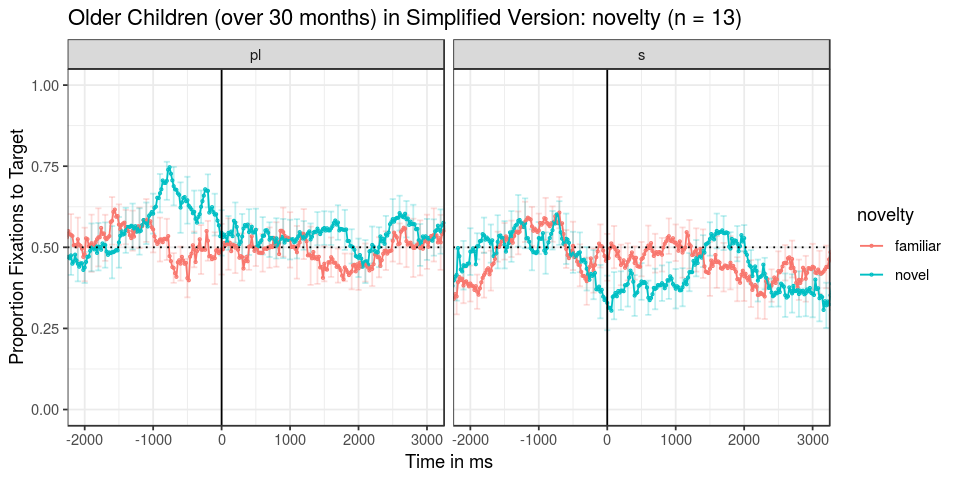

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_animacystatus_~target.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

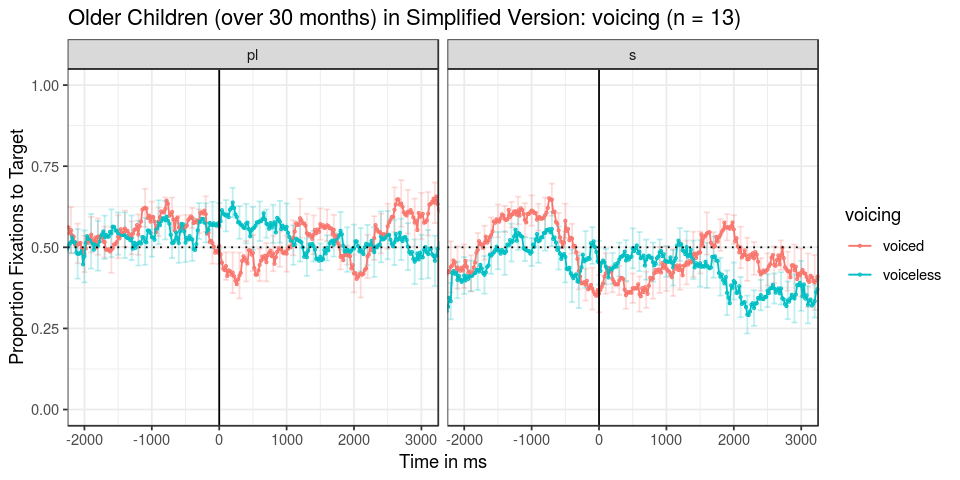

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_nullgroup_~label_at_onset.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

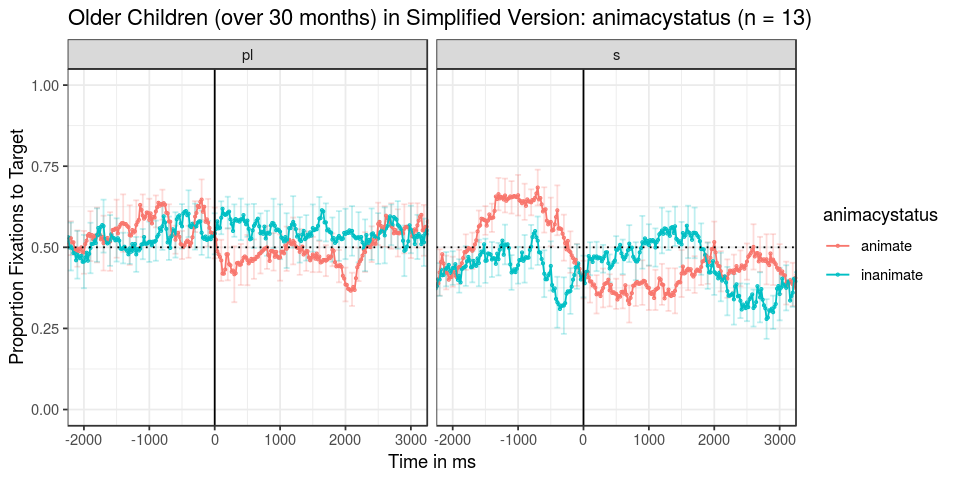

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_nullgroup_~first3.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

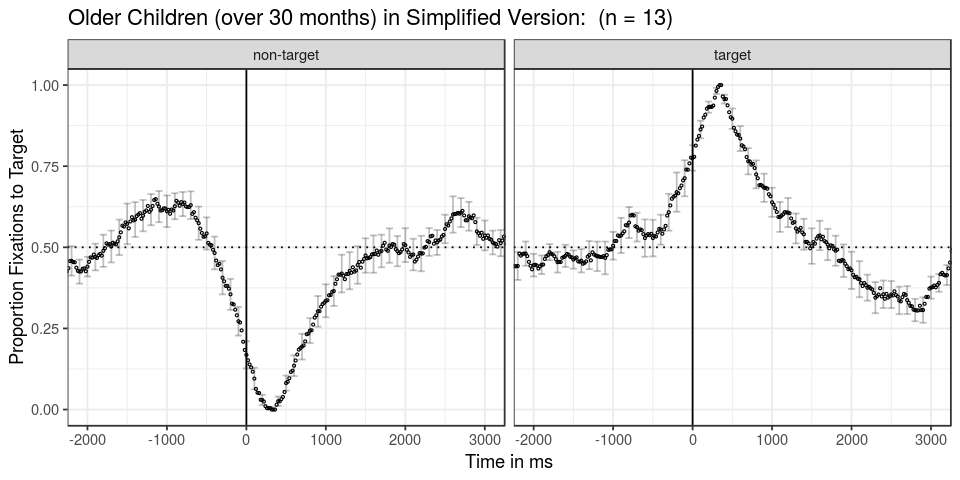

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_nullgroup_target~first3.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

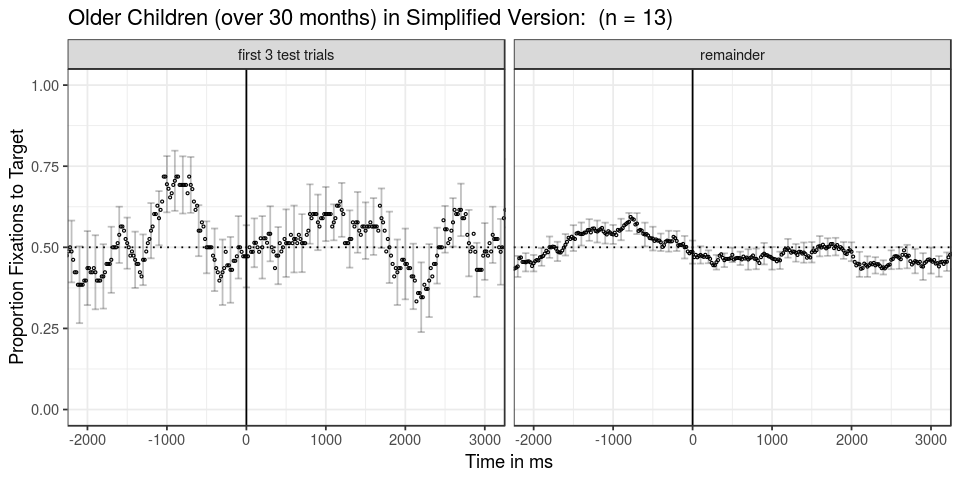

Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&age_in_days>=915&expt_version=='redblue'_target_~novelty.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

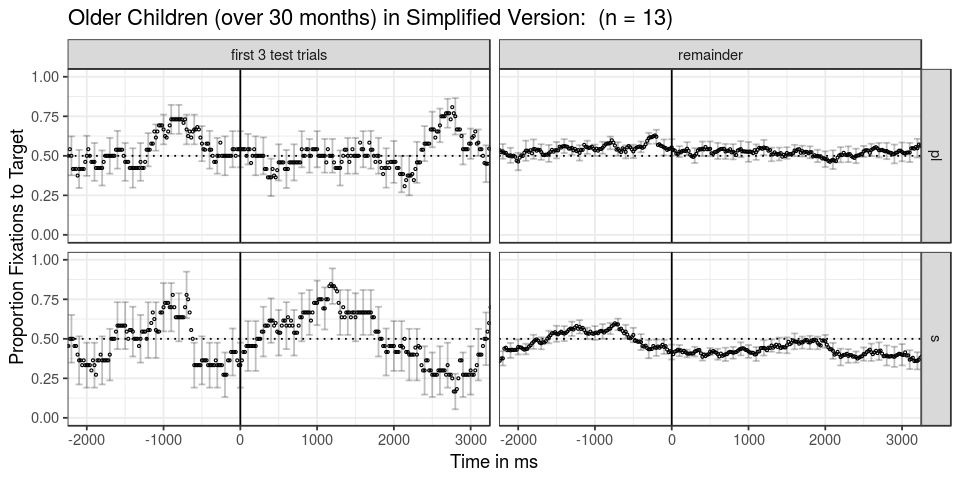

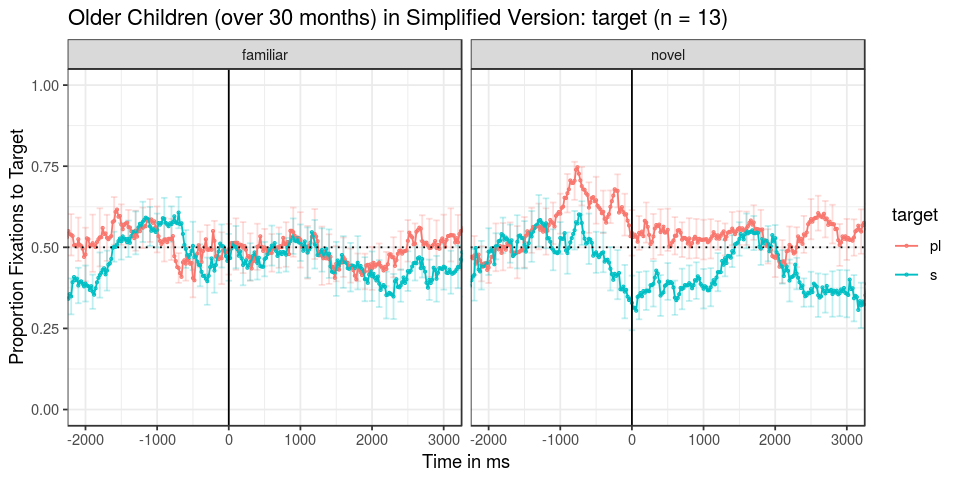

In [636]:
source('PLEARN_analysis_helper.R')
getGroupPlots(ed_df, filter_clause = "type == 'child' & age_in_days >= 915 & expt_version == 'redblue'",
    mean_pp_duration = NULL, 
              group_title = 'Older Children (over 30 months) in Simplified Version',
             save_plot=T)

[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_target_.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + novelty + target"


Warning message:
“Ignoring unknown parameters: shape”Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_novelty_~target.pdf"


Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + voicing + target"


Warning message:
“Ignoring unknown parameters: shape”

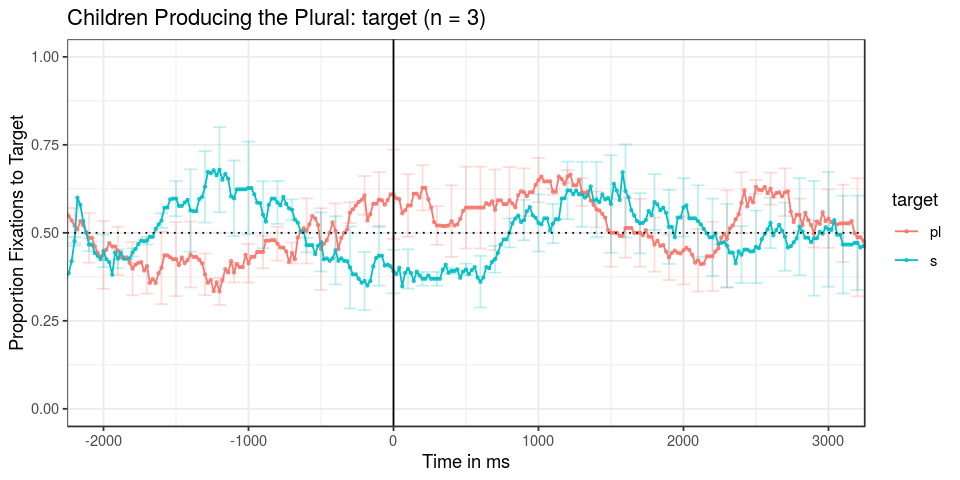

Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_voicing_~target.pdf"


Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + animacystatus + target"


Warning message:
“Ignoring unknown parameters: shape”

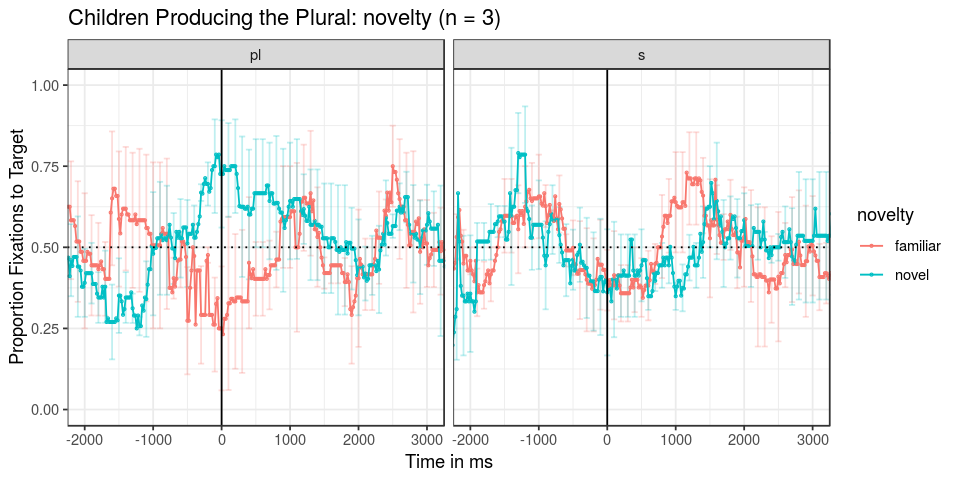

Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_animacystatus_~target.pdf"


Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

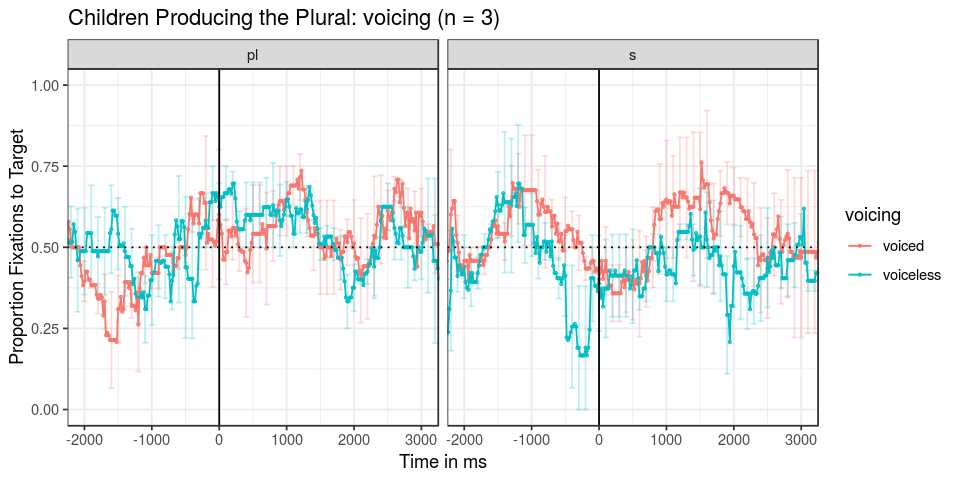

[1] "facet clause:"
[1] "~ label_at_onset"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + label_at_onset"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_nullgroup_~label_at_onset.pdf"


Warning message:
“Removed 1 rows containing missing values (geom_errorbar).”

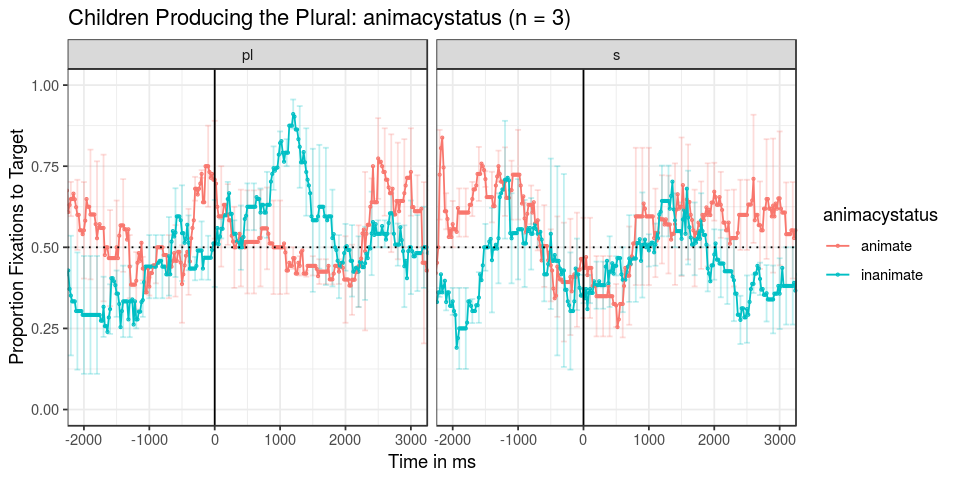

[1] "facet clause:"
[1] "~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + first3"


Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_nullgroup_~first3.pdf"


Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

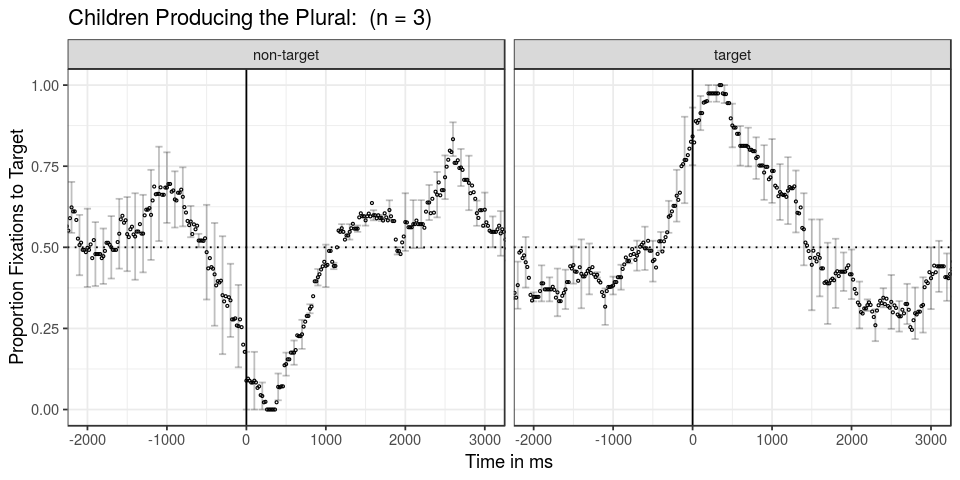

[1] "facet clause:"
[1] "target ~ first3"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target+first3"


Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_nullgroup_target~first3.pdf"


Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "facet clause:"
[1] "~ novelty"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + novelty"


Warning message:
“Ignoring unknown parameters: shape”

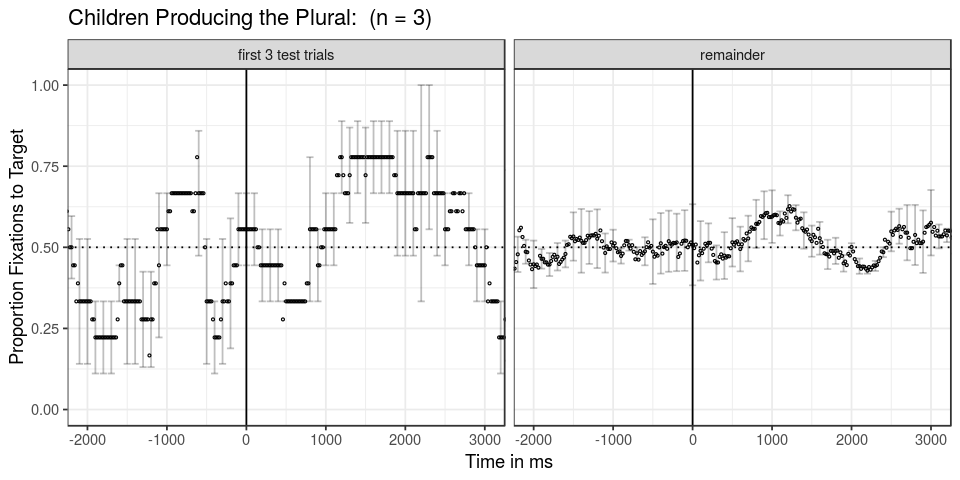

Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

[1] "figures/type=='child'&expt_version=='redblue'&\nbroad_score>.5_target_~novelty.pdf"


Warning message:
“Removed 5 rows containing missing values (geom_errorbar).”

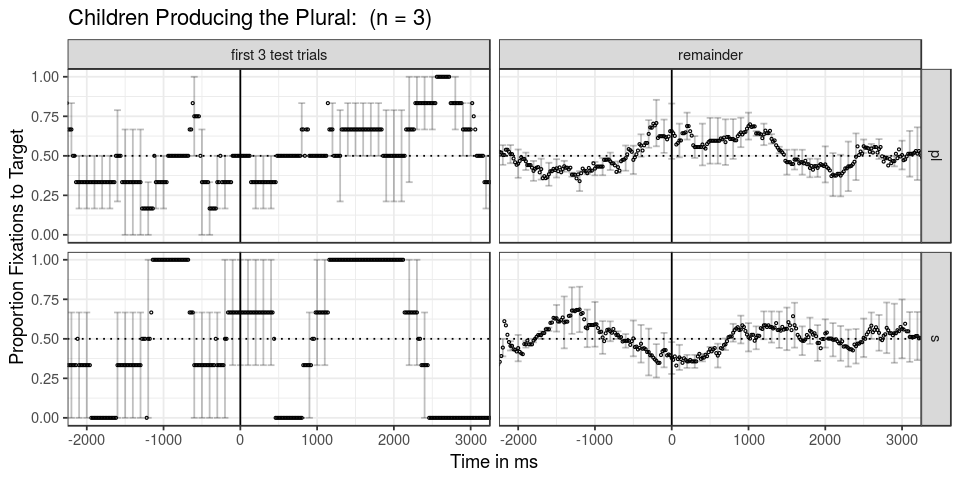

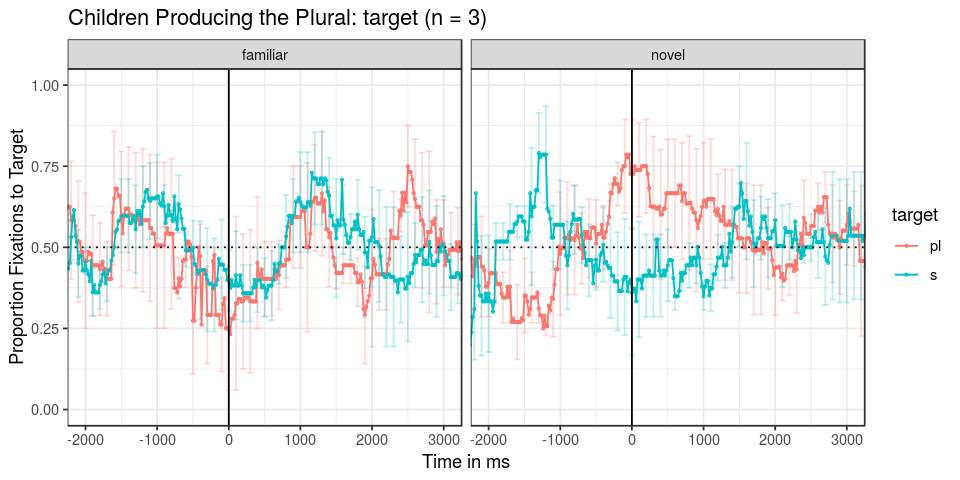

In [637]:
## source('PLEARN_analysis_helper.R')
options(repr.plot.width=6, repr.plot.height=6)
getGroupPlots(ed_df, filter_clause = "type == 'child' & expt_version == 'redblue' &
broad_score > .5",
    mean_pp_duration = NULL, group_title = 'Children Producing the Plural', save_plot=T)

# Comparison Between Experiments

[1] "facet clause:"
[1] "~ target"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + expt_version + target"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='adult'_expt_version_~target.pdf"


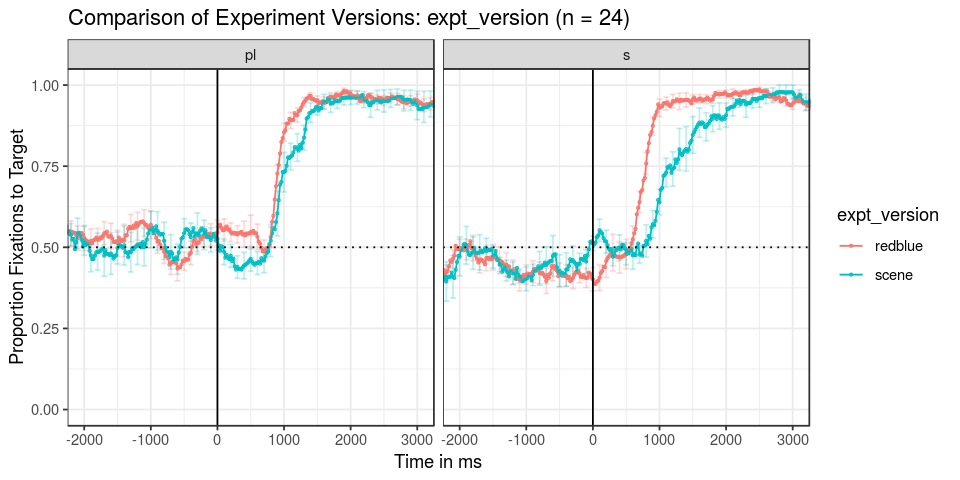

In [638]:
getGroupPlot(ed_df, 
        grouping_var = 'expt_version',
        filter_clause = "type == 'adult'",             
        facet_clause = '~ target',
        facet_type = 'wrap',
        loessSpan=.2, 
        x_start = -2000,
        x_end = 3000,
        mean_pp_duration= NULL,
        delay_ms= 367, 
        group_title = "Comparison of Experiment Versions",
        save_plot=T)

[1] "facet clause:"
[1] "~ expt_version"
[1] "Final aggregate statement is:"
[1] "cfial_bin ~ Time + target + expt_version"


Warning message:
“Ignoring unknown parameters: shape”

[1] "figures/type=='adult'_target_~expt_version.pdf"


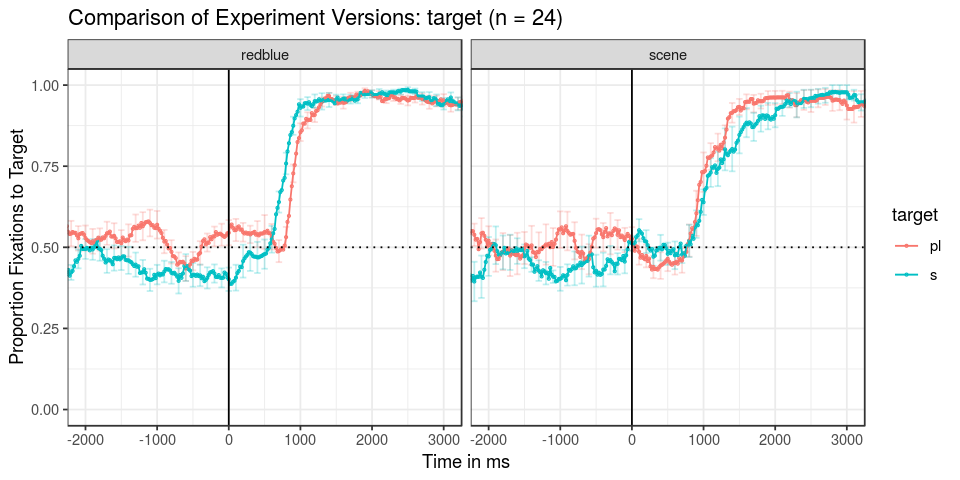

In [639]:
getGroupPlot(ed_df, 
        grouping_var = 'target',
        filter_clause = "type == 'adult'",             
        facet_clause = '~ expt_version',
        facet_type = 'wrap',
        loessSpan=.2, 
        x_start = -2000,
        x_end = 3000,
        mean_pp_duration= NULL,
        delay_ms= 367, 
        group_title = "Comparison of Experiment Versions",
        save_plot=T)

# Trial Level Data

In [941]:
source('PLEARN_analysis_helper.R')
ed_df_include = subset(ed_df, !exclude_trial) #exclude trials here
by_participant = split(ed_df_include, ed_df_include$filename)
trial_scores = do.call('rbind.fill', lapply(by_participant, function(fixbin_df){
        test_participant_receptive_knowledge(fixbin_df, 
            normalizeMethod="yoked", end_analysis_window= 4000, return_type = 'trial_level')
}))    

In [942]:
trial_scores[1,]

expt_index novelty  voicing   animacystatus s_form participant_type target
1 36         familiar voiceless animate       cat    adult            pl    
  participant_name.x  expt_version is_looking_at_target
1 adultpl12_fixations scene        0.8888889           
  is_looking_at_distractor
1 0.1111111

In [950]:
receptive_lm = glmer(is_looking_at_target~expt_version + novelty + voicing + animacystatus + 
    (novelty+ voicing + animacystatus|participant_name.x) +(1|s_form),
    data=subset(trial_scores, participant_type == "child"),
    )
summary(receptive_lm)

Linear mixed model fit by REML ['lmerMod']
Formula: 
is_looking_at_target ~ expt_version + novelty + voicing + animacystatus +  
    (novelty + voicing + animacystatus | participant_name.x) +  
    (1 | s_form)
   Data: subset(trial_scores, participant_type == "child")

REML criterion at convergence: 352.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.08083 -0.70181  0.01783  0.66991  2.08045 

Random effects:
 Groups             Name                   Variance  Std.Dev. Corr             
 participant_name.x (Intercept)            0.0011697 0.03420                   
                    noveltynovel           0.0007129 0.02670  -0.96            
                    voicingvoiceless       0.0029063 0.05391   0.32 -0.05      
                    animacystatusinanimate 0.0037313 0.06108  -0.93  0.80 -0.64
 s_form             (Intercept)            0.0006638 0.02576                   
 Residual                                  0.0759449 0.27558                   
Num

In [974]:
means = aggregate(is_looking_at_target ~ s_form + target + novelty, subset(trial_scores,
participant_type == "child"), mean)
names(means) = c('s_form','target', 'novelty', 'mean_looks_to_target')
ses = aggregate(is_looking_at_target ~ s_form + target + novelty, subset(trial_scores,
participant_type == "child"), function(x) {sd(x)/sqrt(length(x))})
names(ses) = c('s_form','target','novelty','se_looks_to_target')
by_item = merge(means, ses)
by_item$low = by_item$mean_looks_to_target - by_item$se_looks_to_target
by_item$high = by_item$mean_looks_to_target + by_item$se_looks_to_target

[1] "s_form"               "target"               "novelty"             
[4] "mean_looks_to_target" "se_looks_to_target"   "low"                 
[7] "high"

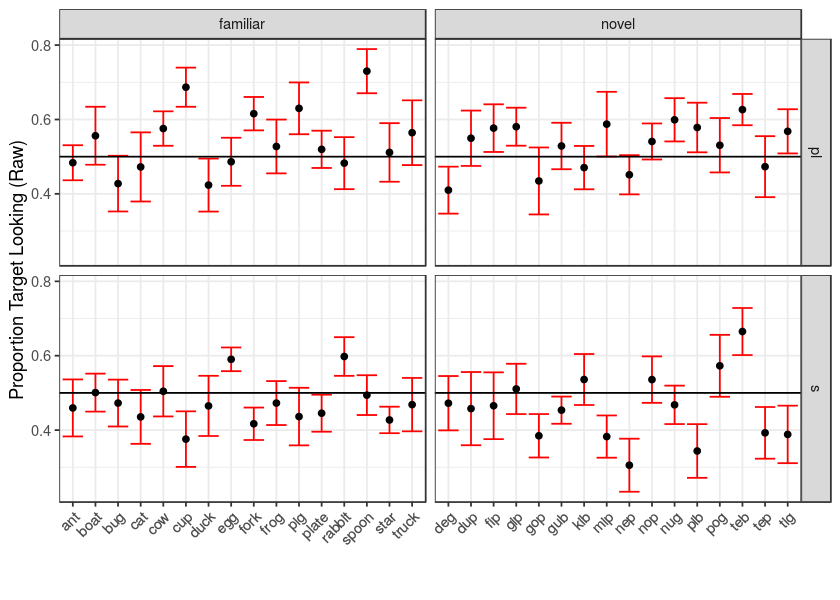

In [988]:
names(by_item)
ggplot(by_item) + facet_grid(target ~ novelty, scales="free_x") + geom_errorbar(aes(x=s_form, ymin=low, ymax=high),
color='red') + theme_bw() + ylab('Proportion Target Looking (Raw)') + xlab('
') + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + geom_hline(yintercept=.5
) + geom_point(aes(x=s_form, y= mean_looks_to_target))

# Participant Receptive Scores

In [930]:
source('PLEARN_analysis_helper.R')
normalizeMethods = c('none','yoked','preceding')
all_scores = do.call('rbind.fill', lapply(normalizeMethods, function(normalizeMethod){
    do.call('rbind.fill', lapply(by_participant, function(fixbin_df){
        test_participant_receptive_knowledge(fixbin_df, normalizeMethod, end_analysis_window= 4000)
    }))    
}))

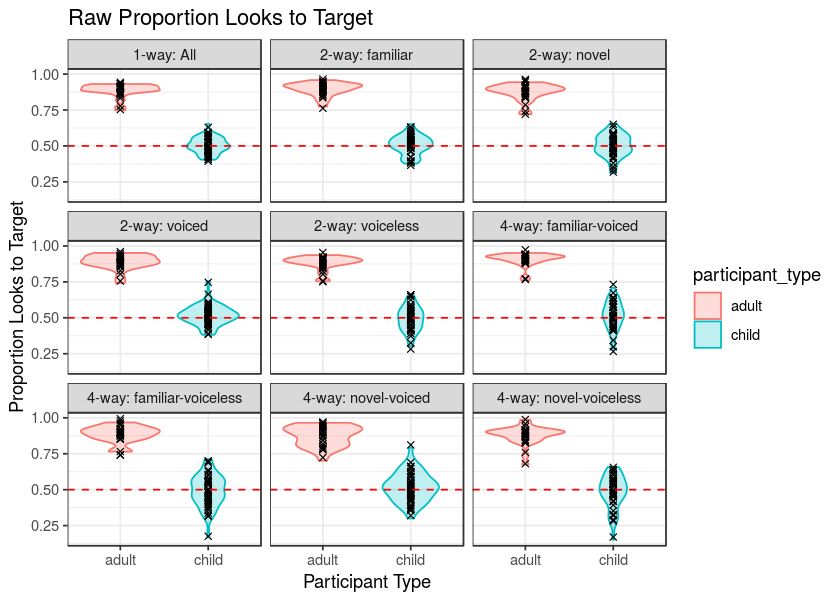

In [931]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'none')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=.5, 
linetype = 'dashed', colour='red') + ggtitle('Raw Proportion Looks to Target'
) + xlab('Participant Type') + ylab('Proportion Looks to Target') 

The reason to do it this way is to check if a particuar subset of items is above chance, e.g. familiar voicless

In [642]:
all_scores[1,]

participant_type contrast_type prob       prop_looks_to_target
1 adult            4-way         0.00390625 0.927594            
  thresholded                partition_name         normalizeMethod
1 Demonstrates RK! (p < .05) 4-way: familiar-voiced none           
  participant_name expt_version
1 adultpl12        scene

In [695]:
# adults first
adult_scores = subset(all_scores, normalizeMethod == 'yoked' & participant_type=='adult' & 
       contrast_type=='1-way')$prop_looks_to_target
shapiro.test(adult_scores)
#Adults are not normal per shapiuro test; not enough to rely on law of large numbers
#t.test(adult_scores, mu=0)
wilcox.test(adult_scores, mu = 0, alternative = "two.sided")


	Shapiro-Wilk normality test

data:  adult_scores
W = 0.81501, p-value = 0.0005236



	Wilcoxon signed rank test

data:  adult_scores
V = 300, p-value = 1.192e-07
alternative hypothesis: true location is not equal to 0


In [612]:
# Wilcoxon rank sum test of the difference between the two experiments
yoked_scores = subset(all_scores, normalizeMethod == 'yoked' & participant_type=='child' & 
       contrast_type=='1-way')
wilcox.test(subset(yoked_scores, expt_version == 'scene')$prop_looks_to_target,
           subset(yoked_scores, expt_version == 'redblue')$prop_looks_to_target)


	Wilcoxon rank sum test

data:  subset(yoked_scores, expt_version == "scene")$prop_looks_to_target and subset(yoked_scores, expt_version == "redblue")$prop_looks_to_target
W = 251, p-value = 0.4545
alternative hypothesis: true location shift is not equal to 0


This test suggests that we can combine across the two receptive experiments

In [690]:
shapiro.test(yoked_scores$prop_looks_to_target)


	Shapiro-Wilk normality test

data:  yoked_scores$prop_looks_to_target
W = 0.97992, p-value = 0.6585


In [896]:
sum(yoked_scores$prop_looks_to_target > 0)

[1] 24

In [696]:
mean(yoked_scores$prop_looks_to_target)
sd(yoked_scores$prop_looks_to_target)

[1] 0.009460205

[1] 0.1053011

In [682]:
mean(yoked_scores$prop_looks_to_target)
sd(yoked_scores$prop_looks_to_target)

[1] 0.009460205

[1] 0.1053011

In [644]:
t.test(yoked_scores$prop_looks_to_target, mu=0)


	One Sample t-test

data:  yoked_scores$prop_looks_to_target
t = 0.58223, df = 41, p-value = 0.5636
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.02335392  0.04227433
sample estimates:
  mean of x 
0.009460205 


But children are not statistically significantly different than 0.

In [615]:
# t-test of the yoked trials: familiar vs. novel
library('tidyr')
by_novelty_long = subset(all_scores, normalizeMethod == 'yoked' & participant_type =='child' & 
       partition_name %in% c("2-way: familiar", "2-way: novel"))[,c('participant_name',
    'partition_name','prop_looks_to_target')]

by_novelty_short = spread(by_novelty_long, partition_name, prop_looks_to_target)
t.test(by_novelty_short[['2-way: familiar']], by_novelty_short[['2-way: novel']], paired=T)


	Paired t-test

data:  by_novelty_short[["2-way: familiar"]] and by_novelty_short[["2-way: novel"]]
t = 0.46659, df = 41, p-value = 0.6433
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05422259  0.08680565
sample estimates:
mean of the differences 
             0.01629153 


In [700]:
mean(by_novelty_short[['2-way: familiar']])
sd(by_novelty_short[['2-way: familiar']])
mean(by_novelty_short[['2-way: novel']])
sd(by_novelty_short[['2-way: novel']])

[1] 0.01738375

[1] 0.1542178

[1] 0.001092213

[1] 0.1610717

No difference for novelty among the kids

In [645]:
print(t.test(by_novelty_short[['2-way: novel']], mu=0))
print(t.test(by_novelty_short[['2-way: familiar']], mu=0))


	One Sample t-test

data:  by_novelty_short[["2-way: novel"]]
t = 0.043945, df = 41, p-value = 0.9652
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.04910125  0.05128568
sample estimates:
  mean of x 
0.001092213 


	One Sample t-test

data:  by_novelty_short[["2-way: familiar"]]
t = 0.73052, df = 41, p-value = 0.4692
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.03067392  0.06544141
sample estimates:
 mean of x 
0.01738375 



Neither familiar nor novel items are different from chance (0)

In [647]:
by_voicing_long = subset(all_scores, normalizeMethod == 'yoked' & participant_type =='child' & 
       partition_name %in% c("2-way: voiceless", "2-way: voiced"))[,c('participant_name',
    'partition_name','prop_looks_to_target')]

by_voicing_short = spread(by_voicing_long, partition_name, prop_looks_to_target)
t.test(by_voicing_short[['2-way: voiced']], by_voicing_short[['2-way: voiceless']], paired=T)


	Paired t-test

data:  by_voicing_short[["2-way: voiced"]] and by_voicing_short[["2-way: voiceless"]]
t = 1.5686, df = 41, p-value = 0.1244
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01748117  0.13909396
sample estimates:
mean of the differences 
             0.06080639 


No difference for voicing among the kids

In [701]:
mean(by_voicing_short[['2-way: voiceless']])
sd(by_voicing_short[['2-way: voiceless']])
mean(by_voicing_short[['2-way: voiced']])
sd(by_voicing_short[['2-way: voiced']])

[1] -0.01671458

[1] 0.1750891

[1] 0.04409181

[1] 0.1488315

In [649]:
print(t.test(by_voicing_short[['2-way: voiceless']], mu=0))
print(t.test(by_voicing_short[['2-way: voiced']], mu=0))


	One Sample t-test

data:  by_voicing_short[["2-way: voiceless"]]
t = -0.61867, df = 41, p-value = 0.5396
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.07127618  0.03784701
sample estimates:
  mean of x 
-0.01671458 


	One Sample t-test

data:  by_voicing_short[["2-way: voiced"]]
t = 1.9199, df = 41, p-value = 0.06184
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.002287347  0.090470968
sample estimates:
 mean of x 
0.04409181 



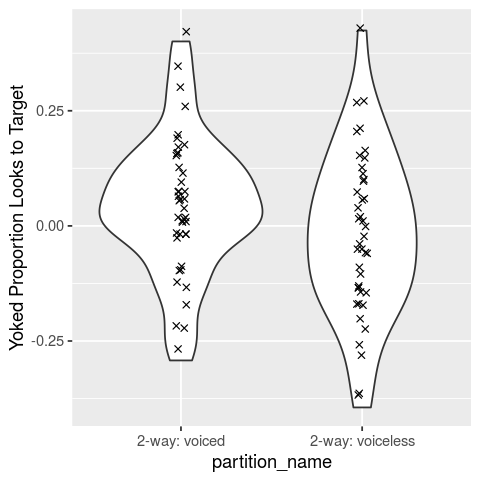

In [650]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(by_voicing_long) + geom_violin(aes(y=prop_looks_to_target, x=partition_name )
) + geom_point(aes(x=partition_name, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=.03)) + ylab('Yoked Proportion Looks to Target')

In [651]:
source('PLEARN_analysis_helper.R')
ltts = do.call('rbind', lapply(by_participant, function(fixbin_df){
        test_participant_receptive_knowledge(fixbin_df, 'yoked',
                    end_analysis_window= 4000, returnLTT=T)
    }))    

In [652]:
names(ltts) #ltts should know if it is a plural form

[1] "expt_index"                         "novelty"                           
 [3] "voicing"                            "dummy"                             
 [5] "s_form"                             "participant_type"                  
 [7] "target"                             "is_looking_at_target"              
 [9] "is_looking_at_distractor"           "prop_looks_to_item_when_distractor"
[11] "thresholded"                        "participant_name"

In [653]:
# shouldn't more of these participants be excluded? if they are contributing fewer than 18?
# complicated by the yoking
aggregate(expt_index ~ participant_name, ltts, length)

participant_name     expt_index
1  adultpl12            32        
2  adultpl13            32        
3  adultpl14            30        
4  adultpl15            28        
5  adultpl16            32        
6  pl00                 28        
7  pl01                 30        
8  pl03                 10        
9  pl06                 32        
10 pl07                 32        
11 pl08                 32        
12 pl09                 28        
13 pl10                  8        
14 pl11                 18        
15 pl13                 24        
16 pl14                 26        
17 pl15                 20        
18 pl16                 32        
19 pl17                 22        
20 pl18                 24        
21 pl19                 26        
22 pl20                 32        
23 pl22                 32        
24 pl23                 14        
25 pl24                 20        
26 pl25                 18        
27 pl27                 30        
28 pl28                 30        
29 pl29                 26        
30 pl30                 16        
⋮  ⋮                    ⋮         
37 pl41                 28        
38 pl42                 22        
39 pl43                 10        
40 pl44                 14        
41 pl45                 14        
42 pl46                 18        
43 pl47                 30        
44 pl48                 26        
45 pl49                  8        
46 pl50                 12        
47 pl51                 32        
48 pl52                 16        
49 pl55                 30        
50 pl57                 22        
51 plearn_adults_plad01 32        
52 plearn_adults_plad02 32        
53 plearn_adults_plad03 30        
54 plearn_adults_plad04 28        
55 plearn_adults_plad05 32        
56 plearn_adults_plad06 30        
57 plearn_adults_plad07 32        
58 plearn_adults_plad08 26        
59 plearn_adults_plad09 32        
60 plearn_adults_plad10 32        
61 plearn_adults_plad11 30        
62 plearn_adults_plad12 32        
63 plearn_adults_plad13 32        
64 plearn_adults_plad14 32        
65 plearn_adults_plad15 30        
66 smflip3_fixreport    26

In [654]:
ltts[,c('expt_index','is_looking_at_target','is_looking_at_distractor',
        'prop_looks_to_item_when_distractor')]

expt_index is_looking_at_target
adultpl12_fixations.txt.1    10         0.7125000           
adultpl12_fixations.txt.2    11         0.7256098           
adultpl12_fixations.txt.3    12         0.9125000           
adultpl12_fixations.txt.4    13         0.8518519           
adultpl12_fixations.txt.5    14         1.0000000           
adultpl12_fixations.txt.6    15         0.9403974           
adultpl12_fixations.txt.7    16         1.0000000           
adultpl12_fixations.txt.8    17         1.0000000           
adultpl12_fixations.txt.9    18         0.8658537           
adultpl12_fixations.txt.10   19         0.9367089           
adultpl12_fixations.txt.11   20         0.9423077           
adultpl12_fixations.txt.12   21         0.9696970           
adultpl12_fixations.txt.13   22         0.8846154           
adultpl12_fixations.txt.14   23         0.8734177           
adultpl12_fixations.txt.15   24         0.9548387           
adultpl12_fixations.txt.16   25         0.8633540           
adultpl12_fixations.txt.17   26         0.8881988           
adultpl12_fixations.txt.18   27         0.8280255           
adultpl12_fixations.txt.19   28         0.7515152           
adultpl12_fixations.txt.20   29         0.8815789           
adultpl12_fixations.txt.21   30         1.0000000           
adultpl12_fixations.txt.22   31         0.8616352           
adultpl12_fixations.txt.23   32         0.4879518           
adultpl12_fixations.txt.24   33         1.0000000           
adultpl12_fixations.txt.25   34         0.8364780           
adultpl12_fixations.txt.26   35         0.9770115           
adultpl12_fixations.txt.27   36         0.8888889           
adultpl12_fixations.txt.28   5          0.9007092           
adultpl12_fixations.txt.29   6          0.7448276           
adultpl12_fixations.txt.30   7          1.0000000           
⋮                            ⋮          ⋮                   
plearn_adults_plad15.xlsx.27 6          0.7633136           
plearn_adults_plad15.xlsx.28 7          0.7261146           
plearn_adults_plad15.xlsx.29 8          0.7407407           
plearn_adults_plad15.xlsx.30 9          0.5214724           
smflip3_fixreport.txt.1      10         0.7658228           
smflip3_fixreport.txt.2      11         0.7784810           
smflip3_fixreport.txt.3      12         0.7005988           
smflip3_fixreport.txt.4      13         0.6916667           
smflip3_fixreport.txt.5      14         0.5555556           
smflip3_fixreport.txt.6      15         0.8636364           
smflip3_fixreport.txt.7      16         0.6857143           
smflip3_fixreport.txt.8      17         0.8678161           
smflip3_fixreport.txt.9      18         0.5380117           
smflip3_fixreport.txt.10     19         0.6568047           
smflip3_fixreport.txt.11     20         0.4049080           
smflip3_fixreport.txt.12     21         0.8297872           
smflip3_fixreport.txt.13     22         0.4666667           
smflip3_fixreport.txt.14     23         1.0000000           
smflip3_fixreport.txt.15     25         0.5384615           
smflip3_fixreport.txt.16     27         0.7678571           
smflip3_fixreport.txt.17     29         0.4674556           
smflip3_fixreport.txt.18     30         0.8975904           
smflip3_fixreport.txt.19     32         1.0000000           
smflip3_fixreport.txt.20     34         0.9494382           
smflip3_fixreport.txt.21     35         0.7873563           
smflip3_fixreport.txt.22     36         0.8934911           
smflip3_fixreport.txt.23     5          0.7034884           
smflip3_fixreport.txt.24     6          0.9157303           
smflip3_fixreport.txt.25     7          0.8875000           
smflip3_fixreport.txt.26     8          0.7402597           
                             is_looking_at_distractor
adultpl12_fixations.txt.1    0.28750000              
adultpl12_fixations.txt.2    0.27439024              
adultpl12_fixations.txt.3    0.08750000              
adultpl12_fixations.txt.4    0.

In [655]:
aggregate(is_looking_at_target ~ target,
    subset(ltts, participant_type == 'child'), mean)

target is_looking_at_target
1 pl     0.5332053           
2 s      0.4750541

In [656]:
aggregate(is_looking_at_distractor ~ target,
    subset(ltts, participant_type == 'child'), mean)

target is_looking_at_distractor
1 pl     0.4667947               
2 s      0.5249459

In [657]:
# sanity check these
0.5332053 + 0.4667947 #pl|pl + s|pl
0.4750541 + 0.5249459 #s|s + pl|s

[1] 1

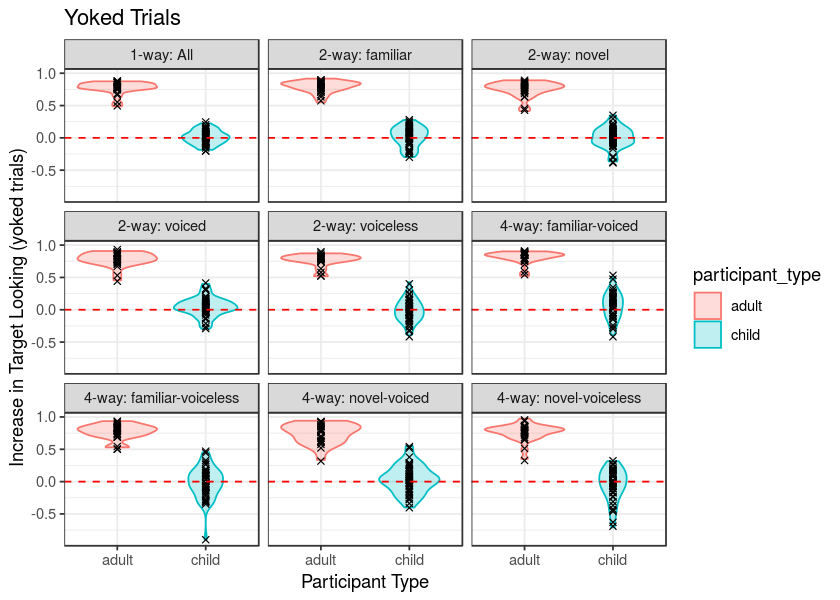

In [658]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'yoked')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), colour ='black',
shape = 4, position=position_jitter(height=.03, width=0)) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle('Yoked Trials'
) + xlab('Participant Type') + ylab('Increase in Target Looking (yoked trials)') 

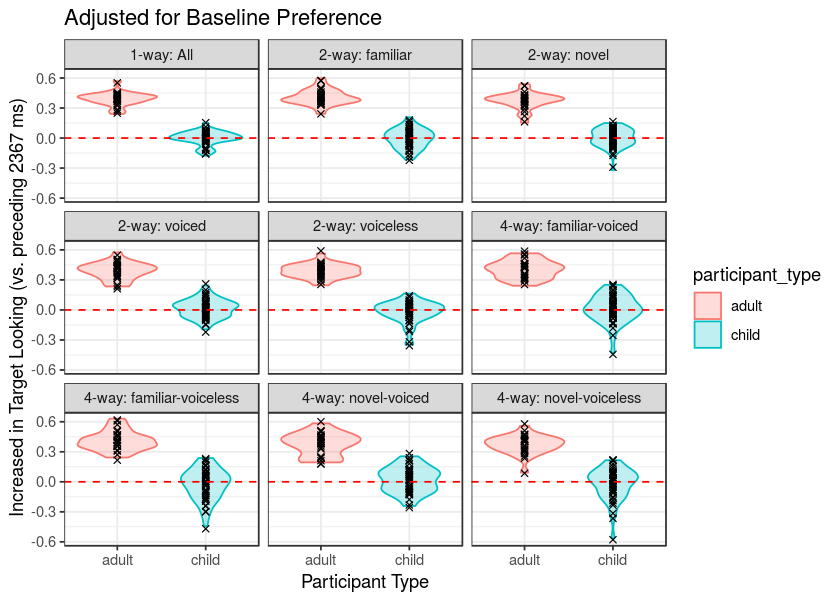

In [659]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(subset(all_scores, normalizeMethod == 'preceding')) + geom_violin(
aes(y=prop_looks_to_target, x = participant_type,
colour = participant_type, fill = participant_type), alpha=.25) +
geom_point(aes(x=participant_type, y=prop_looks_to_target), position=position_jitter(
height=.03, width=0), colour ='black', shape = 4) + facet_wrap(
~partition_name) + theme_bw() + geom_hline(yintercept=0, 
linetype = 'dashed', colour='red') + ggtitle('Adjusted for Baseline Preference'
) + xlab('Participant Type') + ylab('Increased in Target Looking (vs. preceding 2367 ms)') 

# Expressive Scores vs. Receptive Scores

In [859]:
subject_info[12,]

participant_name id   include filename           age_in_days gender type 
12 pl07             pl07 1       pl07_fixations.txt NA                 adult
   expt_version comment          age_in_months narrow_score broad_score
12 scene        eyetracking only NA            NA           NA

In [889]:
child_receptive_scores = subset(all_scores, normalizeMethod == 'yoked' & 
                                contrast_type == '1-way')
exre = subset(merge(subject_info, subset(child_receptive_scores, participant_type =='child')
    , by='participant_name'), age_in_months > 20 &age_in_months <40)
head(exre)
wilcox.test(exre$prop_looks_to_target ~ exre$expt_version.x)

participant_name id   include filename           age_in_days gender type 
1 pl00             pl00 1       pl00_fixations.txt 769         F      child
2 pl01             pl01 1       pl01_fixations.txt 788         F      child
3 pl03             pl03 1       pl03_fixations.txt 810         F      child
4 pl09             pl09 1       pl09_fixations.txt 796         F      child
5 pl10             pl10 1       pl10_fixations.txt 897         M      child
6 pl11             pl11 1       pl11_fixations.txt 792         M      child
  expt_version.x comment age_in_months narrow_score broad_score
1 scene                  25.21311             NA           NA  
2 scene                  25.83607      1.0000000    0.1666667  
3 scene                  26.55738      1.0000000    0.1000000  
4 scene                  26.09836            NaN    0.0000000  
5 scene                  29.40984      0.1333333    0.1333333  
6 scene                  25.96721             NA           NA  
  participant_type contrast_type prob      prop_looks_to_target
1 child            1-way         0.9937295  0.03698783         
2 child            1-way         1.0000000 -0.17748875         
3 child            1-way         0.9892578  0.14743932         
4 child            1-way         0.9995439  0.01942082         
5 child            1-way         1.0000000 -0.08482689         
6 child            1-way         0.9999275  0.02099046         
  thresholded                        partition_name normalizeMethod
1 Does not demonstrate RK! (p > .33) 1-way: All     yoked          
2 Does not demonstrate RK! (p > .33) 1-way: All     yoked          
3 Does not demonstrate RK! (p > .33) 1-way: All     yoked          
4 Does not demonstrate RK! (p > .33) 1-way: All     yoked          
5 Does not demonstrate RK! (p > .33) 1-way: All     yoked          
6 Does not demonstrate RK! (p > .33) 1-way: All     yoked          
  expt_version.y
1 scene         
2 scene         
3 scene         
4 scene         
5 scene         
6 scene


	Wilcoxon rank sum test

data:  exre$prop_looks_to_target by exre$expt_version.x
W = 176, p-value = 0.7076
alternative hypothesis: true location shift is not equal to 0


This means no difference in yoked difference scores given experiment

Warning message:
“Removed 8 rows containing missing values (geom_point).”

Warning message:
“Removed 8 rows containing missing values (geom_point).”

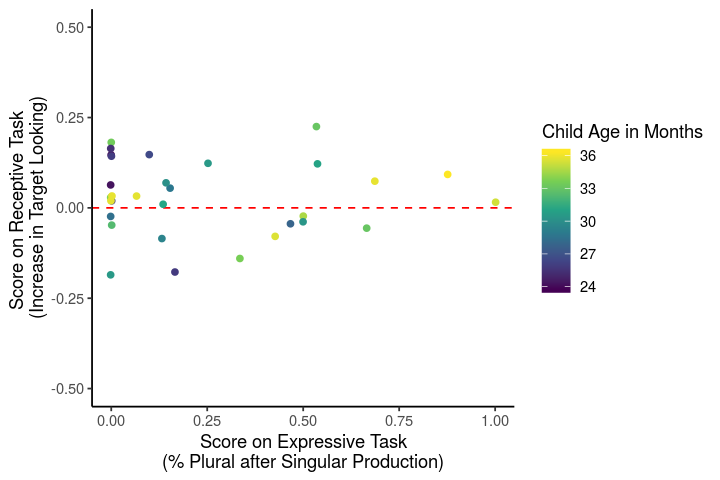

In [890]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(exre) + geom_hline(yintercept=0,  color = 'red', linetype = 'dashed') + geom_jitter(
aes(x=broad_score, y=prop_looks_to_target, colour=age_in_months)
) + scale_colour_continuous(type = "viridis", name = "Child Age in Months") + theme_classic(
) + xlab('Score on Expressive Task\n(% Plural after Singular Production)') + ylab(
    'Score on Receptive Task \n(Increase in Target Looking)') + coord_cartesian(xlim=c(0,1), ylim =c(-.5,.5))
ggsave('figures/expressive_vs_receptive.pdf', width=6, height=4)

In [891]:
cor(exre$prop_looks_to_target, exre$narrow_score, use='pairwise.complete.obs',
   method = "spearman") 

[1] 0.4706963

In [892]:
exre$narrow_score_split = exre$narrow_score >= median(exre$narrow_score, na.rm=T )
t.test(subset(exre, !narrow_score_split)$prop_looks_to_target, subset(exre, narrow_score_split)$prop_looks_to_target)


	Welch Two Sample t-test

data:  subset(exre, !narrow_score_split)$prop_looks_to_target and subset(exre, narrow_score_split)$prop_looks_to_target
t = -2.6956, df = 3.5934, p-value = 0.06095
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.267295871  0.009985692
sample estimates:
  mean of x   mean of y 
-0.10597587  0.02267922 


In [894]:
nrow(exre)

[1] 39

In [863]:
child_receptive_scores = subset(all_scores, normalizeMethod == 'none' & contrast_type == '1-way')
exre = merge(subject_info, child_receptive_scores, by='participant_name')
head(exre)

participant_name id        include filename                age_in_days gender
1 adultpl12        adultpl12 1       adultpl12_fixations.txt  NA               
2 adultpl13        adultpl13 1       adultpl13_fixations.txt  NA               
3 adultpl14        adultpl14 1       adultpl14_fixations.txt  NA               
4 adultpl15        adultpl15 1       adultpl15_fixations.txt  NA               
5 adultpl16        adultpl16 1       adultpl16_fixations.txt  NA               
6 pl00             pl00      1       pl00_fixations.txt      769         F     
  type  expt_version.x comment age_in_months narrow_score broad_score
1 adult scene                        NA      NA           NA         
2 adult scene                        NA      NA           NA         
3 adult scene                        NA      NA           NA         
4 adult scene                        NA      NA           NA         
5 adult scene                        NA      NA           NA         
6 child scene                  25.21311      NA           NA         
  participant_type contrast_type prob         prop_looks_to_target
1 adult            1-way         7.683411e-09 0.8820842           
2 adult            1-way         1.278007e-06 0.7724580           
3 adult            1-way         2.314337e-07 0.8194239           
4 adult            1-way         9.313226e-10 0.8868946           
5 adult            1-way         2.328306e-10 0.8768232           
6 child            1-way         4.277678e-01 0.5172610           
  thresholded                        partition_name normalizeMethod
1 Demonstrates RK! (p < .05)         1-way: All     none           
2 Demonstrates RK! (p < .05)         1-way: All     none           
3 Demonstrates RK! (p < .05)         1-way: All     none           
4 Demonstrates RK! (p < .05)         1-way: All     none           
5 Demonstrates RK! (p < .05)         1-way: All     none           
6 Does not demonstrate RK! (p > .33) 1-way: All     none           
  expt_version.y
1 scene         
2 scene         
3 scene         
4 scene         
5 scene         
6 scene

In [864]:
child_exre = subset(exre, participant_type == 'child')
wilcox.test(child_exre$prop_looks_to_target ~ child_exre$expt_version.x)


	Wilcoxon rank sum test

data:  child_exre$prop_looks_to_target by child_exre$expt_version.x
W = 207, p-value = 0.7462
alternative hypothesis: true location shift is not equal to 0


This test means no difference in the receptive scores with no normalization

Warning message:
“Removed 16 rows containing missing values (geom_point).”

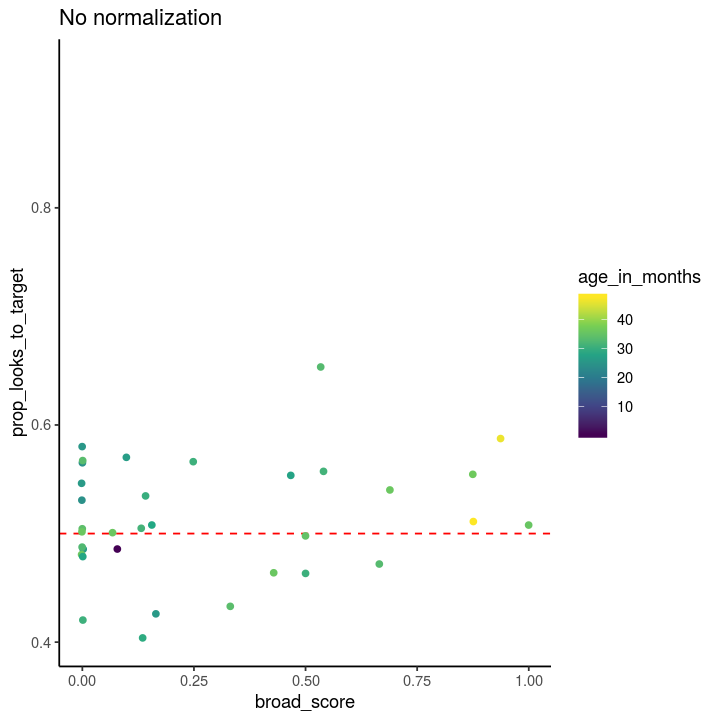

In [865]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(exre) + geom_hline(yintercept=.5,  color = 'red', linetype = 'dashed') + geom_jitter(
aes(x=broad_score, y=prop_looks_to_target, colour=age_in_months)
) + scale_colour_continuous(type = "viridis") + theme_classic() + ggtitle('No normalization')

In [866]:
child_receptive_scores = subset(all_scores, normalizeMethod == 'preceding' & contrast_type == '1-way')
exre = merge(subject_info, child_receptive_scores, by='participant_name')
head(exre)

participant_name id        include filename                age_in_days gender
1 adultpl12        adultpl12 1       adultpl12_fixations.txt  NA               
2 adultpl13        adultpl13 1       adultpl13_fixations.txt  NA               
3 adultpl14        adultpl14 1       adultpl14_fixations.txt  NA               
4 adultpl15        adultpl15 1       adultpl15_fixations.txt  NA               
5 adultpl16        adultpl16 1       adultpl16_fixations.txt  NA               
6 pl00             pl00      1       pl00_fixations.txt      769         F     
  type  expt_version.x comment age_in_months narrow_score broad_score
1 adult scene                        NA      NA           NA         
2 adult scene                        NA      NA           NA         
3 adult scene                        NA      NA           NA         
4 adult scene                        NA      NA           NA         
5 adult scene                        NA      NA           NA         
6 child scene                  25.21311      NA           NA         
  participant_type contrast_type prob      prop_looks_to_target
1 adult            1-way         0.7016926 0.44315080          
2 adult            1-way         0.9999435 0.26383327          
3 adult            1-way         0.9646222 0.38353452          
4 adult            1-way         0.9506314 0.44117789          
5 adult            1-way         0.9997325 0.34015421          
6 child            1-way         0.9999958 0.06596238          
  thresholded                        partition_name normalizeMethod
1 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
2 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
3 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
4 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
5 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
6 Does not demonstrate RK! (p > .33) 1-way: All     preceding      
  expt_version.y
1 scene         
2 scene         
3 scene         
4 scene         
5 scene         
6 scene

Warning message:
“Removed 16 rows containing missing values (geom_point).”

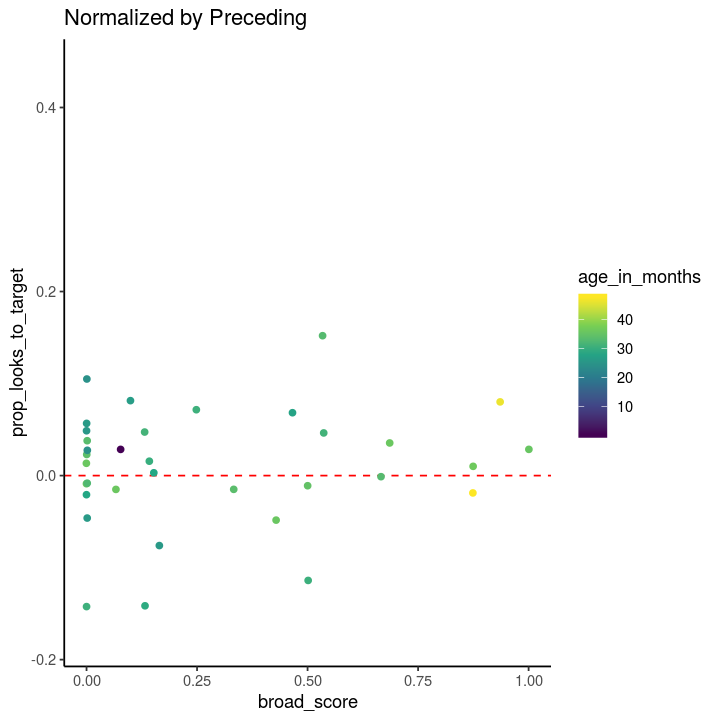

In [867]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(exre) + geom_hline(yintercept=0,  color = 'red', linetype = 'dashed') + geom_jitter(
aes(x=broad_score, y=prop_looks_to_target, colour=age_in_months)
) + scale_colour_continuous(type = "viridis") + theme_classic() + ggtitle('Normalized by Preceding')

# Logistic Regression Models for Production

In [868]:
library('lme4')

In [869]:
p_coded$s_success = NA 
p_coded$s_success[p_coded$Singular.Code %in% c(5)] = 1
p_coded$s_success[p_coded$Singular.Code %in% seq(1,4)] = 0
p_coded$pl_success = NA 
p_coded$pl_success[p_coded$Plural.Code %in% c(7,8)] = 1
p_coded$pl_success[p_coded$Plural.Code %in% seq(1,6)] = 0

In [870]:
subset(p_coded, pl_success == T)

Lemma child itemId Singular.IPA                               
6   ant   pl22  1      ant                                        
7   ant   pl42  1      ant                                        
11  ant   pl20  1      ant                                        
15  ant   pl14  1      ant                                        
17  ant   pl16  1      I don't know what they ant                 
18  boat  pl44  2      bot                                        
22  boat  pl22  2      boat                                       
26  boat  pl24  2      it supposed to be in the water, boat       
28  boat  pl20  2      0                                          
33  boat  pl10  2      boat splish splash                         
40  bug   pl42  4      bug(h)                                     
41  bug   pl22  4      buug                                       
44  bug   pl36  4      I don't like the ladybug                   
50  bug   pl14  4      no….bug                                    
58  cat   pl43  5      cat                                        
66  cat   pl17  5      cat                                        
68  cat   pl27  5      cat                                        
77  cat   pl15  5      cat                                        
78  cat   pl13  5      cat                                        
80  cow   pl51  8      a druss it a truss it                      
90  cow   pl43  8      cow                                        
94  cow   pl29  8      moo                                        
95  cow   pl15  8      caow                                       
98  cow   pl19  8      cow                                        
99  cow   pl37  8      that's what a baby cow                     
101 cow   pl17  8      cow                                        
106 cup   pl27  9      sippy cup                                  
109 cup   pl23  9      cup                                        
112 cup   pl37  9      cup                                        
114 cup   pl19  9      cup                                        
⋮   ⋮     ⋮     ⋮      ⋮                                          
576 spoon pl16  31     a poon. Poon. No no I can turn the pictures
578 spoon pl22  31     spoon                                      
580 star  pl03  32     tar                                        
581 star  pl37  32     star                                       
582 star  pl47  32     star, it's a yellows                       
586 star  pl01  32     ya, star, twinkle twinkle                  
592 star  pl43  32     (s)tar                                     
594 star  pl27  32     staaar                                     
595 star  pl13  32     star                                       
598 star  pl19  32     tar                                        
600 star  pl29  32     star                                       
605 star  pl17  32     sar                                        
606 star  pl49  32     <unintelligible>                           
613 teb   pl22  33     teb                                        
620 teb   pl20  33     teb…. Blue, rd, yellow, green              
622 teb   pl16  33     no...I don't know… on one                  
623 teb   pl14  33     te ba                                      
634 tep   pl13  34     tep                                        
643 tep   pl47  34     tep                                        
647 tep   pl27  34     tep                                        
649 tep   pl17  34     tep                                        
657 tig   pl43  35     tig                                        
664 tig   pl23  35     tig                                        
666 tig   pl47  35     teg|                                       
675 tig   pl13  35     tig                                        
690 truck pl13  36     truck                                      
691 truck pl19  36     a dump truck                               
694 truck pl17  36     truck                       

## Singular Production

In [873]:
table(p_coded$s_success)


  0   1 
119 533 

In [874]:
library('optimx')

In [918]:
singular_lm = glmer(s_success~novelty+ voicing + animacyStatus + 
    (novelty + voicing + animacyStatus | child) +(1|itemId), family=binomial, data=p_coded,
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))
summary(singular_lm)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: s_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: p_coded
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   406.8    474.0   -188.4    376.8      637 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6295  0.0757  0.1293  0.2677  2.4506 

Random effects:
 Groups Name                   Variance Std.Dev. Corr             
 child  (Intercept)            7.3174   2.7051                    
        noveltynovel           1.4559   1.2066   -0.32            
        voicingvoiceless       0.1857   0.4309    0.48  0.25      
        animacyStatusinanimate 0.3742   0.6117    0.31  0.74  0.79
 itemId (Intercept)            0.0000   0.0000                    
Number of obs: 652, groups:  child, 42; itemId, 

In [919]:
library('Hmisc')
mod.to.table <- function(mod.all=NA, prednames=NA, pred_name_subs=NA, file="",
                         ...) {

    coefs=as.data.frame(coef(summary(mod.all)))
  
  if (is.na(prednames)) {
    if (is.na(pred_name_subs)) {
      prednames <- row.names(coefs)
    } else {
      prednames <- str_replace_multi(row.names(coefs), pred_name_subs, replace.all=T)
    }
  }

  coefs[,1] = round(coefs[,1],digits=2)
  coefs[,2] = round(coefs[,2],digits=2)
  coefs[,3] = round(coefs[,3],digits=1)
  coefs[,4] = ifelse(coefs[,4] > .05, paste(round(coefs[,4],digits=1),sep=""), 
                     ifelse(coefs[,4] < .0001, "\\textbf{<.0001}", 
                            ifelse(coefs[,4] < .001,"\\textbf{<.001}",
                                   ifelse(coefs[,4] < .01, "\\textbf{<.01}", "\\textbf{<.05}"))))

  colnames(coefs) = c("Coef $\\beta$","SE($\\beta$)", "\\textbf{z}","\\textbf{p}")

  prednames = data.frame(PName=row.names(coefs),NewNames=prednames)

  row.names(coefs) = prednames$NewNames[prednames$PName == row.names(coefs)]

  latex(coefs,file=file,title="",table.env=FALSE,booktabs=TRUE, ...)
}
mod.to.table(singular_lm)

%latex.default(coefs, file = file, title = "", table.env = FALSE,     booktabs = TRUE, ...)%
\begin{center}
\begin{tabular}{lrrrl}
\toprule
\multicolumn{1}{l}{}&\multicolumn{1}{c}{Coef $\beta$}&\multicolumn{1}{c}{SE($\beta$)}&\multicolumn{1}{c}{\textbf{z}}&\multicolumn{1}{c}{\textbf{p}}\tabularnewline
\midrule
(Intercept)&$ 2.85$&$0.72$&$ 4.0$&\textbf{\textless .0001}\tabularnewline
noveltynovel&$-0.27$&$0.65$&$-0.4$&0.7\tabularnewline
voicingvoiceless&$ 0.35$&$0.52$&$ 0.7$&0.5\tabularnewline
animacyStatusinanimate&$ 0.68$&$0.56$&$ 1.2$&0.2\tabularnewline
\bottomrule
\end{tabular}\end{center}


## Plural Production

In [876]:
table(subset(p_coded, Singular.Code ==5)$pl_success)


  0   1 
387 137 

In [880]:
nrow(subset(p_coded, Singular.Code ==5))

[1] 533

In [877]:
print(p_coded[1,])

  Lemma child itemId Singular.IPA Singular.Code Plural.IPA Plural.Code Comments
1   ant  pl44      1           at             5       aaat           5         
  novel_id background_context vowel_carrier             full_carrier
1        !               tree   in the tree Look at the  in the tree
     s_carrier s_punct s_wav_index                              s_sentence
1 Look at the        !          35 35. ant... Look at the ant in the tree!
  pl_form   pl_carrier pl_punct pl_wav_index
1    ants Look at the         !           43
                                pl_sentence  novelty   voicing
1 43. ants... Look at the ants in the tree! familiar voiceless
      simple_pl_stim     simple_s_stim animacyStatus test_index trial_index
1 Look at the  ants! Look at the  ant!       animate          9           5
  Trial Practice NovelColor book s_success pl_success
1    12        n          !    2         1          0


In [925]:
plural_lm = glmer(pl_success~novelty+ voicing + animacyStatus + 
    (novelty+ voicing + animacyStatus|child) +(1|itemId), family=binomial, 
    data=subset(p_coded, Singular.Code ==5),
 control = glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=100000)))
summary(plural_lm)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: pl_success ~ novelty + voicing + animacyStatus + (novelty + voicing +  
    animacyStatus | child) + (1 | itemId)
   Data: subset(p_coded, Singular.Code == 5)
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
   437.3    501.2   -203.7    407.3      509 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0391 -0.3165 -0.1324  0.3003  2.9518 

Random effects:
 Groups Name                   Variance Std.Dev. Corr          
 child  (Intercept)            2.4906   1.5782                 
        noveltynovel           4.2136   2.0527   0.99          
        voicingvoiceless       0.1732   0.4162   1.00 1.00     
        animacyStatusinanimate 0.4512   0.6717   0.97 0.99 0.99
 itemId (Intercept)            0.0000   0.0000                 
Number of obs: 524, groups:  child, 4

In [926]:
mod.to.table(plural_lm)

%latex.default(coefs, file = file, title = "", table.env = FALSE,     booktabs = TRUE, ...)%
\begin{center}
\begin{tabular}{lrrrl}
\toprule
\multicolumn{1}{l}{}&\multicolumn{1}{c}{Coef $\beta$}&\multicolumn{1}{c}{SE($\beta$)}&\multicolumn{1}{c}{\textbf{z}}&\multicolumn{1}{c}{\textbf{p}}\tabularnewline
\midrule
(Intercept)&$-1.11$&$0.44$&$-2.5$&\textbf{\textless .05}\tabularnewline
noveltynovel&$-2.58$&$0.92$&$-2.8$&\textbf{\textless .01}\tabularnewline
voicingvoiceless&$-0.57$&$0.46$&$-1.2$&0.2\tabularnewline
animacyStatusinanimate&$-0.30$&$0.49$&$-0.6$&0.5\tabularnewline
\bottomrule
\end{tabular}\end{center}


In [927]:
stargazer(singular_lm, plural_lm)


% Table created by stargazer v.5.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, Jan 10, 2020 - 07:56:52 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & s\_success & pl\_success \\ 
\\[-1.8ex] & (1) & (2)\\ 
\hline \\[-1.8ex] 
 noveltynovel & $-$0.269 & $-$2.583$^{***}$ \\ 
  & (0.646) & (0.923) \\ 
  & & \\ 
 voicingvoiceless & 0.349 & $-$0.573 \\ 
  & (0.524) & (0.465) \\ 
  & & \\ 
 animacyStatusinanimate & 0.680 & $-$0.299 \\ 
  & (0.556) & (0.486) \\ 
  & & \\ 
 Constant & 2.846$^{***}$ & $-$1.106$^{**}$ \\ 
  & (0.716) & (0.442) \\ 
  & & \\ 
\hline \\[-1.8ex] 
Observations & 652 & 524 \\ 
Log Likelihood & $-$188.395 & $-$203.659 \\ 
Akaike Inf. Crit. & 406.790 & 437.319 \\ 
Bayesian Inf. Crit. & 473.991 & 501.241 \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  

# Age vs. Plural Knowledge

In [556]:
code_counts_with_age = merge(subject_info, code_counts, by.x='id', by.y='child')
code_counts_with_age = merge(code_counts_with_age, codes)
head(code_counts_with_age)

code description id   participant_name include filename           
1 0    No data (0) pl37 pl37             1       pl37_fixations.xlsx
2 0    No data (0) pl01 pl01             1       pl01_fixations.txt 
3 0    No data (0) pl19 pl19             1       pl19_fixations.xlsx
4 0    No data (0) pl24 pl24             1       pl24_fixations.xlsx
5 0    No data (0) pl54 pl54             1       pl54_fixations.xlsx
6 0    No data (0) pl20 pl20             1       pl20_fixations.xlsx
  age_in_days gender type  expt_version comment age_in_months narrow_score
1 1086               child redblue              35.60656      1           
2  788        F      child scene                25.83607      1           
3  947        M      child scene                31.04918      1           
4 1091        M      child scene                35.77049      1           
5  976               child redblue              32.00000      0           
6 1008        F      child scene                33.04918      1           
  broad_score count s_pl    
1 0.42857143  1     plural  
2 0.16666667  1     singular
3 0.53846154  1     plural  
4 0.06666667  1     singular
5 0.00000000  2     plural  
6 0.66666667  5     singular

In [557]:
subset(code_counts_with_age, age_in_months > 35 & age_in_months < 38)

code description                               id   participant_name
1   0    No data (0)                               pl37 pl37            
4   0    No data (0)                               pl24 pl24            
8   0    No data (0)                               pl36 pl36            
33  1    No verbal response (1)                    pl36 pl36            
41  1    No verbal response (1)                    pl36 pl36            
46  2    Not identifiable/babble (2)               pl36 pl36            
67  3    Other word (not noun) (3)                 pl36 pl36            
69  3    Other word (not noun) (3)                 pl37 pl37            
73  3    Other word (not noun) (3)                 pl36 pl36            
74  3    Other word (not noun) (3)                 pl25 pl25            
76  3    Other word (not noun) (3)                 pl27 pl27            
104 5    Singular form (5)                         pl24 pl24            
119 5    Singular form (5)                         pl25 pl25            
120 5    Singular form (5)                         pl47 pl47            
121 5    Singular form (5)                         pl25 pl25            
145 5    Singular form (5)                         pl46 pl46            
149 5    Singular form (5)                         pl37 pl37            
150 5    Singular form (5)                         pl36 pl36            
155 5    Singular form (5)                         pl24 pl24            
159 5    Singular form (5)                         pl37 pl37            
160 5    Singular form (5)                         pl27 pl27            
161 5    Singular form (5)                         pl27 pl27            
163 5    Singular form (5)                         pl47 pl47            
165 5    Singular form (5)                         pl46 pl46            
179 6    Non-conventional plural form (6)          pl36 pl36            
187 7    Plural form, approximate articulation (7) pl36 pl36            
189 7    Plural form, approximate articulation (7) pl37 pl37            
193 8    Plural form, adult-like articulation (8)  pl27 pl27            
196 8    Plural form, adult-like articulation (8)  pl47 pl47            
198 8    Plural form, adult-like articulation (8)  pl24 pl24            
204 8    Plural form, adult-like articulation (8)  pl36 pl36            
211 8    Plural form, adult-like articulation (8)  pl36 pl36            
    include filename            age_in_days gender type  expt_version comment
1   1       pl37_fixations.xlsx 1086               child redblue             
4   1       pl24_fixations.xlsx 1091        M      child scene               
8   1       pl36_fixations.xlsx 1079               child redblue             
33  1       pl36_fixations.xlsx 1079               child redblue             
41  1       pl36_fixations.xlsx 1079               child redblue             
46  1       pl36_fixations.xlsx 1079               child redblue             
67  1       pl36_fixations.xlsx 1079               child redblue             
69  1       pl37_fixations.xlsx 1086               child redblue             
73  1       pl36_fixations.xlsx 1079               child redblue             
74  1       pl25_fixations.xlsx 1091        M      child scene               
76  1       pl27_fixations.xlsx 1107        F      child scene               
104 1       pl24_fixations.xlsx 1091        M      child scene               
119 1       pl25_fixations.xlsx 1091        M      child scene               
120 1       pl47_fixations.xlsx 1093               child redblue             
121 1       pl25_fixations.xlsx 1091        M      child scene               
145 1       pl46_fixations.xlsx 1093               child redblue             
149 1       pl37_fixations.xlsx 1086               child redblue             
150 1       pl36_fixations.xlsx 1079               child redblue             
155 1       pl24_fixations.xlsx 1091        M      child scene               
159 1       pl37_fixations.xlsx 108

In [176]:
code_counts_with_age

code description                               id   participant_name
1   0    No data (0)                               pl37 pl37            
2   0    No data (0)                               pl01 pl01            
3   0    No data (0)                               pl19 pl19            
4   0    No data (0)                               pl24 pl24            
5   0    No data (0)                               pl54 pl54            
6   0    No data (0)                               pl20 pl20            
7   0    No data (0)                               pl01 pl01            
8   0    No data (0)                               pl36 pl36            
9   0    No data (0)                               pl18 pl18            
10  0    No data (0)                               pl18 pl18            
11  0    No data (0)                               pl52 pl52            
12  0    No data (0)                               pl20 pl20            
13  1    No verbal response (1)                    pl01 pl01            
14  1    No verbal response (1)                    pl30 pl30            
15  1    No verbal response (1)                    pl15 pl15            
16  1    No verbal response (1)                    pl43 pl43            
17  1    No verbal response (1)                    pl15 pl15            
18  1    No verbal response (1)                    pl11 pl11            
19  1    No verbal response (1)                    pl03 pl03            
20  1    No verbal response (1)                    pl33 pl33            
21  1    No verbal response (1)                    pl31 pl31            
22  1    No verbal response (1)                    pl39 pl39            
23  1    No verbal response (1)                    pl41 pl41            
24  1    No verbal response (1)                    pl33 pl33            
25  1    No verbal response (1)                    pl52 pl52            
26  1    No verbal response (1)                    pl41 pl41            
27  1    No verbal response (1)                    pl01 pl01            
28  1    No verbal response (1)                    pl11 pl11            
29  1    No verbal response (1)                    pl05 NA              
30  1    No verbal response (1)                    pl09 pl09            
⋮   ⋮    ⋮                                         ⋮    ⋮               
185 7    Plural form, approximate articulation (7) pl15 pl15            
186 7    Plural form, approximate articulation (7) pl23 pl23            
187 7    Plural form, approximate articulation (7) pl36 pl36            
188 7    Plural form, approximate articulation (7) pl03 pl03            
189 7    Plural form, approximate articulation (7) pl37 pl37            
190 7    Plural form, approximate articulation (7) pl01 pl01            
191 7    Plural form, approximate articulation (7) pl04 NA              
192 7    Plural form, approximate articulation (7) pl14 pl14            
193 8    Plural form, adult-like articulation (8)  pl27 pl27            
194 8    Plural form, adult-like articulation (8)  pl17 pl17            
195 8    Plural form, adult-like articulation (8)  pl29 pl29            
196 8    Plural form, adult-like articulation (8)  pl47 pl47            
197 8    Plural form, adult-like articulation (8)  pl19 pl19            
198 8    Plural form, adult-like articulation (8)  pl24 pl24            
199 8    Plural form, adult-like articulation (8)  pl14 pl14            
200 8    Plural form, adult-like articulation (8)  pl10 pl10            
201 8    Plural form, adult-like articulation (8)  pl23 pl23            
202 8    Plural form, adult-like articulation (8)  pl42 pl42            
203 8    Plural form, adult-like articulation (8)  pl49 pl49            
204 8    Plural form, adult-like articulation (8)  pl36 pl36            
205 8    Plural form, adult-like articulation (8)  pl28 pl28            
206 8    Plural form, adult-like articulation (8)  pl13 pl13            
207 8    Plural form, adult-like articulation (8)  pl43 pl43  

In [735]:
children_in_age_range = subset(code_counts_with_age,age_in_months > 20 & age_in_months < 40 )

In [736]:
length(unique(children_in_age_range$participant_name))

[1] 36

In [740]:
#code_counts_with_age is much less than subject_info
length(unique(subset(children_in_age_range, !is.na(narrow_score))$participant_name))
# it is the age range filtering and the absence of narrow scores

[1] 22

Warning message:
“position_stack requires non-overlapping x intervals”Warning message:
“position_stack requires non-overlapping x intervals”

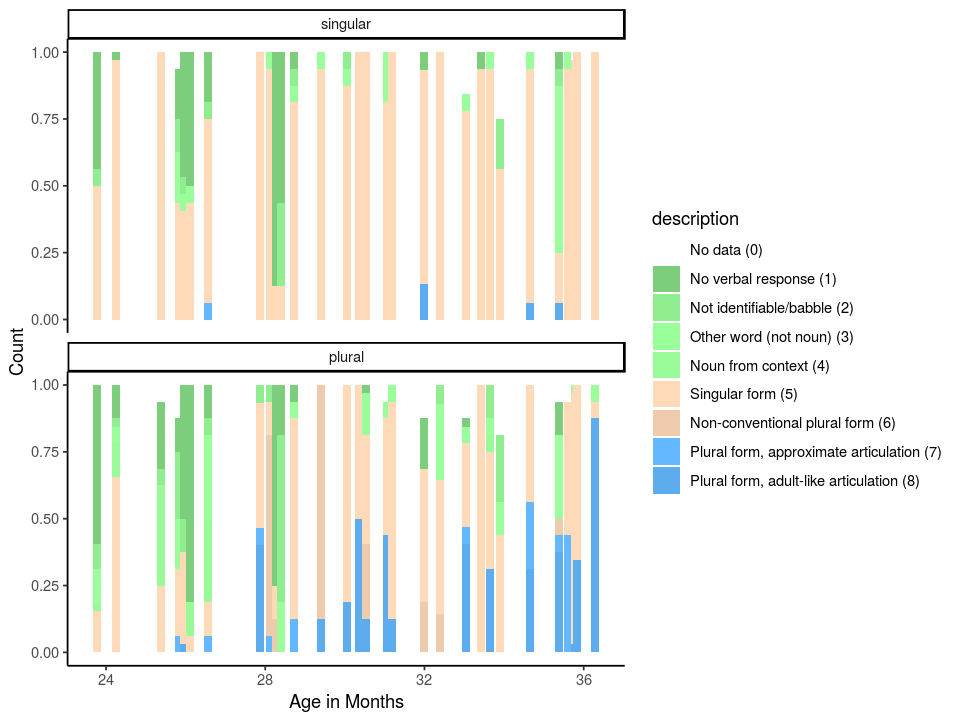

In [744]:
options(repr.plot.width=8, repr.plot.height=6)
ggplot(children_in_age_range) + geom_bar(
aes(x=age_in_months, y=count, fill=description),
stat="identity",  width = 0.2, position="fill"
) + scale_fill_manual(values = rep(c("white", "palegreen3", "palegreen2", "palegreen1",
"palegreen", "peachpuff1", "peachpuff2", "steelblue1","steelblue2"), 2)) + facet_wrap(~s_pl, nrow=2) + xlab('Age in Months') + ylab('Count'
) + theme_classic() 


#+ scale_fill_brewer(palette="Set3")

In [ ]:
# can I combine the two datasets? Get the proportion of 7 and 8 responses 
#  check the distribution in ages

In [743]:
length(unique(subset(children_in_age_range, code %in% c(7,8) & type =='child')$id))
length(unique(subset(children_in_age_range, code %in% c(1:8)  & type =='child')$id))

[1] 22

[1] 37

In [725]:
code_counts_with_age[1,]

code description id   participant_name include filename           
1 0    No data (0) pl37 pl37             1       pl37_fixations.xlsx
  age_in_days gender type  expt_version comment age_in_months narrow_score
1 1086               child redblue              35.60656      1           
  broad_score count s_pl  
1 0.4285714   1     plural

In [734]:
aggregate(count ~ participant_name, subset(code_counts_with_age, code %in% c(7,8)
                                          & s_pl == 'plural'), sum)

participant_name count
1  pl01              1   
2  pl03              1   
3  pl10              2   
4  pl13             14   
5  pl14              9   
6  pl15              2   
7  pl17              8   
8  pl19              7   
9  pl20              7   
10 pl22             15   
11 pl23              7   
12 pl24              1   
13 pl27             14   
14 pl28              2   
15 pl29              4   
16 pl36              7   
17 pl37              7   
18 pl42              5   
19 pl43              8   
20 pl44              1   
21 pl47             11   
22 pl49              1   
23 pl51              3

In [745]:
nrow(subset(aggregate(count ~ participant_name, subset(children_in_age_range, code %in% c(7,8)
                                          & s_pl == 'plural'), sum), count > 8)) 

[1] 3

In [762]:
nrow(subset(aggregate(count ~ participant_name, subset(children_in_age_range, code %in% c(7,8)
                                          & s_pl == 'plural'), sum), count > 8)) 

[1] 3

In [753]:
# drop backe to p_coded 
p_coded_incl = subset(p_coded, child %in% children_in_age_range$id)
names(p_coded_incl)
length(unique(subset(p_coded_incl, Plural.Code %in% c(7,8) | Singular.Code %in% c(7,8) )$child))
length(unique(subset(p_coded_incl, Plural.Code %in% c(7,8))$child))

[1] "Lemma"              "child"              "itemId"            
 [4] "Singular.IPA"       "Singular.Code"      "Plural.IPA"        
 [7] "Plural.Code"        "Comments"           "novel_id"          
[10] "background_context" "vowel_carrier"      "full_carrier"      
[13] "s_carrier"          "s_punct"            "s_wav_index"       
[16] "s_sentence"         "pl_form"            "pl_carrier"        
[19] "pl_punct"           "pl_wav_index"       "pl_sentence"       
[22] "novelty"            "voicing"            "simple_pl_stim"    
[25] "simple_s_stim"      "animacyStatus"      "test_index"        
[28] "trial_index"        "Trial"              "Practice"          
[31] "NovelColor"         "book"               "s_success"         
[34] "pl_success"

[1] 22

[1] 21

In [757]:
# Number of participants with production data
length(unique(p_coded_incl$child))

[1] 37

In [754]:
# Number that produced one or more novel plurals
length(unique(subset(p_coded_incl, Plural.Code %in% c(7,8) & novelty == 'novel' )$child))

[1] 11

In [756]:
# Number that produced one or more novel singulars
length(unique(subset(p_coded_incl, Singular.Code %in% c(5) & novelty == 'novel' )$child))

[1] 36

In [760]:
# Number that produced non-conventional plurals
length(unique(subset(p_coded_incl, Plural.Code %in% c(6) & novelty == 'novel' )$child))

[1] 5

[1] 21

[1] 0.733289

Warning message:
“Ignoring unknown parameters: yintercept”

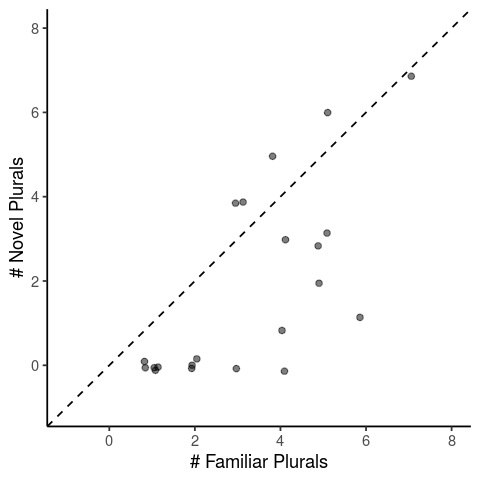

In [790]:
fam = aggregate(Plural.Code ~ child, subset(p_coded_incl, Plural.Code %in% c(7,8) & novelty == 'familiar'),
          length)
names(fam) = c('child','fam_pl')
nov = aggregate(Plural.Code ~ child, subset(p_coded_incl, Plural.Code %in% c(7,8) & novelty == 'novel'),
          length)
names(nov) = c('child','nov_pl')
combined = merge(fam, nov, all=T)
nrow(combined)
combined[is.na(combined)] = 0
options(repr.plot.width=4, repr.plot.height=4)
cor(combined$fam_pl, combined$nov_pl, method='spearman')
ggplot(combined) + geom_jitter(aes(x=fam_pl, y=nov_pl), width=.2, height=.2, alpha=.5) + theme_classic(
) + xlab('# Familiar Plurals') + ylab('# Novel Plurals') + coord_cartesian(xlim=c(-1,8),
    ylim=c(-1,8)) + geom_abline(yintercept=0, slope=1, linetype = 'dashed')

In [827]:
subset(nov, nov_pl >= 4)
subset(fam, fam_pl>= 4)
combined$total_pl = combined$nov_pl + combined$fam_pl
subset(combined, total_pl > 8)

child nov_pl
1  pl14  5     
5  pl23  4     
6  pl27  7     
7  pl36  4     
11 pl47  6

child fam_pl
5  pl14  4     
7  pl17  5     
8  pl19  6     
9  pl20  5     
12 pl27  7     
14 pl29  4     
16 pl37  4     
17 pl42  4     
18 pl43  5     
19 pl47  5

child fam_pl nov_pl total_pl
5  pl14  4      5       9      
12 pl27  7      7      14      
19 pl47  5      6      11

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


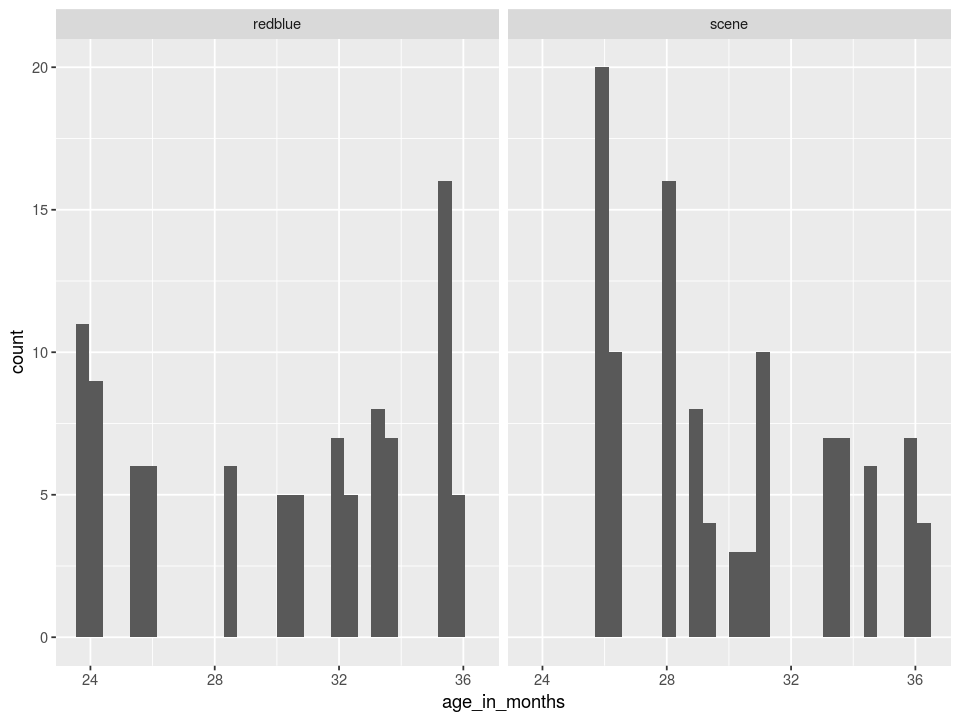

In [559]:
ggplot(subset(code_counts_with_age,age_in_months > 20 & age_in_months < 40 )
      ) + geom_histogram(aes(x=age_in_months)) + facet_wrap(~expt_version)

In [560]:
names(code_counts_with_age)

[1] "code"             "description"      "id"               "participant_name"
 [5] "include"          "filename"         "age_in_days"      "gender"          
 [9] "type"             "expt_version"     "comment"          "age_in_months"   
[13] "narrow_score"     "broad_score"      "count"            "s_pl"

In [561]:
subj = aggregate(age_in_months ~ participant_name + expt_version, code_counts_with_age, unique)

In [678]:
# are the ages for experiments 1 and 2 drawn from the same distribution?
subj_in_age_range = subset(subj,age_in_months > 20 & age_in_months < 40)
print(nrow(subj_in_age_range))
wilcox.test(subj_in_age_range$age_in_months~subj_in_age_range$expt_version)

[1] 35


Warning message in wilcox.test.default(x = c(30.5245901639344, 24.2622950819672, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  subj_in_age_range$age_in_months by subj_in_age_range$expt_version
W = 139.5, p-value = 0.6677
alternative hypothesis: true location shift is not equal to 0


Ages are not distinguished

In [679]:
aggregate(age_in_months ~ expt_version, subj, length)

expt_version age_in_months
1 redblue      19           
2 scene        19

In [684]:
subj_scores = aggregate(broad_score ~ participant_name + expt_version, 
    subset(code_counts_with_age,age_in_months > 20 & age_in_months < 40),  unique)
print(nrow(subj_scores))
wilcox.test(subj_scores$broad_score~subj_scores$expt_version)

[1] 33


Warning message in wilcox.test.default(x = c(0, 0, 1, 0.428571428571429, 0, 0, 0, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  subj_scores$broad_score by subj_scores$expt_version
W = 87.5, p-value = 0.072
alternative hypothesis: true location shift is not equal to 0


In [702]:
subj_scores = aggregate(narrow_score ~ participant_name + expt_version, 
    subset(code_counts_with_age,age_in_months > 20 & age_in_months < 40),  unique)
print(nrow(subj_scores))
wilcox.test(subj_scores$narrow_score~subj_scores$expt_version)
# only 22 with defined narrow scores

[1] 22


Warning message in wilcox.test.default(x = c(0, 1, 1, 1, 1, 1, 0, 1, 0), y = c(1, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  subj_scores$narrow_score by subj_scores$expt_version
W = 42, p-value = 0.1115
alternative hypothesis: true location shift is not equal to 0


This also provides evidence that we can combine across production tasks in redblue and background versions

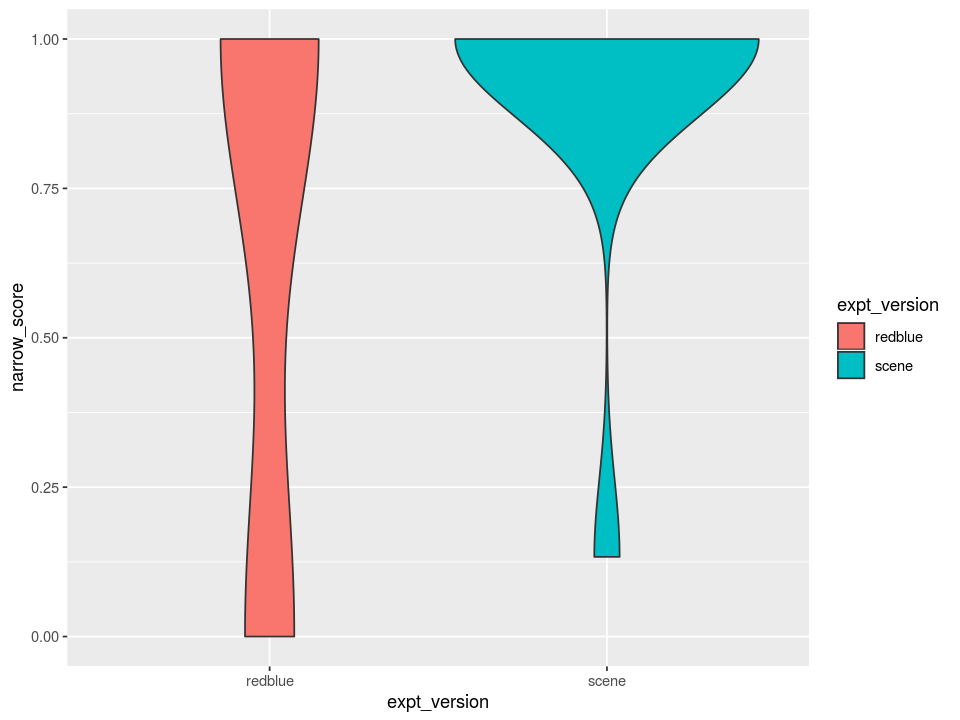

In [564]:
ggplot(subj_scores) + geom_violin(aes(x=expt_version, y=narrow_score, fill=expt_version))

In [ ]:
# can combine, but marginal. Narrow score is the correct one.

Compare with existing studies: 

- Zapf and Smith (2007):
- Zapf and Ettlinger (2011): for 22-35 months (m=25.8): 52% correct plurals; 33% singulars, remainder are non-answers
Experimenter says "Can you tell Teddy to get ____" and point to the singulars or the plurals. Common familiar nouns. ****Teddy bear picks up things or not, i.e. there is reinforcement learning.****


# Vocabulary vs. Plural Knowledge

In [ ]:
# pull in CDI scores

# Response Time When Looking at Distractor

In [ ]:
metadata_cols = c('animacystatus', 'background_context','distractorimage',
'distractorloc', 'expt_index', 'full_carrier', 'novel_id', 'novelcolor',
'novelty', 'order', 'pl_carrier', 'pl_form', 'pl_punct', 'pl_sentence',
'pl_wav_index', 'practice', 's_carrier', 's_form', 's_punct',
's_sentence', 's_wav_index', 'simple_pl_stim', 'simple_s_stim', 'target',
'targetimage', 'targetloc', 'targetside', 'test_index', 'trial', 'voicing', 'vowel_carrier',
'RECORDING_SESSION_LABEL')

In [ ]:
names(ed_df)

In [ ]:
fixreports = split(ed_df, ed_df$filename)

In [ ]:
source('PLEARN_analysis_helper.R')
test_df = do.call('rbind',lapply(fixreports, function(fixreport){
    getParticipantRTs(380, fixreport, label_colname="CURRENT_FIX_INTEREST_AREA_LABEL", metadata_cols, include_non_roi_label=T)
})) 

In [ ]:
# 10/10/19: this is failing because of an edge case where we don't see any fixations before disambiguation

In [ ]:
getRTComparisonPlot = function(test_df, split_var, facet_var = NULL){
    
    agg_equation = paste("rt ~", split_var)
    if (!is.null(facet_var)){
        agg_equation = paste(agg_equation, "+", facet_var)
    }
    summary_df = do.call(data.frame, aggregate(as.formula(agg_equation), data = test_df, FUN = function(x)
        c(mean = mean(x), sd = sd(x))))
    print(names(summary_df))                   
    
    options(repr.plot.width=4, repr.plot.height=4)
    p1 = ggplot(test_df) + geom_violin(mapping=aes(y=rt, x=factor(test_df[[split_var
]]), colour=factor(test_df[[split_var]]))) + theme_bw(
) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean - rt.sd, ymax = rt.mean + rt.sd), width = 0.1, alpha=.5) + geom_errorbar(data = summary_df, mapping=aes(x=factor(summary_df[[split_var
]]), ymin =  rt.mean, ymax = rt.mean)) + theme_bw(
) + geom_hline(yintercept=0, colour='black', linetype='dashed'
) + geom_hline(yintercept=367, colour='forestgreen') + coord_flip(
ylim= c(0,2000)) + xlab(split_var) + ylab(''
) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p1 = p1 + facet_wrap(as.formula(paste('~', facet_var, sep='')), ncol=1)
    }
    print(p1)
                                               
    p2 = ggplot(test_df) + geom_histogram(mapping=aes(x=rt, fill=factor(test_df[[split_var]]))
    ) + theme_bw() + geom_errorbarh(data = summary_df, 
    mapping=aes(y=factor(summary_df[[split_var]]), xmin =  rt.mean - rt.sd, xmax = rt.mean + rt.sd),
    width = 0.1, alpha=.5) + geom_errorbarh(data = summary_df, mapping=aes(y=factor(summary_df[[split_var
    ]]), xmin =  rt.mean, xmax = rt.mean)) + theme_bw() + geom_vline(xintercept=0, 
    colour='black', linetype='dashed') + geom_vline(xintercept=367, colour='forestgreen'
    ) + coord_cartesian(xlim= c(0,2000)) + theme(legend.position="none")
    
    if (!is.null(facet_var)){
        options(repr.plot.width=4, repr.plot.height=8)
        p2 = p2 + facet_wrap(as.formula(paste('~', facet_var, '+', split_var, sep='')), ncol=1)
    } else {
        p2 = p2 + facet_wrap(as.formula(paste('~', split_var, sep='')), ncol=1)
    }
    #print(p2)                                  
                                               
                                               
}

In [ ]:
names(test_df)

In [ ]:
getRTComparisonPlot(test_df, split_var = 'RECORDING_SESSION_LABEL', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df, split_var = 'target')

In [ ]:
getRTComparisonPlot(test_df, split_var = 'target', facet_var = 'RECORDING_SESSION_LABEL')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'voicing', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'novelty', facet_var='target')

In [ ]:
getRTComparisonPlot(test_df,split_var = 'animacystatus', facet_var='target')

In [ ]:
names(test_df)

In [ ]:
library('lme4')
lm = lmer(rt ~ novelty + voicing + animacystatus + 
    (novelty + voicing + animacystatus | RECORDING_SESSION_LABEL) +(1|s_form), data=
 test_df, )
summary(lm)

# Preference Before Disambiguation

In [565]:
ed_df$participant_name = ed_df$participant_name.x

In [566]:
beforeafter_disambig_df = subset(ed_df, 
    CURRENT_FIX_INTEREST_AREA_LABEL %in% c('TARGET','DISTRACTOR')) 
beforeafter_disambig_df$looking_at_plural = 0
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET' & 
    beforeafter_disambig_df$target == 'pl'] = 1
beforeafter_disambig_df$looking_at_plural[
    beforeafter_disambig_df$CURRENT_FIX_INTEREST_AREA_LABEL == 'DISTRACTOR' & 
    beforeafter_disambig_df$target == 's'] = 1
beforeafter_disambig_df$beforeafter = 'After Disambiguation'
beforeafter_disambig_df$beforeafter[beforeafter_disambig_df$Time < 367] = 'Before Disambiguation'
beforeafter_disambig_preference = aggregate(looking_at_plural ~ participant_name +
    type + beforeafter + TRIAL_INDEX, 
    beforeafter_disambig_df, mean)

beforeafter_disambig_by_subject = do.call(data.frame, aggregate(looking_at_plural ~ participant_name + type +  beforeafter, beforeafter_disambig_preference, FUN = function(x){c(mean=mean(x), sd = sd(x))}))                                       

print(beforeafter_disambig_by_subject)

             participant_name  type           beforeafter
1         adultpl12_fixations adult  After Disambiguation
2         adultpl13_fixations adult  After Disambiguation
3         adultpl14_fixations adult  After Disambiguation
4         adultpl15_fixations adult  After Disambiguation
5         adultpl16_fixations adult  After Disambiguation
6              pl06_fixations adult  After Disambiguation
7              pl07_fixations adult  After Disambiguation
8              pl08_fixations adult  After Disambiguation
9   plearn_adults_plad01.xlsx adult  After Disambiguation
10  plearn_adults_plad02.xlsx adult  After Disambiguation
11  plearn_adults_plad03.xlsx adult  After Disambiguation
12  plearn_adults_plad04.xlsx adult  After Disambiguation
13  plearn_adults_plad05.xlsx adult  After Disambiguation
14  plearn_adults_plad06.xlsx adult  After Disambiguation
15  plearn_adults_plad07.xlsx adult  After Disambiguation
16  plearn_adults_plad08.xlsx adult  After Disambiguation
17  plearn_adu

In [567]:
beforeafter_disambig_by_subject$looking_at_plural_low = 
    beforeafter_disambig_by_subject$looking_at_plural.mean - beforeafter_disambig_by_subject$looking_at_plural.sd
beforeafter_disambig_by_subject$looking_at_plural_high = 
    beforeafter_disambig_by_subject$looking_at_plural.mean + beforeafter_disambig_by_subject$looking_at_plural.sd

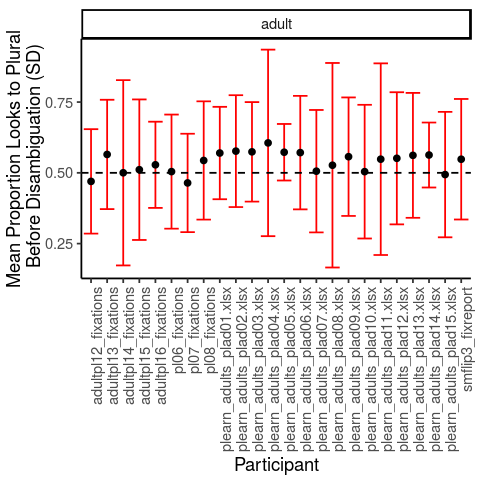

In [568]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(subset(beforeafter_disambig_by_subject, beforeafter == "Before Disambiguation" &
type == 'adult')) + geom_errorbar(aes(x=participant_name, ymin= looking_at_plural_low,
 ymax= looking_at_plural_high), color='red') + geom_point(aes(x=participant_name, 
y=looking_at_plural.mean)) + theme_classic() + geom_hline(yintercept=.5, linetype = 'dashed'
) + xlab('Participant') + ylab('Mean Proportion Looks to Plural\n Before Disambiguation (SD)'
) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + facet_wrap(~type)


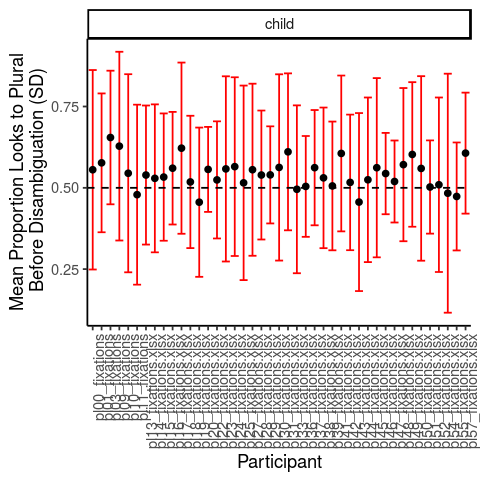

In [569]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(subset(beforeafter_disambig_by_subject, beforeafter == "Before Disambiguation" &
type == 'child')) + geom_errorbar(aes(x=participant_name, ymin= looking_at_plural_low,
 ymax= looking_at_plural_high), color='red') + geom_point(aes(x=participant_name, 
y=looking_at_plural.mean)) + theme_classic() + geom_hline(yintercept=.5, linetype = 'dashed'
) + xlab('Participant') + ylab('Mean Proportion Looks to Plural\n Before Disambiguation (SD)'
) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + facet_wrap(~type)



In [ ]:
# should the last fix before disambig be excluded
#[X] Confirm that 0 is the point of disambig for everyone
#[X] propagate the information about the trials
#[X] Make sure that my ordering is doing the right thing
#[X] how to account for the 200 ms exclusion
#[X] have a bit of a buffer on either side of 0 in case there’s an NA instead of a 0/1 in that exact timebin
#    -- so far this is just looking backwards
#[ ] need to recompute wrt the beginning of the /s/ or /z/ segment, not the end

# Experimental Visualizations + Analyses 

## Binomial Test for Receptive Knowledge

In [ ]:
# requires updating since refactoring

In [ ]:
pl06_fixbins$is_looking_at_target  = as.numeric(pl06_fixbins$CURRENT_FIX_INTEREST_AREA_LABEL == 'TARGET')

In [ ]:
rlist = getPlotForMethod(fixbin_dfs, adult_fixbin_dfs, 'none')
options(repr.plot.width=10, repr.plot.height=5)
print(rlist$p1)
ggsave('figures/binomialTest_nopreprocessing.pdf', width=20, height=10)

In [ ]:
print(rlist$p2)

False negative rate around .1 on 2-way contrasts when halfway between adult-like knowledge and zero knowledge

False positve rate of around .02 on 1-way contrasts when zero-knowledge

In [ ]:
# takes a long time to run because of the bootstrapping
sim_yoked = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'yoked')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_yoked$p1)
ggsave('figures/binomialTest_yoked.pdf', width=20, height=10)

In [ ]:
sim_yoked$p2

In [ ]:
# takes a long time to run because of the bootstrapping
sim_preceding = getPlotForMethod(fixbin_dfs,adult_fixbin_dfs, 'preceding')
options(repr.plot.width=10, repr.plot.height=5)
print(sim_preceding$p1)
ggsave('figures/binomialTest_preceding.pdf', width=20, height=10)

In [ ]:
sim_preceding$p2

## Gaze Stickiness Plot

In [ ]:
fixreport_path = 'results/smflip3_fixreport.txt'
participant_name = gsub('.txt','',tail(strsplit(fixreport_path, '/')[[1]]))[2]

In [ ]:
gaze = blabr::fixations_report(fixreport_path)
gaze = merge(gaze, audio_timings[,c('audiotarget','disambig_time')])
gaze$CURRENT_FIX_END = gaze$CURRENT_FIX_END - gaze$disambig_time
gaze$CURRENT_FIX_START = gaze$CURRENT_FIX_START - gaze$disambig_time

In [ ]:
fixbins = binifyFixations(gaze, keepCols=c("RECORDING_SESSION_LABEL",
"CURRENT_FIX_INTEREST_AREA_LABEL",
"RT",
"expt_index",
"target",
"s_form",
"novelty",
"animacystatus",
"voicing"))
subset(fixbins, Time==3200)

In [ ]:
ggplot(subset(fixbins, s_form =='mip')) + geom_point(aes(x=Time, y=CURRENT_FIX_INTEREST_AREA_LABEL)
) + facet_wrap(~s_form * target) + geom_vline(xintercept=0,
	colour='black')

In [ ]:
ggplot(subset(sm_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
                                                                               y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')

In [ ]:
ggplot(subset(pl00_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')


In [ ]:
ggplot(subset(pl01_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')


In [ ]:
ggplot(subset(pl03_fixbins, CURRENT_FIX_INTEREST_AREA_LABEL!='.')) + geom_point(aes(x=Time,
    y=s_form, colour=s_form)) + facet_wrap(CURRENT_FIX_INTEREST_AREA_LABEL ~ target) + geom_vline(xintercept=0, colour='black')